In [2]:
import os
import shutil
import numpy as np
import pandas as pd
## import necessary package
import numpy as np
import pandas as pd 
from tqdm import tqdm
# from autogluon.tabular import TabularDataset, TabularPredictor
## Config
tqdm.pandas(desc='pandas bar')
from pandarallel import pandarallel
import argparse
from sklearn.metrics import f1_score,precision_score,recall_score
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
import ast
import re
# from cleanlab.filter import find_label_issues
# from cleanlab.classification import CleanLearning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Examine the sampled Index

In [9]:
# beer_index = np.load('/home/yanmy/raha/raha-master/datasets/beers/detector/index.npy')
# flights_index = np.load('/home/yanmy/raha/raha-master/datasets/flights/detector/index.npy')
# tax_index = np.load('/home/yanmy/raha/raha-master/datasets/tax/detector/index.npy')
# rayyan_index = np.load('/home/yanmy/raha/raha-master/datasets/rayyan/detector/index.npy')
# imdb_index = np.load('/home/yanmy/raha/raha-master/datasets/imdb/label.npy')
hospital_index = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/index.npy')
hospital_index

array([532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956,
        22,  24,  42,  56,  57,  93,  94])

### Examine the sampled Index for Error Detector


In [19]:
# hospital_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/train.csv',index_col=0)
# hospital_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/test_cell.csv',index_col=0)
# hospital_detector_test
# hospital_detector_index = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/detection.npy')
# hospital_detector_index

array([0, 0, 0, ..., 0, 0, 0])

## Beers_Detector_File


In [ ]:
## Pre-Process data for Beers
beer_clean = pd.read_csv('datasets/beers/clean.csv').fillna('')
beer_dirty = pd.read_csv('datasets/beers/dirty.csv').fillna('')
beer_dirty.columns = beer_clean.columns
def try_convert_to_int(row):
    for x,y in row.items():
        if(x in ['ounces','ibu']):
            try:
                row[x] = int(y)
            except:
                row[x] = y
    return row
beer_clean = beer_clean.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty = beer_dirty.apply(try_convert_to_int,axis=1).astype(str)

In [59]:
# beer_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/train_aug.csv',index_col=0)
# beer_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/test.csv',index_col=0)
# beer_detector_test
beer_detector_index = np.load('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/detection_cell_5_refine.npy')
beer_detector_index

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## Flights Result

In [ ]:
flights_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/train.csv',index_col=0)
flights_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/test.csv',index_col=0)
flights_detector_test

## Tax Result

In [70]:
### Tax Data
tax_clean = pd.read_csv('datasets/tax/clean.csv').fillna('').astype(str)
tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)

/tmp/ipykernel_16511/4042012506.py:3: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)


In [82]:
# tax_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/tax/detector/multi-view/train_aug.csv',index_col=0)
tax_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/tax/detector/test.csv',index_col=0)
tax_detector_test
tax_detector_index = np.load('/home/yanmy/raha/raha-master/datasets/tax/detector/detection_cell.npy')

In [83]:
tax_detector_index.reshape((-1,15)).shape

(2929, 15)

In [84]:
tax_detector_all = np.where(np.sum(tax_clean!=tax_dirty,axis=1)!=0)[0]

In [88]:
tax_detector_index_process = np.zeros((200000,15))
tax_detector_index = tax_detector_index.reshape((-1,15))
for i in range(len(tax_detector_all)):
    index = tax_detector_all[i] ## True Index in full tax_table
    tax_detector_index_process[index] = tax_detector_index[i]
tax_detector_index_process = tax_detector_index_process.astype(int)

## IMDB_File

In [99]:
imdb_clean = pd.read_csv('datasets/imdb/clean.csv').fillna('')
imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(6):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
imdb_clean = imdb_clean.parallel_apply(Str2Int,axis=1)
imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)

In [108]:
imdb_detector_index_all = np.where(np.sum(imdb_clean!=imdb_dirty,axis=1)!=0)[0]

In [109]:
imdb_detector_index_all

array([    48,     52,     67, ..., 999956, 999987, 999994])

In [96]:
# imdb_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/imdb/detector/train.csv',index_col=0)
# imdb_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/imdb/detector/test_all.csv',index_col=0)
imdb_detector_index = np.load('/home/yanmy/raha/raha-master/datasets/imdb/detector/detector_final.npy')
imdb_detector_index

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
imdb_detector_test = pd.read_csv('/home/yanmy/raha/raha-master/datasets/imdb/detector/test.csv',index_col=0)
imdb_detector_test

In [112]:
imdb_detector_index_process = np.zeros((1000000,6))
# imdb_detector_index = imdb_detector_index.reshape((-1,6))
for i in range(len(imdb_detector_index_all)):
    index = imdb_detector_index_all[i] ## True Index in full tax_table
    imdb_detector_index_process[index] = imdb_detector_index[i]
imdb_detector_index_process = imdb_detector_index_process.astype(int)

## Rayyan_Dataset

In [140]:
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)

In [141]:
rayyan_dirty

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list
0,235295,Late repair of injuries of the anal sphincter,eng,Proc R Soc Med,Proceedings of the Royal Society of Medicine,0035-9157 (Print) 0035-9157,64,12,1/1/71,1187-9,"{""A. G. Parks"",""J. F. McPartlin""}"
1,498345,Ebola Virus GP Gene Polyadenylation Versus RNA...,ENG,The Journal of infectious diseases,J. Infect. Dis.,1537-6613,,,4/2/15,,"{""Valentina A Volchkova"",""Jaroslav Vorac"",""Phi..."
2,789958,Duane retraction syndrome associated with ocul...,eng,Indian journal of ophthalmology,Indian J Ophthalmol,0301-4738,54,4,12/1/06,283-4,"{""Jitendra Jethani"",""Shashikant Shetty"",""Suche..."
3,169865,"[Noninvasive prenatal diagnosis of trisomy 21,...",pol,,,,84,0,1/1/13,714-9 ST - [Noninvasive prenatal diagnosis of...,"{""G. Jakiel"",""K. Gorzelnik"",""J. G. Zimowski"",""..."
4,803653,Diagnosis and Management of Cutaneous B-cell L...,eng,Dermatologic clinics,Dermatol Clin,1558-0520,33,4,10/1/15,835-40,"{""Lauren C Pinter-Brown""}"
...,...,...,...,...,...,...,...,...,...,...,...
995,979472,Distribution of silicotic collagenization in r...,eng,Am Rev Respir Dis,The American review of respiratory disease,0003-0805 (Print) 0003-0805,144,2,1/1/91,297-301,"{""S. L. Lee"",""G. K. Sluis-Cremer"",""P. A. Hessel""}"
996,814758,Mega-ampere submicrosecond generator GIT-32,,Review of Scientific Instruments,,,78,3,1/1/07,33501,"{""E. V. Kumpyak"",""V. N. Kiselev"",""A. V. Kharlo..."
997,226417,Correct Performance of Pelvic Muscle Exercises...,ENG,Female pelvic medicine & reconstructive surgery,Female Pelvic Med Reconstr Surg,2154-4212,,,10/27/14,,"{""Katharine O'Dell"",""Padma Kandadai"",""Jyot Sai..."
998,968815,"Long-term survival after ""liver first"" approac...",English,International Journal of Colorectal Disease,,-4473,26,9,1/1/11,1219-1220,"{""M. Heuer"",""S. Radunz"",""A. Paul"",""G. C. Sotir..."


In [122]:
rayyan_detector_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/rayyan/detector/multi-view/test.csv',index_col=0)
rayyan_detector_train

,0,1,2
0,COL article_title VAL Late repair of injuries ...,COL article_title VAL Late repair of injuries ...,0
1,COL article_title VAL Late repair of injuries ...,COL article_language VAL eng,0
2,COL article_title VAL Late repair of injuries ...,COL journal_title VAL Proc R Soc Med,0
3,COL article_title VAL Late repair of injuries ...,COL jounral_abbreviation VAL Proceedings of th...,0
4,COL article_title VAL Late repair of injuries ...,COL journal_issn VAL 0035-9157 (Print) 0035-9157,0
...,...,...,...
9995,COL article_title VAL Pharmacoeconomic Evaluat...,COL article_jvolumn VAL 13,0
9996,COL article_title VAL Pharmacoeconomic Evaluat...,COL article_jissue VAL 1,0
9997,COL article_title VAL Pharmacoeconomic Evaluat...,COL article_jcreated_at VAL 1/1/12,1
9998,COL article_title VAL Pharmacoeconomic Evaluat...,COL article_pagination VAL 71-80,0


In [143]:
rayyan_detector.shape

(1000, 10)

In [124]:
rayyan_detector = np.load('datasets/rayyan/detector/multi-view/detector_20.npy').reshape((1000,10))
rayyan_detector.sum()

1117

In [125]:
np.save('GEIL_Data/rayyan/detector/detector.npy',rayyan_detector.reshape((1000,10)))


In [62]:
from sklearn.metrics import f1_score
f1_score(y_true = beer_detector_index.flatten(),y_pred=np.array(beer_clean.iloc[:,2:]!=beer_dirty.iloc[:,2:]).flatten())

0.9989584883201905

In [ ]:
hospital_clean = pd.read_csv('datasets/hospital/clean.csv').astype(str)
hospital_dirty = pd.read_csv('datasets/hospital/dirty.csv').astype(str)
hospital_query = pd.read_csv('datasets/hospital/dirty_query.csv')
hospital_dirty.columns = hospital_clean.columns
hospital_query

In [3]:
input_matrix = np.array(hospital_clean!=hospital_dirty)
input_matrix.sum()

509

In [1384]:
import numpy as np

def find_max_coverage(matrix):
    # 转置矩阵以便按列计算列和
    transposed_matrix = np.transpose(matrix)
    
    # 初始化一个列表，用于记录每列的和以及列的索引
    column_sums = [(sum(column), index) for index, column in enumerate(transposed_matrix)]
    
    # 按列和降序排序
    column_sums.sort(reverse=True)
    
    selected_rows = []
    selected_columns = set()
    
    for _, column_index in column_sums:
        # 如果所选列已经包含了这一列，跳过
        if column_index in selected_columns:
            continue
        
        # 找到可以添加的行
        best_row = None
        best_row_sum = -1
        
        for row_index, row in enumerate(matrix):
            if row_index in selected_rows:
                continue
            
            # 计算将此行添加到已选行中后的行之和
            new_row_sum = sum(row)
            
            if new_row_sum > best_row_sum:
                best_row_sum = new_row_sum
                best_row = row_index
        
        # 如果找到了合适的行，添加它
        if best_row is not None:
            selected_rows.append(best_row)
            selected_columns.update([column_index])
            
            # 如果已经选择的行数超过20，停止
            if len(selected_rows) >= 20:
                break
    
    return selected_rows

# 示例用法
if __name__ == "__main__":
    matrix = np.random.randint(2, size=(1000, 20))  # 随机生成一个1000x20的二进制矩阵
    selected_rows = find_max_coverage(input_matrix)
    print("所选行的索引:", selected_rows)


所选行的索引: [532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956, 22, 24, 42, 56, 57, 93, 94]


In [7]:
input_matrix[selected_rows].sum()

54

In [10]:
input_matrix_select.sum(axis=0)

array([0, 1, 2, 4, 0, 0, 3, 4, 3, 2, 5, 5, 7, 3, 4, 0, 4, 4, 1, 2])

In [41]:
## 找到选中的20个tuple
input_matrix_select = input_matrix[selected_rows]
detector_list = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in selected_rows:
    for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty.iloc[label_tuple]
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list.append([all_context_dirty,single_context_dirty,1])
            detector_list.append([all_context_clean,single_context_clean,0])
            detector_list.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            detector_list.append([all_context_dirty,single_context_dirty,0])
            detector_list.append([all_context_clean,single_context_clean,0])
            detector_list.append([all_context_dirty,single_context_clean,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [45]:
input_matrix_select = input_matrix[selected_rows]
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(hospital_clean))):
    for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty.iloc[label_tuple]
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_all.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_all.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

100%|██████████| 1000/1000 [00:15<00:00, 65.06it/s]


In [42]:
pd.DataFrame(detector_list).drop_duplicates()

,0,1,2
0,COL index VAL 533 COL ProviderNumber VAL 10023...,COL index VAL 533,0
1,COL index VAL 533 COL ProviderNumber VAL 10023...,COL index VAL 533,0
3,COL index VAL 533 COL ProviderNumber VAL 10023...,COL ProviderNumber VAL 10023,0
4,COL index VAL 533 COL ProviderNumber VAL 10023...,COL ProviderNumber VAL 10023,0
6,COL index VAL 533 COL ProviderNumber VAL 10023...,COL HospitalName VAL baptist medical cexter so...,1
...,...,...,...
1192,COL index VAL 95 COL ProviderNumber VAL 10007 ...,COL Score VAL 60%,0
1194,COL index VAL 95 COL ProviderNumber VAL 10007 ...,COL Sample VAL 5 patients,0
1195,COL index VAL 95 COL ProviderNumber VAL 10007 ...,COL Sample VAL 5 patients,0
1197,COL index VAL 95 COL ProviderNumber VAL 10007 ...,COL Stateavg VAL al_ami-1,0


In [38]:
pd.DataFrame(detector_list).drop_duplicates().to_csv('datasets/hospital/detector/test_cell.csv')

In [50]:
# pd.DataFrame(detector_list)[1].value_counts()
# pd.DataFrame(detector_list).to_csv('datasets/hospital/detector/train.csv')
dirty_cell_indice = np.argwhere(input_matrix==1)

In [ ]:
for d in dirty_cell_indice:
    clean_cell = hospital_clean.iloc[d[0],d[1]]
    dirty_cell = hospital_dirty.iloc[d[0],d[1]]
    dirty_value = hospital_dirty.iloc[:,d[1]].unique()
    if(clean_cell not in dirty_value):
        print(d)
        print(clean_cell)
        print(dirty_cell)

In [55]:
detector = np.load('datasets/hospital/detector/detection.npy')
detector = detector.reshape((1000,-1))

In [ ]:
false_cell_indice = np.argwhere(detector!=input_matrix)
for d in false_cell_indice:
    clean_cell = hospital_clean.iloc[d[0],d[1]]
    dirty_cell = hospital_dirty.iloc[d[0],d[1]]
    # dirty_value = hospital_dirty.iloc[:,d[1]].unique()
    # if(clean_cell not in dirty_value):
    print(d,input_matrix[d[0],d[1]],detector[d[0],d[1]])
    print(clean_cell)
    print(dirty_cell)

In [60]:
from sentence_transformers import util
def generate_similarity_dict(similarity_matrix):
    similarity_dict = {}
    num_elements = similarity_matrix.shape[0]

    for i in range(num_elements):
        # Get similarity scores for element i with all other elements
        similarity_scores = similarity_matrix[i, :]
        
        # Get indices of top 50 similar elements (excluding self)
        top_indices = np.argsort(similarity_scores)[::-1]
        
        # Add the list of top 50 similar elements to the dictionary
        similarity_dict[i] = top_indices.tolist()

    return similarity_dict

In [59]:
from sentence_transformers import SentenceTransformer,util,LoggingHandler, losses, InputExample
model = SentenceTransformer('/home/yanmy/sentence_transformer_model/bge-large-en-1.5/').to('cuda:3')


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/yanmy/anaconda3/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda112_nocublaslt.so
CUDA SETUP: CUDA runtime path found: /usr/local/cuda-11.2/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.0
CUDA SETUP: Detected CUDA version 112
CUDA SETUP: Loading binary /home/yanmy/anaconda3/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda112_nocublaslt.so...


/home/yanmy/anaconda3/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /home/yanmy/anaconda3 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/home/yanmy/anaconda3/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: Compute capability < 7.5 detected! Only slow 8-bit matmul is supported for your GPU!
  warn(msg)


[2023-10-15 00:03:32,958] [INFO] [real_accelerator.py:133:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
from sentence_transformers import util
sim_dict = {}
value_dict = {}
for i in range(20):
    value_list = list(hospital_dirty.iloc[:,i].unique())
    value_dict[i] = value_list
    embedding_A = model.encode(value_list,show_progress_bar=True)
    sim_A_B = util.cos_sim(embedding_A, embedding_A).numpy()
    sim_A_B_dict = generate_similarity_dict(sim_A_B) 
    sim_dict[i] = sim_A_B_dict   

In [102]:
def find_and_sort_strings(input_list, target_element):
    # 如果目标元素长度小于等于5，则无需相似度限制
    if len(target_element) <= 5:
        return sorted([s for s in input_list if len(s) == len(target_element)], reverse=True)

    # 计算目标元素字母的频率
    target_element_letter_frequency = {}
    for letter in target_element:
        if letter in target_element_letter_frequency:
            target_element_letter_frequency[letter] += 1
        else:
            target_element_letter_frequency[letter] = 1

    def is_similar(string):
        # 计算当前字符串字母的频率
        string_letter_frequency = {}
        for letter in string:
            if letter in string_letter_frequency:
                string_letter_frequency[letter] += 1
            else:
                string_letter_frequency[letter] = 1

        # 计算相同字母的比例
        common_letters = set(target_element_letter_frequency.keys()) & set(string_letter_frequency.keys())
        common_letter_count = sum(min(target_element_letter_frequency[letter], string_letter_frequency[letter]) for letter in common_letters)
        total_letter_count = len(target_element)  # 假设目标元素的长度与字符串长度相同

        similarity_ratio = common_letter_count / total_letter_count
        return similarity_ratio > 0.8

    # 找到与目标元素长度相同且相似度超过80%的字符串
    matching_strings = [s for s in input_list if len(s) == len(target_element) and is_similar(s)]

    # 根据字母顺序进行倒序排序
    sorted_strings = sorted(matching_strings, reverse=True)

    return sorted_strings
def find_elements_around_element(input_list, target_element):
    # 确保目标元素在列表中
    if target_element not in input_list:
        return []

    index = input_list.index(target_element)
    start_index = max(0, index - 5)
    end_index = min(len(input_list), index + 6)

    # 使用切片获取目标元素前五位到后五位的元素，不包括目标元素本身
    elements_around = input_list[start_index:end_index]
    elements_around.remove(target_element)  # 移除目标元素自身

    return elements_around


find_elements_around_element(value_dict[8],'3x1x0')

['36067',
 '3x0x7',
 '35653',
 '35150',
 'x5150',
 '99508',
 '99559',
 '36360',
 'x6x60',
 '35960']

In [ ]:
false_cell_indice = np.argwhere(detector!=input_matrix)
for d in false_cell_indice:
    clean_cell = hospital_clean.iloc[d[0],d[1]]
    dirty_cell = hospital_dirty.iloc[d[0],d[1]]
    # dirty_value = hospital_dirty.iloc[:,d[1]].unique()
    # if(clean_cell not in dirty_value):
    print(d,input_matrix[d[0],d[1]],detector[d[0],d[1]])
    print(clean_cell)
    print(dirty_cell)

In [124]:
# for d in detector
detector_indice = np.argwhere(detector==1)
detector_list_all = []
candidate_length = {}
right_loc = {}
for d in tqdm(detector_indice):
    
    label_tuple = d[0] ## 行
    i = d[1] ## 列
    all_context_clean = ''
    all_context_dirty = ''
    # clean_context = hospital_clean.iloc[label_tuple]
    dirty_context = hospital_dirty.iloc[label_tuple]
    clean_cell = hospital_clean.iloc[label_tuple,i]
    dirty_cell = hospital_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
    # single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
    for c in range(20):
        # all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
    # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
    # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
    # detector_list.append([single_context_clean,0])        
    # detector_list.append([all_context_clean,0])
    # if(dirty_cell!=clean_cell):
    #     detector_list_all.append([all_context_dirty,single_context_dirty,1])
    # else:
    #     detector_list_all.append([all_context_dirty,single_context_dirty,0])
    candidate_length[str([d[0],d[1]])] = len(find_elements_around_element(value_dict[i],dirty_cell))
    for candidate in find_elements_around_element(value_dict[i],dirty_cell):
        if(candidate==clean_cell):
            single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],candidate)
            detector_list_all.append([all_context_dirty,single_context_dirty,0])
        else:
            single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],candidate)
            detector_list_all.append([all_context_dirty,single_context_dirty,1])

100%|██████████| 496/496 [00:00<00:00, 2309.23it/s]


In [123]:
find_elements_around_element(value_dict[6],hospital_dirty.iloc[3,6]),hospital_dirty.iloc[3,6]

(['birmingham', 'birmingxam', 'sheffield', 'sheffxeld', 'dothan', 'boaz'],
 'birminghxm')

In [125]:
pd.DataFrame(detector_list_all).to_csv('datasets/hospital/detector/cleaning.csv')

In [141]:
detector_indice_norm = np.argwhere(detector==0)
detector_indice_norm

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [999,  17],
       [999,  18],
       [999,  19]])

In [205]:
np.where(detector.sum(axis=0)>0)[0]

array([ 1,  2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [140]:
# hospital_dirty.iloc[np.where(detector[:,1]==1)[0],1].unique()
# np.where(detector[:,1]==1)[0]
detector_list_all = []
noise_col = np.where(detector.sum(axis=0)>0)[0]
for d in tqdm(detector_indice_norm):
    i = d[1]
    label_tuple = d[0] ## 行
    if(i in noise_col):
        detection_candidate = hospital_dirty.iloc[np.where(detector[:,i]==1)[0],i].unique() ## 可能有错误的dirty data的集合
        
        ## 列
        all_context_clean = ''
        all_context_dirty = ''
        
        # clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty.iloc[label_tuple]
        # clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        if(find_elements_around_element(value_dict[i],dirty_cell)):
            
        # single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
        # single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
        for c in range(20):
            # all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        # if(dirty_cell!=clean_cell):
        #     detector_list_all.append([all_context_dirty,single_context_dirty,1])
        # else:
        #     detector_list_all.append([all_context_dirty,single_context_dirty,0])
        candidate_length[str([d[0],d[1]])] = len(find_elements_around_element(value_dict[i],dirty_cell))
        for candidate in find_elements_around_element(value_dict[i],dirty_cell):
            if(candidate==clean_cell):
                single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],candidate)
                detector_list_all.append([all_context_dirty,single_context_dirty,0])
            else:
                single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],candidate)
                detector_list_all.append([all_context_dirty,single_context_dirty,1])

array(['1xx19', 'x0005', '1000x', 'x00xx', 'x00x5', '1xx15', '1xx16',
       '100x8', '100x6', 'x0x08', '1xx24', 'x0027', 'x0029', '1xx29',
       '1xx32', '100x4', '100x5', '1xx35', '1xx36', '1003x', '1xx39',
       '100x9', '1xx44', '1xx45', 'x0045', '1xx47', '1004x'], dtype=object)

In [154]:
clean = pd.read_csv('datasets/movies_1/clean.csv').astype(str)
dirty = pd.read_csv('datasets/movies_1/dirty.csv').astype(str)
dirty.columns = clean.columns

In [182]:
# clean.iloc[58,-1],dirty.iloc[58,-1]
np.where(np.array(clean!=dirty)[:,0]==1)
np.array(clean!=dirty).sum(axis=0)

array([ 190,   17,  190,  190,   43,  129,    0,    0,    0,    0,  187,
        187, 7158,    0,  180,    0,  188])

In [1797]:
import random

def replace_random_char_with_x(input_string):
    if not input_string:
        return input_string

    # 随机选择要替换的字符
    char_to_replace = random.choice(input_string)

    # 使用字符串的 replace 方法替换所有相同字符为 'x'
    result_string = input_string.replace(char_to_replace, 'x')

    return result_string
def create_provider_index_dict(dataframe):
    # 确保输入的 dataframe 包含 ProviderNumber 列
    if 'ProviderNumber' not in dataframe.columns:
        return None

    # 创建一个空字典来存储结果
    provider_index_dict = {}

    # 遍历 DataFrame 的行
    for index, row in dataframe.iterrows():
        provider_number = row['ProviderNumber']

        # 如果 ProviderNumber 已经在字典中，将索引追加到对应的列表
        if provider_number in provider_index_dict:
            provider_index_dict[provider_number].append(index)
        else:
            # 否则，创建一个新的键值对
            provider_index_dict[provider_number] = [index]

    return provider_index_dict
# 测试函数
# input_str = "hello, world!"
# result = replace_random_char_with_x(input_str)
# print(f"Input: {input_str}")
# print(f"Output: {result}")
def select_two_different_elements(input_list, given_element):
    # 将输入列表转换为 NumPy 数组
    np_array = np.array(input_list)

    # 创建一个掩码，标记与给定元素不同的元素
    mask = np_array != given_element

    # 获取所有与给定元素不同的元素的索引
    valid_indices = np.where(mask)[0]

    # 检查是否有足够的元素用于选择
    if len(valid_indices) < 2:
        return None

    # 随机选择两个不同的索引
    selected_indices = np.random.choice(valid_indices, 2, replace=False)

    # 根据索引获取对应的元素
    selected_elements = np_array[selected_indices]

    return selected_elements
hospital_cluster = create_provider_index_dict(hospital_clean)

In [198]:
# hospital_dirty.iloc[hospital_cluster['10018']].iloc[:,-4].
coreset_detect = np.where(detector.sum(axis=1)==0)[0]

In [208]:
hospital_dirty['index'] = hospital_dirty['index'].astype(int)
hospital_clean['index'] = hospital_clean['index'].astype(int)
hospital_dirty_dict = hospital_dirty.set_index('index').to_dict('index')
hospital_clean_dict = hospital_clean.set_index('index').to_dict('index')

In [279]:
hospital_dirty['index'] = hospital_dirty['index'].astype(int)
hospital_clean['index'] = hospital_clean['index'].astype(int)
hospital_dirty_dict = hospital_dirty.iloc[:,:-1].set_index('index').to_dict('index')
hospital_clean_dict = hospital_clean.set_index('index').to_dict('index')

In [216]:
np.save('datasets/hospital/detector/hospital_cluster.npy',hospital_cluster)

In [ ]:
### 构造cleaning数据集
import json
noise_col = np.where(detector.sum(axis=0)>0)[0]
header = list(hospital_dirty.columns)
safe_value = ['empty'] ## 不注入噪声的类型
training_list = []
for h in tqdm(hospital_cluster): ## 对比学习的采样策略在同cluster内进行
    coreset_subset = [n for n in hospital_cluster[h] if n in coreset_detect]
    for coreset_tuple in coreset_subset: ## 取遍coreset所有的tuple，剩下的n-1 tuple是参考对象,coreset_tuple是index
        noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
        for noise_col_single in noise_col_subset:
            col_name = header[noise_col_single] ## 从index转成列名
            if(hospital_dirty_dict[coreset_tuple][col_name] not in safe_value and len(coreset_subset)>2):
                temp_dict = hospital_dirty.iloc[coreset_tuple,1:].to_dict() ## coreset tuple字典
                clean_cell = temp_dict[col_name]
                dirty_cell = replace_random_char_with_x(clean_cell) ## 注入噪声
                temp_dict[col_name] = dirty_cell
                coreset_reference = select_two_different_elements(coreset_subset,coreset_tuple)
                template_dict = {}
                clean_dict = {}
                template_dict[col_name] = ''
                clean_dict[col_name] = clean_cell
                text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                
                ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])
                

In [268]:
## 加入标注数据
# header = list(hospital_dirty.columns)
# safe_value = ['empty'] ## 不注入噪声的类型
# training_list = []
# for h in tqdm(hospital_cluster): ## 对比学习的采样策略在同cluster内进行
#     coreset_subset = [n for n in hospital_cluster[h] if n in coreset_detect]
#     for coreset_tuple in coreset_subset: ## 取遍coreset所有的tuple，剩下的n-1 tuple是参考对象,coreset_tuple是index
#         noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
#         for noise_col_single in noise_col_subset:
#             col_name = header[noise_col_single] ## 从index转成列名
#             if(hospital_dirty_dict[coreset_tuple][col_name] not in safe_value and len(coreset_subset)>2):
#                 temp_dict = hospital_dirty.iloc[coreset_tuple,1:].to_dict() ## coreset tuple字典
#                 clean_cell = temp_dict[col_name]
#                 dirty_cell = replace_random_char_with_x(clean_cell) ## 注入噪声
#                 temp_dict[col_name] = dirty_cell
#                 coreset_reference = select_two_different_elements(coreset_subset,coreset_tuple)
#                 template_dict = {}
#                 clean_dict = {}
#                 template_dict[col_name] = ''
#                 clean_dict[col_name] = clean_cell
#                 text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                
#                 ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                
#                 training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])
training_list_label = []
for label_tuple in tqdm(selected_rows):
    for noise_col_single in range(len(header)):
        col_name = header[noise_col_single]
        template_dict = {}
        template_dict[col_name] = ''
        clean_dict = {}
        temp_dict = hospital_dirty.iloc[label_tuple,1:].to_dict()
        clean_cell = hospital_clean.iloc[label_tuple,noise_col_single]
        dirty_cell = hospital_dirty.iloc[label_tuple,noise_col_single]
        clean_dict[col_name] = clean_cell
        if(clean_cell!=dirty_cell):
            text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
            cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
            cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
            coreset_reference = np.random.choice(cluster_coreset,2,replace=False) ## 取两个
            # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
            ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
            training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

  0%|          | 0/20 [00:00<?, ?it/s]

In [269]:
training_list_label_pd = pd.DataFrame(training_list_label)

In [241]:
def get_list_for_given_element(result_dict, given_element):
    if given_element in result_dict:
        return result_dict[given_element]
    else:
        return []

# 示例用法
result_dict = {1: [0, 2, 6], 2: [1, 4], 3: [3], 4: [5]}
given_element = 2
result_list = get_list_for_given_element(result_dict, given_element)
print(f"Given element: {given_element}")
print(f"Resulting list: {result_list}")

Given element: 2
Resulting list: [1, 4]


In [270]:
training_list_pd = pd.DataFrame(training_list).drop_duplicates()

In [271]:
training_list_pd = pd.concat([training_list_pd,training_list_label_pd]).drop_duplicates()
training_list_pd

,0,1,2,3
0,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""MeasureName"": ""surgery patients who were giv..."
1,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""ZipCode"": ""35233""}"
2,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""Stateavg"": ""al_scip-inf-1""}"
3,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""MeasureCode"": ""scip-inf-1""}"
4,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""City"": ""birmingham""}"
...,...,...,...,...
49,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10005"", ""HospitalName"": ""m...",,"{""PhoneNumber"": ""2565938310""}"
50,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10006"", ""HospitalName"": ""e...",,"{""City"": ""florence""}"
51,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10006"", ""HospitalName"": ""e...",,"{""ZipCode"": ""35631""}"
52,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10007"", ""HospitalName"": ""m...",,"{""Address1"": ""702 n main st""}"


In [272]:
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [274]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-train.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [189]:
pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/cleaning.csv',index_col=0)

,0,1,2
0,COL index VAL 1 COL ProviderNumber VAL 10018 C...,COL MeasureName VAL surgery patients who were ...,1
1,COL index VAL 1 COL ProviderNumber VAL 10018 C...,COL MeasureName VAL surgery patients who were ...,1
2,COL index VAL 1 COL ProviderNumber VAL 10018 C...,COL MeasureName VAL surgery patients whose pre...,1
3,COL index VAL 1 COL ProviderNumber VAL 10018 C...,COL MeasureName VAL all heart surgery patients...,1
4,COL index VAL 1 COL ProviderNumber VAL 10018 C...,COL MeasureName VAL surgery patients needing h...,1
...,...,...,...
4413,COL index VAL 998 COL ProviderNumber VAL 10050...,COL MeasureName VAL heart attack patxents gxve...,1
4414,COL index VAL 998 COL ProviderNumber VAL 10050...,COL MeasureName VAL pneumonix pxtients given i...,1
4415,COL index VAL 998 COL ProviderNumber VAL 10050...,COL MeasureName VAL pneumonia patients assesse...,1
4416,COL index VAL 998 COL ProviderNumber VAL 10050...,COL MeasureName VAL childrenxwhoxreceivedxreli...,1


In [75]:
import hashlib


def encrypt(fpath: str, algorithm: str) -> str:
    with open(fpath, 'rb') as f:
        return hashlib.new(algorithm, f.read()).hexdigest()


if __name__ == '__main__':
    for algorithm in ('md5', 'sha1', 'sha256'):
        hexdigest = encrypt('/home/yanmy/LLaMA-Efficient-Tuning-main/data/RE/RE_train_10.json', algorithm)
        print(f'{algorithm}: {hexdigest}')

md5: 1aa1ab5fc3e25a8e79276bd8c6501c86
sha1: 97cab578fd6899177eb88c09f629e22d96be3620
sha256: 93f538d157bf4e15ae7cd20020f4b72e8f912a3ae8551eb688a730e748e6f936


95ee149094747afbe2ee7c72447cf0526a5c8406

In [2431]:
from transformers import RobertaTokenizer
import pandas as pd
from tqdm.notebook import tqdm
prompt_opt = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-train.json')
# 加载 RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('/home/yanmy/roberta-base/')

# 给定的列表
# text_list = [
#     "This is the first sentence.",
#     "Here is another sentence.",
#     "Yet another example sentence."
# ]

# 统计每个元素的 token 长度
token_lengths = [len(tokenizer.encode(text, add_special_tokens=True)) for text in tqdm(prompt_opt['instruction'].to_list())]

print("Token Lengths:", max(token_lengths))

  0%|          | 0/3500 [00:00<?, ?it/s]

Token Lengths: 322


In [337]:
np.histogram(token_lengths)

(array([ 18, 182, 464, 724, 730, 541, 250, 114,  27,   5]),
 array([584., 597., 610., 623., 636., 649., 662., 675., 688., 701., 714.]))

In [2]:
### Flight Detector Test
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_query = pd.read_csv('datasets/flights/dirty_query.csv',index_col=0)
flight_dirty.columns = flight_clean.columns
flight_query

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time,count,text,query
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.,0,COL src VAL aa COL flight VAL AA-3859-IAH-ORD ...,You are an expert in data cleaning. Based on t...
1,2,aa,AA-1733-ORD-PHX,7:45 p.m.,7:58 p.m.,10:30 p.m.,NaN,1,COL src VAL aa COL flight VAL AA-1733-ORD-PHX ...,You are an expert in data cleaning. Based on t...
2,3,aa,AA-1640-MIA-MCO,6:30 p.m.,NaN,7:25 p.m.,NaN,2,COL src VAL aa COL flight VAL AA-1640-MIA-MCO ...,You are an expert in data cleaning. Based on t...
3,4,aa,AA-518-MIA-JFK,6:40 a.m.,6:54 a.m.,9:25 a.m.,9:28 a.m.,0,COL src VAL aa COL flight VAL AA-518-MIA-JFK C...,You are an expert in data cleaning. Based on t...
4,5,aa,AA-3756-ORD-SLC,12:15 p.m.,12:41 p.m.,2:45 p.m.,2:50 p.m.,0,COL src VAL aa COL flight VAL AA-3756-ORD-SLC ...,You are an expert in data cleaning. Based on t...
...,...,...,...,...,...,...,...,...,...,...
2371,2372,world-flight-tracker,UA-3099-PHX-PHL,11:55 a.m.,11:43 a.m.,6:17 p.m.,5:38 p.m.,1,COL src VAL world-flight-tracker COL flight VA...,You are an expert in data cleaning. Based on t...
2372,2373,world-flight-tracker,AA-4198-ORD-CLE,10:40 a.m.,10:54 a.m.,12:55 p.m.,12:50 p.m.,0,COL src VAL world-flight-tracker COL flight VA...,You are an expert in data cleaning. Based on t...
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00 p.m.,3:58 p.m.,7:05 p.m.,6:36 p.m.,0,COL src VAL world-flight-tracker COL flight VA...,You are an expert in data cleaning. Based on t...
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00 a.m.,6:10 a.m.,6:40 a.m.,6:19 a.m.,0,COL src VAL world-flight-tracker COL flight VA...,You are an expert in data cleaning. Based on t...


In [3]:
All_Error = np.array(flight_dirty!=flight_clean).astype(int)

In [429]:
All_Data_Error = All_Error.sum()
Correct_Fixed_Error = 0
All_Fixed_Error = 0
for x in range(All_Error.shape[0]):
    for y in range(All_Error.shape[1]):
        dirty_cell = flight_dirty.iloc[x,y]
        fixed_cell = flight_dirty_clean.iloc[x,y]
        clean_cell = flight_clean.iloc[x,y]
        if(fixed_cell!=dirty_cell):
            All_Fixed_Error += 1
            if(fixed_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1 = (2*Precision*Recall) / (Precision + Recall)
print(Precision,Recall,F1)

In [431]:
Correct_Fixed_Error,All_Fixed_Error,All_Data_Error

(4729, 4897, 4920)

In [432]:
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1 = (2*Precision*Recall) / (Precision + Recall)
print(Precision,Recall,F1)

0.9656932816009802 0.9611788617886179 0.9634307833350311


0.9656932816009802 0.9611788617886179 0.9634307833350311 22 labels(P/R/F)

In [287]:
len(flight_clean['flight'].unique())

100

In [4]:
# flight_dirty['sched_dep_time'].unique()
import re

def is_clean_time_format(time_str):
    # Define a regular expression pattern for a clean time format (HH:MM a.m./p.m.)
    time_pattern = r'^\d{1,2}:\d{2} (a\.m\.|p\.m\.)$'
    
    # Use regex to check if the time string matches the expected pattern
    if re.match(time_pattern, time_str):
        return True
    else:
        return False

In [15]:
# is_clean_time_format('11:55 a.m.')
def Check_Clean_Time_Format(row):
    count = 0
    for x,y in row[3:].items():
        if not (is_clean_time_format(y)):
            count += 1
    return count
flight_dirty['count'] = flight_dirty.apply(Check_Clean_Time_Format,axis=1)

In [10]:
# flight_dirty[flight_dirty['count']==0]
flight_unique = list(flight_dirty['flight'].unique())

In [29]:
# i = 6
flight_cluster_dict = {}
for i in range(100):
    temp_dict = {}
    i_0 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,3]
    i_1 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,4]
    i_2 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,5]
    i_3 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,6]
    temp_dict['all'] = len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)])
    # print(len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)]))
    # flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['sched_dep_time']==i_0)& (flight_dirty['act_dep_time']==i_1)& (flight_dirty['sched_arr_time']==i_2)& (flight_dirty['act_arr_time']==i_3)]
    temp_dict['clean'] = len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['sched_dep_time']==i_0)& (flight_dirty['act_dep_time']==i_1)& (flight_dirty['sched_arr_time']==i_2)& (flight_dirty['act_arr_time']==i_3)])
    flight_cluster_dict[i] = temp_dict

In [368]:
flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1]

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
10,11,aa,AA-1886-BOS-MIA,10:45 a.m.,10:55 a.m.,2:20 p.m.,1:40 p.m.


In [367]:
i = 10
i_0 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,3]
i_1 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,4]
i_2 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,5]
i_3 = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0,6]
temp_dict['all'] = len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)])
# print(len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)]))
# flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['sched_dep_time']==i_0)& (flight_dirty['act_dep_time']==i_1)& (flight_dirty['sched_arr_time']==i_2)& (flight_dirty['act_arr_time']==i_3)]
temp_dict['clean'] = len(flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['sched_dep_time']==i_0)& (flight_dirty['act_dep_time']==i_1)& (flight_dirty['sched_arr_time']==i_2)& (flight_dirty['act_arr_time']==i_3)])
flight_cluster_dict[i] = temp_dict
flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)]
flight_dirty[(flight_dirty['flight']==flight_unique[i])]

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time,count
10,11,aa,AA-1886-BOS-MIA,10:45 a.m.,10:55 a.m.,2:20 p.m.,1:40 p.m.,0
70,71,helloflight,AA-1886-BOS-MIA,,10:54 a.m.,,1:36 p.m.,2
170,171,boston,AA-1886-BOS-MIA,,10:55 a.m.,,1:34 p.m.,2
274,275,weather,AA-1886-BOS-MIA,10:45 a.m.,,2:20 p.m.,,2
357,358,airtravelcenter,AA-1886-BOS-MIA,,10:54 a.m.,,1:36 p.m.,2
457,458,flightview,AA-1886-BOS-MIA,,10:55 a.m.,,1:40 p.m.,2
649,650,panynj,AA-1886-BOS-MIA,,10:55 a.m.,,1:40 p.m.,2
768,769,flightexplorer,AA-1886-BOS-MIA,,10:55 a.m.,,1:36 p.m.,2
831,832,flights,AA-1886-BOS-MIA,,10:55 a.m.,,1:40 p.m.,2
1011,1012,travelocity,AA-1886-BOS-MIA,10:45 a.m.,10:42 a.m.,2:20 p.m.,1:40 p.m.,0


In [5]:
cluster_select_flight = [1,2,5,14,31,32,33,36,37,53,58,64,72,74,76,82,85,89,90,93,95,98]
len(cluster_select_flight)

22

In [42]:
pd.DataFrame(flight_cluster_dict).T.iloc[cluster_select_flight].sort_values('all').index[-20:]

Int64Index([32, 1, 37, 36, 89, 5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53,
            72, 98, 58],
           dtype='int64')

In [1584]:
cluster_select_flight_core = [1, 2, 5, 31, 32, 33, 36, 37, 85, 89, 95]

In [1585]:
cluster_select_flight_5 = [14, 53, 72, 98, 58]
cluster_select_flight_10 = [74, 76, 33, 64, 2, 14, 53, 72, 98, 58]
cluster_select_flight_15 = [5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53, 72, 98, 58]
cluster_select_flight_20 = [32, 1, 37, 36, 89, 5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53,
            72, 98, 58]

In [1586]:
flight_dirty[(flight_dirty['flight']==flight_unique[i]) & (flight_dirty['count']==0)]

IndexError: list index out of range

In [12]:
import pandas as pd

# 创建示例DataFrame
# data = {
#     'A': [1, 2, 3, 4, 5],
#     'B': [2, 2, 3, 9, 2],
#     'C': [3, 3, 13, 14, 3],
#     'D': [4, 4, 18, 19, 4],
#     'E': [5, 5, 8, 9, 5]
# }
# df = pd.DataFrame(data)

# # 选择后四列
def CoresetIndex(df):
    df_tail = df.iloc[:, -4:]

    # 计算后四列的哈希值
    hash_values = df_tail.apply(tuple, axis=1).apply(hash)

    # 找到最常出现的哈希值
    most_common_hash = hash_values.mode().values[0]

    # 找到对应的行索引
    indices = hash_values[hash_values == most_common_hash].index
    return indices

# 输出索引
# print("行数最多的行索引:", indices[0])
# C = CoresetIndex(test_clean)


In [44]:
flight_dirty_clean = flight_dirty
# flight_dirty_clean.iloc[:3,-5:-1] = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1,-4:]
# flight_dirty_clean.iloc[:3]

In [8]:
cluster_select_flight_1 = [14]
cluster_select_flight_2 = [14, 53]
cluster_select_flight_3 = [14, 53, 72]
cluster_select_flight_4 = [14, 53, 72, 98]
cluster_select_flight_5 = [14, 53, 72, 98, 58]
cluster_select_flight_6 = [14, 53, 72, 98, 58 , 74]
cluster_select_flight_7 = [14, 53, 72, 98, 58,74, 76]
cluster_select_flight_8 = [14, 53, 72, 98, 58,74, 76, 33]
cluster_select_flight_9 = [14, 53, 72, 98, 58,74, 76, 33, 64]
cluster_select_flight_10 = [74, 76, 33, 64, 2, 14, 53, 72, 98, 58]
cluster_select_flight_15 = [5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53, 72, 98, 58]
cluster_select_flight_20 = [32, 1, 37, 36, 89, 5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53,
            72, 98, 58]

In [2143]:
cluster_select_flight_20

[32, 1, 37, 36, 89, 5, 85, 90, 82, 93, 74, 76, 33, 64, 2, 14, 53, 72, 98, 58]

In [23]:
test

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.
50,51,helloflight,AA-3859-IAH-ORD,,7:16 a.m.,,9:22 a.m.
150,151,boston,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:22 a.m.
250,251,weather,AA-3859-IAH-ORD,7:10 a.m.,,9:40 a.m.,
337,338,airtravelcenter,AA-3859-IAH-ORD,,7:16 a.m.,,9:22 a.m.
437,438,flightview,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:22 a.m.
537,538,flightstats,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.
629,630,panynj,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:22 a.m.
729,730,flightexplorer,AA-3859-IAH-ORD,,7:16 a.m.,,9:22 a.m.
811,812,flights,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.


In [45]:
# flight_clean.iloc[C]
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_dirty_clean = flight_dirty.copy()
def Check_Clean_Time_Format(row):
    count = 0
    for x,y in row[3:].items():
        if not (is_clean_time_format(y)):
            count += 1
    return count
# flight_temp = flight_dirty_10_error.copy()
flight_temp = flight_dirty.copy()
flight_temp['count'] = flight_temp.apply(Check_Clean_Time_Format,axis=1)

# cluster_select_flight = cluster_select_flight_15
cluster_select_flight = cluster_select_flight_20
for i in range(100): ## Data Cleaning Clusters
    # test = flight_dirty[flight_dirty['flight']==flight_unique[i]]
    test = flight_temp[flight_temp['flight']==flight_unique[i]]
    test_index = test.index
    if(i in cluster_select_flight): ## 同cluster内有ground truth，传播结果
        clean_cell = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1,-4:] ## clean time, last 4 cells
        flight_dirty_clean.iloc[test_index,-4:] = clean_cell
    else: ## Graph Method to Vote the most common clean files
        try:
            test_clean = test[test['count']==0]
            C = CoresetIndex(test_clean)
            clean_cell = flight_dirty.iloc[C[0],-4:] ## clean time, last 4 cells
            flight_dirty_clean.iloc[test_index,-4:] = clean_cell
        except:
            print(i)

95


In [71]:
# flight_clean.iloc[C]
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_dirty_clean = flight_dirty.copy()
def Check_Clean_Time_Format(row):
    count = 0
    for x,y in row[3:].items():
        if not (is_clean_time_format(y)):
            count += 1
    return count
# flight_temp = flight_dirty_10_error.copy()
flight_temp = flight_dirty.copy()
flight_temp['count'] = flight_temp.apply(Check_Clean_Time_Format,axis=1)

# cluster_select_flight = cluster_select_flight_15
cluster_select_flight = cluster_select_flight_20
for i in range(100): ## Data Cleaning Clusters
    # test = flight_dirty[flight_dirty['flight']==flight_unique[i]]
    test = flight_temp[flight_temp['flight']==flight_unique[i]]
    test_index = test.index
    if(i in cluster_select_flight): ## 同cluster内有ground truth，传播结果
        clean_cell = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1,-4:] ## clean time, last 4 cells
        flight_dirty_clean.iloc[test_index,-4:] = clean_cell
    else: ## Graph Method to Vote the most common clean files
        try:
            # test_clean = test[test['count']==0]
            # C = CoresetIndex(test_clean)
            # clean_cell = flight_dirty.iloc[C[0],-4:] ## clean time, last 4 cells
            clean_cell = find_top_weighted_elements(test,a=1/64)
            flight_dirty_clean.iloc[test_index,-4:] = pd.DataFrame(clean_cell).T
        except:
            print(i)

In [69]:
flight_dirty_clean

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:22 a.m.
1,2,aa,AA-1733-ORD-PHX,7:45 p.m.,7:58 p.m.,10:30 p.m.,10:30 p.m.
2,3,aa,AA-1640-MIA-MCO,6:30 p.m.,6:30 p.m.,7:25 p.m.,7:25 p.m.
3,4,aa,AA-518-MIA-JFK,6:40 a.m.,6:54 a.m.,9:25 a.m.,9:28 a.m.
4,5,aa,AA-3756-ORD-SLC,12:15 p.m.,12:42 p.m.,2:45 p.m.,2:50 p.m.
...,...,...,...,...,...,...,...
2371,2372,world-flight-tracker,UA-3099-PHX-PHL,11:55 a.m.,11:55 a.m.,6:17 p.m.,5:38 p.m.
2372,2373,world-flight-tracker,AA-4198-ORD-CLE,10:40 a.m.,10:55 a.m.,12:55 p.m.,12:37 p.m.
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00 p.m.,,7:05 p.m.,6:36 p.m.
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00 a.m.,6:11 a.m.,6:40 a.m.,6:19 a.m.


In [47]:
import pandas as pd

def find_top_weighted_elements(df, a):
    """
    对于给定的DataFrame，计算最后5列中前4列每个元素的加权值，并返回每列权重最高的元素。

    :param df: 输入的DataFrame
    :param a: 非零count的权重增加值
    :return: 每列权重最高的元素列表
    """
    if df.shape[1] < 5:
        raise ValueError("DataFrame至少需要有5列。")

    # 提取最后5列
    df = df.iloc[:, -5:]

    # 初始化权重字典
    weights = {col: {} for col in df.columns[:-1]}

    # 遍历DataFrame的每一行
    for _, row in df.iterrows():
        for col in df.columns[:-1]:
            cell_value = row[col]
            count_value = row[df.columns[-1]]

            # 根据count列的值更新权重
            if count_value == 0:
                weights[col][cell_value] = weights[col].get(cell_value, 0) + 1
            else:
                weights[col][cell_value] = weights[col].get(cell_value, 0) + a

    # 找到每列权重最高的元素
    top_elements = [max(weights[col], key=weights[col].get) for col in weights]

    return top_elements

# 示例DataFrame
data = {
    'A': [1, 2, 1, 3, 2],
    'B': [2, 3, 4, 4, 3],
    'C': [3, 1, 2, 1, 1],
    'D': [4, 4, 3, 2, 4],
    'Count': [0, 1, 0, 1, 1]
}

df_example = pd.DataFrame(data)

# 测试函数
find_top_weighted_elements(df_example, a=2)


[2, 3, 1, 4]

In [72]:
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
All_Data_Error = All_Error.sum()
Correct_Fixed_Error = 0
All_Fixed_Error = 0
for x in range(All_Error.shape[0]):
    for y in range(All_Error.shape[1]):
        dirty_cell = flight_dirty.iloc[x,y]
        fixed_cell = flight_dirty_clean.iloc[x,y]
        clean_cell = flight_clean.iloc[x,y]
        if(fixed_cell!=dirty_cell):
            All_Fixed_Error += 1
            if(fixed_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1 = (2*Precision*Recall) / (Precision + Recall)
print(Precision,Recall,F1)

0.9357530246141009 0.9117886178861788 0.9236154004529544


In [ ]:
0.5945884492951341 0.5315040650406504 0.5612792444730629 lambda=1/2
0.739764052741152 0.65 0.6919831223628693 lambda=1
0.8307797850445918 0.7384146341463415 0.7818788335306145 lambda=2
0.8940193491644679 0.8264227642276423 0.8588931136459653 lambda=4
0.9275021385799829 0.8815040650406504 0.9039182992913714 lambda=8
0.9357530246141009 0.9117886178861788 0.9236154004529544 lambda=16

In [1601]:
flight_dirty_clean.to_csv('datasets/flights/detector/flight_correct_5.csv')

In [ ]:
Flight_Result

0.9808009909165979 0.9656504065040651 0.9731667349446949 20
0.9168210829730287 0.9050813008130081 0.9109133681088268 15
0.8734307470672978 0.8626016260162601 0.8679824112894978 10
0.8631687242798354 0.8526422764227642 0.8578732106339467 9 
0.8601153687680264 0.8485772357723578 0.8543073460200533 8
0.8469934102141681 0.8359756097560975 0.8414484451718494 7 
0.8327841845140033 0.8219512195121951 0.8273322422258592 6
0.8184432121585541 0.8099593495934959 0.8141791807130452 5
0.8150966680378445 0.8054878048780488 0.8102637497444286 4
0.812037797863599 0.8034552845528455 0.8077237433592153 3
0.8029709098411388 0.7910569105691057 0.7969693867103511 2
0.7998347448874199 0.7869918699186992 0.7933613359286957 1
0.7869430051813472 0.7717479674796748 0.7792714212416625 0

In [407]:
flight_dirty_clean = flight_dirty_clean.iloc[:,:-1]
flight_dirty_clean

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:22 a.m.
1,2,aa,AA-1733-ORD-PHX,7:45 p.m.,7:58 p.m.,10:30 p.m.,10:30 p.m.
2,3,aa,AA-1640-MIA-MCO,6:30 p.m.,6:30 p.m.,7:25 p.m.,7:25 p.m.
3,4,aa,AA-518-MIA-JFK,6:40 a.m.,6:54 a.m.,9:25 a.m.,9:28 a.m.
4,5,aa,AA-3756-ORD-SLC,12:15 p.m.,12:41 p.m.,2:45 p.m.,2:50 p.m.
...,...,...,...,...,...,...,...
2371,2372,world-flight-tracker,UA-3099-PHX-PHL,11:55 a.m.,11:55 a.m.,6:17 p.m.,5:38 p.m.
2372,2373,world-flight-tracker,AA-4198-ORD-CLE,10:40 a.m.,10:55 a.m.,12:55 p.m.,12:48 p.m.
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00 p.m.,3:58 p.m.,7:05 p.m.,6:36 p.m.
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00 a.m.,6:10 a.m.,6:40 a.m.,6:19 a.m.


In [415]:
np.array(flight_dirty.iloc[:,:-1]!=flight_clean).sum()

275

1, 2, 5, 31, 32, 33, 36, 37, 85, 89, 95

In [1376]:
flight_label_index = []
for i in cluster_select_flight:
    ind = flight_clean[flight_clean['flight']==flight_unique[i]].index
    flight_label_index.append(ind[0])

In [1369]:
cluster_select_flight = [1,2,5,14,31,32,33,36,37,53,72,74,76,82,85,89,90,93,95,98]
# cluster_select_flight_core = [1, 2, 5, 31, 32, 33, 36, 37, 85, 89, 95]

# cluster_select_flight_add = np.random.choice(100,9,replace=False)
# cluster_select_flight = np.concatenate([cluster_select_flight_core,cluster_select_flight_add])
print(len(cluster_select_flight))
# cluster_select_flight = [1,2,5,14,31,32,33,36,37,53,58,64,72,74,82,85,89,90,93,95,98]
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_query = pd.read_csv('datasets/flights/dirty_query.csv',index_col=0)
flight_dirty.columns = flight_clean.columns
def Check_Clean_Time_Format(row):
    count = 0
    for x,y in row[3:].items():
        if not (is_clean_time_format(y)):
            count += 1
    return count
flight_dirty['count'] = flight_dirty.apply(Check_Clean_Time_Format,axis=1)
flight_dirty_clean = flight_dirty.copy()
for i in range(100): ## Data Cleaning Clusters
    test = flight_dirty[flight_dirty['flight']==flight_unique[i]]
    test_index = test.index
    if(i in cluster_select_flight): ## 同cluster内有ground truth，传播结果
        clean_cell = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1,-4:] ## clean time, last 4 cells
        flight_dirty_clean.iloc[test_index,-5:-1] = clean_cell
    else: ## Graph Method to Vote the most common clean files
        test_clean = test[test['count']==0]
        C = CoresetIndex(test_clean)
        clean_cell = flight_dirty.iloc[C[0],-5:-1] ## clean time, last 4 cells
        flight_dirty_clean.iloc[test_index,-5:-1] = clean_cell

20


In [1372]:
All_Error = np.array(flight_clean!=flight_dirty)

In [1375]:
flight_clean[flight_dirty_clean[relation]!=flight_clean[relation]]

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
12,13,aa,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
80,81,helloflight,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
180,181,boston,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
275,276,weather,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
367,368,airtravelcenter,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
467,468,flightview,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
566,567,flightstats,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
659,660,panynj,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
748,749,flightexplorer,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.
841,842,flights,AA-1664-MIA-ATL,10:15 a.m.,10:18 a.m.,12:10 p.m.,11:56 a.m.


In [1374]:
flight_dirty_clean[flight_dirty_clean[relation]!=flight_clean[relation]]

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time,count
12,13,aa,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
80,81,helloflight,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,2
180,181,boston,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
275,276,weather,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
367,368,airtravelcenter,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,2
467,468,flightview,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
566,567,flightstats,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
659,660,panynj,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0
748,749,flightexplorer,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,2
841,842,flights,AA-1664-MIA-ATL,10:15 a.m.,10:19 a.m.,12:10 p.m.,11:50 a.m.,0


In [1373]:
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_query = pd.read_csv('datasets/flights/dirty_query.csv',index_col=0)
flight_dirty.columns = flight_clean.columns
All_Data_Error = All_Error.sum()
Correct_Fixed_Error = 0
All_Fixed_Error = 0
for x in range(All_Error.shape[0]):
    for y in range(All_Error.shape[1]):
        dirty_cell = flight_dirty.iloc[x,y]
        fixed_cell = flight_dirty_clean.iloc[x,y]
        clean_cell = flight_clean.iloc[x,y]
        if(fixed_cell!=dirty_cell):
            All_Fixed_Error += 1
            if(fixed_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1 = (2*Precision*Recall) / (Precision + Recall)
print(Precision,Recall,F1)

0.9832345123696585 0.9774390243902439 0.980328203037407


In [58]:
### Beer Dataset
beer_clean = pd.read_csv('datasets/beers/clean.csv').fillna('')
beer_dirty = pd.read_csv('datasets/beers/dirty.csv').fillna('')
beer_dirty.columns = beer_clean.columns
def try_convert_to_int(row):
    for x,y in row.items():
        if(x in ['ounces','ibu']):
            try:
                row[x] = int(y)
            except:
                row[x] = y
    return row
beer_clean = beer_clean.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty = beer_dirty.apply(try_convert_to_int,axis=1).astype(str)

# beer_query = pd.read_csv('datasets/beers/dirty_query.csv',index_col=0)

In [228]:
np.array(beer_clean!=beer_dirty).sum()

3357

All_Data_Error: 3357

In [ ]:
[4,5,6,9,10]

In [513]:
i = -1
beer_label = beer_dirty[(beer_clean.iloc[:,9]!=beer_dirty.iloc[:,9]) & (beer_clean.iloc[:,5]!=beer_dirty.iloc[:,5])].sample(n=20)
beer_label_index = beer_label.index
# len(beer_dirty['brewery-name'].unique())
# beer_dirty

In [516]:
input_matrix_beer = np.array(beer_clean!=beer_dirty)
selected_rows_beer = beer_label_index

In [514]:
beer_clean.shape

(2410, 11)

In [524]:
### Detector Training
input_matrix_select_beer = input_matrix_beer[selected_rows_beer]
detector_list_beer = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in selected_rows_beer:
    for i in range(1,len(beer_clean.columns),1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = beer_clean.iloc[label_tuple]
        dirty_context = beer_dirty.iloc[label_tuple]
        clean_cell = beer_clean.iloc[label_tuple,i]
        dirty_cell = beer_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (beer_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_beer.append([all_context_dirty,single_context_dirty,1])
            detector_list_beer.append([all_context_clean,single_context_clean,0])
            detector_list_beer.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            detector_list_beer.append([all_context_dirty,single_context_dirty,0])
            detector_list_beer.append([all_context_clean,single_context_clean,0])
            detector_list_beer.append([all_context_dirty,single_context_clean,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [534]:
## Detector Inference
input_matrix_select_beer = input_matrix_beer[selected_rows_beer]
detector_list_beer = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(beer_clean))):
    for i in range(1,len(beer_clean.columns),1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = beer_clean.iloc[label_tuple]
        dirty_context = beer_dirty.iloc[label_tuple]
        clean_cell = beer_clean.iloc[label_tuple,i]
        dirty_cell = beer_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (beer_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_beer.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_beer.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

  0%|          | 0/2410 [00:00<?, ?it/s]

In [535]:
detector_list_beer_pd = pd.DataFrame(detector_list_beer)
detector_list_beer_pd

,0,1,2
0,COL id VAL 1436 COL beer-name VAL Pub Beer COL...,COL id VAL 1436,0
1,COL id VAL 1436 COL beer-name VAL Pub Beer COL...,COL beer-name VAL Pub Beer,0
2,COL id VAL 1436 COL beer-name VAL Pub Beer COL...,COL style VAL American Pale Lager,0
3,COL id VAL 1436 COL beer-name VAL Pub Beer COL...,COL ounces VAL 12.0 oz,1
4,COL id VAL 1436 COL beer-name VAL Pub Beer COL...,COL abv VAL 0.05,0
...,...,...,...
24095,COL id VAL 84 COL beer-name VAL Rail Yard Ale ...,COL ibu VAL,0
24096,COL id VAL 84 COL beer-name VAL Rail Yard Ale ...,COL brewery_id VAL 424,0
24097,COL id VAL 84 COL beer-name VAL Rail Yard Ale ...,COL brewery-name VAL Wynkoop Brewing Company,0
24098,COL id VAL 84 COL beer-name VAL Rail Yard Ale ...,COL city VAL Denver,0


In [537]:
detector_list_beer_pd.to_csv('datasets/beers/detector/test.csv')

In [539]:
beer_detector = np.load('datasets/beers/detector/detection.npy')
beer_detector = beer_detector.reshape((-1,10))

In [543]:
beer_detector_coreset = beer_detector.sum(axis=1)
np.where(beer_detector_coreset==1)

(array([   0,    1,    2, ..., 2405, 2406, 2409]),)

In [624]:
# def ICL_Beer(row):
training_list_label = []
for index in beer_label_index:
    for i in range(1,11,1):
        dirty_cell = beer_dirty.iloc[index,i]
        clean_cell = beer_clean.iloc[index,i]
        col_name = beer_clean.columns[i]
        template_dict = {}
        template_dict[col_name] = ''
        temp_dict = beer_dirty.iloc[index,1:].to_dict()
        clean_dict = {}
        clean_dict[col_name] = clean_cell
        coreset_reference = np.random.choice([c for c in beer_label_index if c!=index],3,replace=False)
        if(dirty_cell!=clean_cell):
            text_head = 'You are an expert in cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
            dict_0 = beer_clean.iloc[coreset_reference[0],1:].to_dict()
            dict_1 = beer_clean.iloc[coreset_reference[1],1:].to_dict()
            dict_2 = beer_clean.iloc[coreset_reference[2],1:].to_dict()
            ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
            training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])


In [551]:
# print(pd.DataFrame(training_list_label).iloc[0,0])

You are an expert in cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of ounces in Entity 1.

Return in json format.

Output Format Example:

{"ounces": ""}

Entity 1:

{"id": "409", "beer-name": "Oaky's Oatmeal Stout", "style": "Oatmeal Stout", "ounces": "16.0 oz.", "abv": "0.047%", "ibu": "", "brewery_id": "542", "brewery-name": "Angry Minnow Brewing Company", "city": "Hayward WI", "state": ""}

Take these rows as reference:




In [625]:
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [626]:
training_list_pd

,0,1,2,3,instruction,input,output
0,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""1851"", ""beer-name"": ""Cougar"", ""style"":...",,"{""ounces"": ""16""}",You are an expert in cleaning Beers Dataset. G...,,"{""ounces"": ""16""}"
1,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""1082"", ""beer-name"": ""RecreationAle"", ""...",,"{""abv"": ""0.047""}",You are an expert in cleaning Beers Dataset. G...,,"{""abv"": ""0.047""}"
2,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""1082"", ""beer-name"": ""RecreationAle"", ""...",,"{""city"": ""Hayward""}",You are an expert in cleaning Beers Dataset. G...,,"{""city"": ""Hayward""}"
3,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""736"", ""beer-name"": ""Ornery Amber Lager...",,"{""state"": ""WI""}",You are an expert in cleaning Beers Dataset. G...,,"{""state"": ""WI""}"
4,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""1463"", ""beer-name"": ""Hideout Helles"", ...",,"{""ounces"": ""12""}",You are an expert in cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
...,...,...,...,...,...,...,...
75,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""938"", ""beer-name"": ""Gangway IPA"", ""sty...",,"{""state"": ""OR""}",You are an expert in cleaning Beers Dataset. G...,,"{""state"": ""OR""}"
76,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""1254"", ""beer-name"": ""JP's Ould Sod Iri...",,"{""ounces"": ""12""}",You are an expert in cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
77,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""2619"", ""beer-name"": ""Insert Hop Refere...",,"{""abv"": ""0.069""}",You are an expert in cleaning Beers Dataset. G...,,"{""abv"": ""0.069""}"
78,You are an expert in cleaning Beers Dataset. G...,"{""id"": ""2105"", ""beer-name"": ""Even Keel"", ""styl...",,"{""city"": ""Dillon""}",You are an expert in cleaning Beers Dataset. G...,,"{""city"": ""Dillon""}"


In [627]:
# training_list_pd
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/beer/beer-train.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

## Inference Data on Hospital
### 

In [566]:
detector_indice[0]

array([ 0, 16])

In [582]:
## 检查所有detector要求detect的元素，组成一个list，查找并附加coreset
# for d in detector
detector_indice = np.argwhere(detector==1)
detector_list_all = []
candidate_length = {}
right_loc = {}
training_list_label = []
for d in tqdm(detector_indice):
    
    label_tuple = d[0] ## 行
    i = d[1] ## 列
    col_name = hospital_clean.columns[i] ## 列名
    all_context_clean = ''
    all_context_dirty = ''
    # clean_context = hospital_clean.iloc[label_tuple]
    dirty_context = hospital_dirty.iloc[label_tuple]
    clean_cell = hospital_clean.iloc[label_tuple,i]
    dirty_cell = hospital_dirty.iloc[label_tuple,i]
    
    template_dict = {}
    template_dict[col_name] = ''
    temp_dict = hospital_dirty_dict[label_tuple + 1]
    
    clean_dict = {}
    clean_dict[col_name] = clean_cell
    # single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
    # single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
    # if(clean_cell!=dirty_cell):
    text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
    cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
    cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
    coreset_reference = np.random.choice(cluster_coreset,1,replace=False) ## 取两个
    # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
    ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
    training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

  0%|          | 0/496 [00:00<?, ?it/s]

In [583]:
# print(pd.DataFrame(training_list_label).iloc[0,3])
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]


In [585]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [581]:
# training_list_pd
len(detector_indice)

496

In [191]:
hospital_clean.columns

Index(['index', 'ProviderNumber', 'HospitalName', 'Address1', 'Address2',
       'Address3', 'City', 'State', 'ZipCode', 'CountyName', 'PhoneNumber',
       'HospitalType', 'HospitalOwner', 'EmergencyService', 'Condition',
       'MeasureCode', 'MeasureName', 'Score', 'Sample', 'Stateavg'],
      dtype='object')

In [192]:
hospital_clean['MeasureCode']

0      scip-card-2
1       scip-inf-1
2       scip-inf-2
3       scip-inf-3
4       scip-inf-4
          ...     
995           pn-6
996           pn-7
997    scip-card-2
998     scip-inf-1
999     scip-inf-2
Name: MeasureCode, Length: 1000, dtype: object

In [2249]:
hospital_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/hospital-test.csv',index_col=0)
hospital_result

,instruction,input,output,predict
0,You are an expert in Cleaning Hospital Dataset...,NaN,"{""MeasureName"": ""surgery patients who were tak...","{""MeasureName"": ""surgery patients who were tak..."
1,You are an expert in Cleaning Hospital Dataset...,NaN,"{""City"": ""birmingham""}","{""City"": ""birmingham""}"
2,You are an expert in Cleaning Hospital Dataset...,NaN,"{""City"": ""birmingham""}","{""City"": ""birmingham""}"
3,You are an expert in Cleaning Hospital Dataset...,NaN,"{""City"": ""sheffield""}","{""City"": ""sheffield""}"
4,You are an expert in Cleaning Hospital Dataset...,NaN,"{""ProviderNumber"": ""10019""}","{""ProviderNumber"": ""10019""}"
...,...,...,...,...
503,You are an expert in Cleaning Hospital Dataset...,NaN,"{""HospitalType"": ""acute care hospitals""}","{""HospitalType"": ""acute care hospitals""}"
504,You are an expert in Cleaning Hospital Dataset...,NaN,"{""City"": ""oneonta""}","{""City"": ""oneonta""}"
505,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Address1"": ""150 gilbreath drive""}","{""Address1"": ""150 gilbreath drive""}"
506,You are an expert in Cleaning Hospital Dataset...,NaN,"{""HospitalName"": ""st vincents blount""}","{""HospitalName"": ""st vincents bount""}"


In [2251]:
a = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/detector_5.npy')
len(np.argwhere(a.reshape((1000,-1))==1))

508

In [2246]:
hospital_detector = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/detection.npy').reshape((1000,-1))
hospital_detector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2248]:
len(np.argwhere(hospital_detector==1))

496

In [206]:
count = 0
hospital_correction = hospital_dirty.iloc[:,:-1]
import ast
for d in np.argwhere(hospital_detector==1):
    i = d[0]
    j = d[1]
    predict = list(ast.literal_eval(hospital_result.iloc[count,-1]).values())[0]
    hospital_correction.iloc[i,j] = predict
    count += 1

In [ ]:
cp /home/yanmy/raha/raha-master/datasets/flights/vary_error_rate/50/flight_dirty_50_error_correction.csv flights/correction/result/correction-error-50.csv

In [207]:
hospital_correction.to_csv('/home/yanmy/raha/raha-master/datasets/hospital/correct_result/hospital_correction_20.csv')

In [1624]:
hospital_correction = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/correct_result/hospital_correction_20.csv',index_col=0).astype(str)

In [ ]:
a = np.where(input_matrix_hospital[hospital_label_index[:1]].sum(axis=0)!=0)
b = np.where(input_matrix_hospital[hospital_label_index[:20]].sum(axis=0)!=0)
[i for i in b[0] if i not in a[0]]

In [1652]:
hospital_correction = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/correct_result/hospital_correction_20.csv',index_col=0).astype(str)
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# hospital_correction.iloc[:,3] = hospital_dirty.iloc[:,3]
# hospital_correction.iloc[:,14] = hospital_dirty.iloc[:,14]
a = np.where(input_matrix_hospital[hospital_label_index[:9]].sum(axis=0)!=0)
b = np.where(input_matrix_hospital[hospital_label_index[:20]].sum(axis=0)!=0)
for h in [i for i in b[0] if i not in a[0]]:
    hospital_correction.iloc[:,h] = hospital_dirty.iloc[:,h]

for i in range(1000):
    for j in range(20):
        dirty_cell = hospital_dirty.iloc[i,j]
        clean_cell = hospital_clean.iloc[i,j]
        correct_cell = hospital_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.8993839835728953, 0.8605108055009824, 0.8795180722891566)

In [ ]:
(0.8461538461538461, 0.23772102161100198, 0.37116564417177916) 1
(0.8942731277533039, 0.3988212180746562, 0.5516304347826088) 2
(0.9025270758122743, 0.4911591355599214, 0.6361323155216284) 3
(0.9095890410958904, 0.6522593320235757, 0.759725400457666) 4
(0.892271662763466, 0.7485265225933202, 0.8141025641025642) 5
(0.8971553610503282, 0.8055009823182712, 0.8488612836438924) 6 
(0.8971553610503282, 0.8055009823182712, 0.8488612836438924) 7 
(0.8971553610503282, 0.8055009823182712, 0.8488612836438924) 8
(0.8993839835728953, 0.8605108055009824, 0.8795180722891566) 9
(0.8993839835728953, 0.8605108055009824, 0.8795180722891566) 10

In [1627]:
hospital_label_index = np.load('datasets/hospital/detector/index.npy')
hospital_label_index

array([532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956,
        22,  24,  42,  56,  57,  93,  94])

In [1638]:
# input_matrix_hospital = np.array(hospital_clean!=hospital_dirty).astype(int)


(array([ 1,  2,  8, 11, 12, 13, 16, 18, 19]),)

In [1642]:
a = np.where(input_matrix_hospital[hospital_label_index[:1]].sum(axis=0)!=0)
b = np.where(input_matrix_hospital[hospital_label_index[:20]].sum(axis=0)!=0)
[i for i in b[0] if i not in a[0]]

[1, 3, 6, 7, 8, 9, 10, 12, 13, 14, 17, 19]

In [1551]:
beer_result = pd.read_csv

,Unnamed: 0,instruction,input,output,predict
0,0,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
1,1,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
2,2,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3,3,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
4,4,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.09""}","{""abv"": ""0.09""}"
...,...,...,...,...,...
3352,3352,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3353,3353,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"
3354,3354,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3355,3355,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"


In [205]:
# len(hospital_result[hospital_result['output']!=hospital_result['predict'])
hospital_result[(hospital_result['output'].str.contains('Stateavg')) & (hospital_result['output']!=hospital_result['predict'])]

,instruction,input,output,predict
169,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Stateavg"": ""al_scip-vte-2""}","{""Stateavg"": ""al_scipxvtex2""}"
293,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Stateavg"": ""al_scip-vte-1""}","{""Stateavg"": ""al_scipxvtex1""}"
391,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Stateavg"": ""al_scip-inf-2""}","{""Stateavg"": ""al_scipxinfx2""}"
394,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Stateavg"": ""al_scip-vte-1""}","{""Stateavg"": ""al_sci-vte-1""}"
426,You are an expert in Cleaning Hospital Dataset...,NaN,"{""Stateavg"": ""al_pn-6""}","{""Stateavg"": ""al_pnx6""}"


In [632]:
# sum(input_matrix)
input_matrix.sum()

509

In [634]:
Precision_hospital = (496-57) / 496
Recall_hospital = (496-57) / input_matrix.sum()
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.8850806451612904, 0.862475442043222, 0.87363184079602)

In [ ]:
(0.8850806451612904, 0.862475442043222, 0.87363184079602) Error_Correction_HOSPITAL

In [600]:
# len(detector_indice)
hospital_result.iloc[495,-1]

'{"MeasureName": "surgery patients who were taking heart blockers before coming to the hospital who were kept on the beta blockers during the period just before and after their surgery"}'

### Inference on Beers

In [610]:
beer_detector_dirty = np.argwhere(beer_detector==1)
beer_detector_dirty

array([[   0,    3],
       [   1,    3],
       [   2,    3],
       ...,
       [2408,    3],
       [2408,    4],
       [2409,    3]])

In [611]:
len(beer_detector_dirty)

3342

In [620]:
# def ICL_Beer(row):
training_list_label = []
for d in beer_detector_dirty:
    index = d[0]
    i = d[1] + 1 ## 重要，我们在detector中忽略了index列
    dirty_cell = beer_dirty.iloc[index,i]
    clean_cell = beer_clean.iloc[index,i]
    col_name = beer_clean.columns[i]
    template_dict = {}
    template_dict[col_name] = ''
    temp_dict = beer_dirty.iloc[index,1:].to_dict()
    clean_dict = {}
    clean_dict[col_name] = clean_cell
    coreset_reference = np.random.choice([c for c in beer_label_index if c!=index],3,replace=False)
    # if(dirty_cell!=clean_cell): ## 在LLM Inference中忽略
    text_head = 'You are an expert in cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
    dict_0 = beer_clean.iloc[coreset_reference[0],1:].to_dict()
    dict_1 = beer_clean.iloc[coreset_reference[1],1:].to_dict()
    dict_2 = beer_clean.iloc[coreset_reference[2],1:].to_dict()
    ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
    training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])


In [621]:
# pd.DataFrame(training_list_label)
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [623]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/beer/beer-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [1552]:
beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0)
beer_result

,instruction,input,output,predict
0,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
1,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
2,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
4,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.09""}","{""abv"": ""0.09""}"
...,...,...,...,...
3359,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3360,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"
3361,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3362,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"


In [1553]:
# ast.literal_eval()
import ast
beer_result['item'] = ''
beer_result['gt'] = ''
for index,row in beer_result.iterrows():
    temp_dict = ast.literal_eval(row[3])
    gt_dict = ast.literal_eval(row[2])
    beer_result.iloc[index,-2] = list(temp_dict.values())[0]
    beer_result.iloc[index,-1] = list(gt_dict.values())[0]

In [1576]:
# detector_beer.shape
count = 0
beer_correct_20 = beer_dirty.copy()
for d in np.argwhere(detector_beer==1):
    i = d[0] 
    j = d[1] + 2
    predict = beer_result.iloc[count,-2]
    beer_correct_20.iloc[i,j] = predict
    count += 1

In [724]:
# beer_result
# float(0.055)<1
def TypeTransfer(content):
    # print(content)
    try:
        content_test = float(content)
        if(content_test<1):
            # print('case 0')
            return str(content)
        else:
            # print('case 1')
            return str(int(content_test))
    except:
        try:
            content_test = int(content)
            return str(content_test)
        except:
            print(content)
            return content
a = TypeTransfer(beer_result.iloc[4,-2])
a

'0.09'

In [726]:
beer_result['item_output'] = ''

In [ ]:
# TypeTransfer(beer_result.iloc[0,-2])
# # beer_result.iloc[0,-2]
# beer_result['item_output']  = beer_result['item'].apply(TypeTransfer,axis=1)
for index,row in beer_result.iterrows():
    output = TypeTransfer(beer_result.iloc[index,-3])
    beer_result.iloc[index,-1] = output

In [732]:
# beer_result[beer_result['gt']!=beer_result['item_output']].iloc[100:150,-2:]
len(beer_result[beer_result['gt']!=beer_result['item_output']].iloc[:,-2:]),len(beer_result[beer_result['gt']==beer_result['item_output']].iloc[:,-2:])

(32, 3310)

In [733]:
Correct_Fixed_Error_beer = 3310
All_Fixed_Error_beer = 3342
All_Data_Error_beer = input_matrix_beer.sum()
All_Data_Error_beer

3357

In [735]:
Precision = Correct_Fixed_Error_beer / All_Fixed_Error_beer
Recall = Correct_Fixed_Error_beer / All_Data_Error_beer
F1_beer = (2 * Precision * Recall) / (Precision + Recall)
Precision,Recall,F1_beer

(0.990424895272292, 0.9859994042299672, 0.9882071951037469)

In [ ]:
(0.990424895272292, 0.9859994042299672, 0.9882071951037469) Beers P/R/F

In [ ]:
beer_dirty.iloc[beer_label_index,4].to_list(),beer_clean.iloc[beer_label_index,4].to_list()

In [13]:
def clean_cell(cell):
    if re.search(r'^\d+(\.?\d+)? oz\.?$', cell.value):
        cleaned_value = float(re.search(r'^\d+(\.?\d+)?', cell).group(0))
        return cleaned_value
    else:
        return cell

In [15]:
clean_cell('12.0 oz')

AttributeError: 'str' object has no attribute 'value'

In [709]:
dirty_cells = ['16.0 oz.',
'12.0 oz',
'12.0 oz.',
'16.0 oz.',
'12.0 oz',
'12.0 oz',
'12.0 ounce',
'12.0 ounce',
'12.0 oz',
'12.0 oz.',
'12.0 oz.',
'12.0 oz.',
'12.0 oz.',
'16.0 oz.',
'12.0 oz',
'12.0 ounce',
'12.0 oz. Alumi-Tek',
'12.0 oz.',
'16.0 oz.',
'12.0 oz.']

clean_cells = [clean_cell(cell) for cell in dirty_cells]

AttributeError: 'str' object has no attribute 'value'

The input ['16.0 oz.', '12.0 oz', '12.0 oz.', '12.0 ounce',
        '12.0 oz. Alumi-Tek'] are some dirty cells from table Beers-ounce, and the input ['16',
'12',
'12',
'12',
'12'] are corresponding clean ones, please write a function to correct dirty cell to clean ones, and correct the following cells: ['12.0 oz', '12.0 oz.', '12.0 ounce', '12.0 OZ.',
'12.0 oz. Alumi-Tek', '8.4 ounce', '16.0 ounce', '16.0 oz.',
'16.0 oz. Alumi-Tek', '16.0 oz', '16.0 OZ.', '12.0 oz. Silo Can',
'16.0 oz. Silo Can', '24.0 oz.', '24.0 oz', '19.2 oz.', '19.2 oz',
'24.0 ounce', '24.0 oz. Alumi-Tek', '32.0 oz. Alumi-Tek',
'32.0 OZ.', '32.0 oz.', '19.2 oz. Alumi-Tek', '19.2 OZ.',
'16.9 OZ.']

In [20]:
import re

def correct_dirty_cell(cell):
    # Regular expression to extract the numeric value from the cell
    match = re.search(r'(\d+(\.\d+)?)', cell)
    if match:
        value = match.group(1)
        # Convert to integer string if the value ends with ".0"
        if value.endswith('.0'):
            return str(int(float(value)))
        return value
    return cell  # If no match is found, return the original cell

# Test
cells_to_correct = ['12.0 oz', '12.0 oz.', '12.0 ounce', '12.0 OZ.',
'12.0 oz. Alumi-Tek', '8.4 ounce', '16.0 ounce', '16.0 oz.',
'16.0 oz. Alumi-Tek', '16.0 oz', '16.0 OZ.', '12.0 oz. Silo Can',
'16.0 oz. Silo Can', '24.0 oz.', '24.0 oz', '19.2 oz.', '19.2 oz',
'24.0 ounce', '24.0 oz. Alumi-Tek', '32.0 oz. Alumi-Tek',
'32.0 OZ.', '32.0 oz.', '19.2 oz. Alumi-Tek', '19.2 OZ.',
'16.9 OZ.']

for cell in cells_to_correct:
    print(f"Original: {cell}")
    print(f"Corrected: {correct_dirty_cell(cell)}\n")


Original: 12.0 oz
Corrected: 12

Original: 12.0 oz.
Corrected: 12

Original: 12.0 ounce
Corrected: 12

Original: 12.0 OZ.
Corrected: 12

Original: 12.0 oz. Alumi-Tek
Corrected: 12

Original: 8.4 ounce
Corrected: 8.4

Original: 16.0 ounce
Corrected: 16

Original: 16.0 oz.
Corrected: 16

Original: 16.0 oz. Alumi-Tek
Corrected: 16

Original: 16.0 oz
Corrected: 16

Original: 16.0 OZ.
Corrected: 16

Original: 12.0 oz. Silo Can
Corrected: 12

Original: 16.0 oz. Silo Can
Corrected: 16

Original: 24.0 oz.
Corrected: 24

Original: 24.0 oz
Corrected: 24

Original: 19.2 oz.
Corrected: 19.2

Original: 19.2 oz
Corrected: 19.2

Original: 24.0 ounce
Corrected: 24

Original: 24.0 oz. Alumi-Tek
Corrected: 24

Original: 32.0 oz. Alumi-Tek
Corrected: 32

Original: 32.0 OZ.
Corrected: 32

Original: 32.0 oz.
Corrected: 32

Original: 19.2 oz. Alumi-Tek
Corrected: 19.2

Original: 19.2 OZ.
Corrected: 19.2

Original: 16.9 OZ.
Corrected: 16.9



In [16]:
def correct_cells(cell):
    # Remove any extraneous characters (e.g. periods, spaces)
    cell = cell.strip()

    # Convert to lowercase
    cell = cell.lower()

    # Remove any units that are not 'oz' or 'ounce'
    cell = re.sub(r'(?<!\boz\b|\bone\b)(\d+(\.\d+)?)', r'\1', cell)

    # Convert to integer
    cell = int(cell)

    return cell

In [ ]:
[correct_cells(c) for c in ['12.0 oz', '12.0 oz.', '12.0 ounce', '12.0 OZ.',
'12.0 oz. Alumi-Tek', '8.4 ounce', '16.0 ounce', '16.0 oz.',
'16.0 oz. Alumi-Tek', '16.0 oz', '16.0 OZ.', '12.0 oz. Silo Can',
'16.0 oz. Silo Can', '24.0 oz.', '24.0 oz', '19.2 oz.', '19.2 oz',
'24.0 ounce', '24.0 oz. Alumi-Tek', '32.0 oz. Alumi-Tek',
'32.0 OZ.', '32.0 oz.', '19.2 oz. Alumi-Tek', '19.2 OZ.',
'16.9 OZ.']]

In [354]:
### Rayyan
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')

In [355]:
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)

In [798]:
rayyan_clean.iloc[52]

id                                                                 659297
article_title           How assistive technology use by individuals wi...
article_language                                                      eng
journal_title           American Journal Of Physical Medicine & Rehabi...
jounral_abbreviation                                Am J Phys Med Rehabil
journal_issn                                                    1537-7385
article_jvolumn                                                        91
article_jissue                                                         11
article_jcreated_at                                               1/12/11
article_pagination                                                 984-98
author_list             {"James Lenker","W Ben Mortenson","Frank DeRuy...
Name: 52, dtype: object

In [946]:
input_matrix_rayyan = np.array(rayyan_dirty!=rayyan_clean).astype(int)
input_matrix_rayyan

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [947]:
input_matrix_rayyan.sum()

948

In [1191]:
input_matrix_tax = np.array(tax_clean!=tax_dirty).astype(int)

In [1194]:
### From here, we find the label index
import numpy as np

def find_max_coverage(matrix):
    # 转置矩阵以便按列计算列和
    transposed_matrix = np.transpose(matrix)
    
    # 初始化一个列表，用于记录每列的和以及列的索引
    column_sums = [(sum(column), index) for index, column in enumerate(transposed_matrix)]
    
    # 按列和降序排序
    column_sums.sort(reverse=True)
    
    selected_rows = []
    selected_columns = set()
    
    for _, column_index in column_sums:
        # 如果所选列已经包含了这一列，跳过
        if column_index in selected_columns:
            continue
        
        # 找到可以添加的行
        best_row = None
        best_row_sum = -1
        
        for row_index, row in enumerate(matrix):
            if row_index in selected_rows:
                continue
            
            # 计算将此行添加到已选行中后的行之和
            new_row_sum = sum(row)
            
            if new_row_sum > best_row_sum:
                best_row_sum = new_row_sum
                best_row = row_index
        
        # 如果找到了合适的行，添加它
        if best_row is not None:
            selected_rows.append(best_row)
            selected_columns.update([column_index])
            
            # 如果已经选择的行数超过20，停止
            if len(selected_rows) >= 20:
                break
    
    return selected_rows

# 示例用法
if __name__ == "__main__":
    # matrix = np.random.randint(2, size=(1000, 20))  # 随机生成一个1000x20的二进制矩阵
    selected_rows_tax = find_max_coverage(input_matrix_tax)
    print("所选行的索引:", selected_rows_tax)

所选行的索引: [19039, 3555, 4677, 4682, 4684, 4694, 5952, 9924, 10273, 10304, 10347, 12263, 17614, 17657, 17730]


In [778]:
# len(selected_rows_rayyan)
np.random.choice(np.where((pd.Series(input_matrix_rayyan.sum(axis=1))==4)==1)[0],7,replace=False)

array([357, 130, 532, 212, 694, 924, 918])

[158, 455] 6
[85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979] 5
[357, 130, 532, 212, 694, 924, 918] 4

In [801]:
rayyan_label_index = [158, 455,85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979, 357, 130, 532, 212, 694, 924, 918]
len(rayyan_label_index)

20

In [802]:
rayyan_dirty.to_csv('datasets/rayyan/dirty_process.csv')
rayyan_clean.to_csv('datasets/rayyan/clean_process.csv')

In [803]:
rayyan_dirty_process = rayyan_dirty
rayyan_clean_process = rayyan_clean
rayyan_dirty_process['index'] = rayyan_dirty_process.index
rayyan_clean_process['index'] = rayyan_clean_process.index

In [804]:
# rayyan_dirty['index'] = rayyan_dirty['index'].astype(int)
# hospital_clean['index'] = hospital_clean['index'].astype(int)
rayyan_dirty_dict = rayyan_dirty_process.set_index('index').to_dict('index')
rayyan_clean_dict = rayyan_clean_process.set_index('index').to_dict('index')

In [807]:
## Rayyan Detector Training

input_matrix_select_rayyan = input_matrix_rayyan[rayyan_label_index]
detector_list_rayyan = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in rayyan_label_index:
    for i in range(1,len(rayyan_clean.columns),1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple]
        dirty_context = rayyan_dirty.iloc[label_tuple]
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (rayyan_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,1])
            detector_list_rayyan.append([all_context_clean,single_context_clean,0])
            detector_list_rayyan.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,0])
            detector_list_rayyan.append([all_context_clean,single_context_clean,0])
            detector_list_rayyan.append([all_context_dirty,single_context_clean,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [818]:
pd.DataFrame(detector_list_rayyan).to_csv('datasets/rayyan/detector/train.csv')

In [963]:
input_matrix_select_rayyan = input_matrix_rayyan[rayyan_label_index]
detector_list_rayyan = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(rayyan_clean))):
    for i in range(1,len(rayyan_clean.columns)-1,1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple]
        dirty_context = rayyan_dirty.iloc[label_tuple]
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (rayyan_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [962]:
pd.DataFrame(detector_list_rayyan)[2].sum()

948

In [964]:
pd.DataFrame(detector_list_rayyan).to_csv('datasets/rayyan/detector/test_.csv')

In [832]:
rayyan_label_dirty = rayyan_dirty.iloc[rayyan_label_index]
rayyan_label_clean = rayyan_clean.iloc[rayyan_label_index]

In [836]:
rayyan_label_dirty[rayyan_label_dirty['journal_title']!=rayyan_label_clean['journal_title']]['journal_title'].to_list()

['Paliativn�_ Schanzova osteotomie p��i nereponibiln�_ luxaci ky��eln�_ho kloubu u pacient�� s d��tskou mozkovou obrnou v adolescentn�_m v��u',
 'Nowoczesne biomateria��y jako opatrunki hemostatyczne w chirurgii oszczedzajacej miazsz nerki--model zwierzecy. Doniesienie wstepne.',
 'G̩riatrie et Psychologie Neuropsychiatrie du Vieillissement',
 'Actas espa̱olas de psiquiatr�_a',
 'Cirug�_a Pedi��trica: Organo Oficial De La Sociedad Espa̱ola De Cirug�_a Pedi��trica']

In [837]:
rayyan_label_clean[rayyan_label_dirty['journal_title']!=rayyan_label_clean['journal_title']]['journal_title'].to_list()

['Paliativn_ Schanzova osteotomie p_i nereponibiln_ luxaci kyeln_ho kloubu u pacient s d_tskou mozkovou obrnou v adolescentn_m v_u',
 'Nowoczesne biomateria_y jako opatrunki hemostatyczne w chirurgii oszczedzajacej miazsz nerki--model zwierzecy. Doniesienie wstepne.',
 'Griatrie et Psychologie Neuropsychiatrie du Vieillissement',
 'Actas espaolas de psiquiatr_a',
 'Cirug_a Peditrica: Organo Oficial De La Sociedad Espaola De Cirug_a Peditrica']

The input ['Paliativn�_ Schanzova osteotomie p��i nereponibiln�_ luxaci ky��eln�_ho kloubu u pacient�� s d��tskou mozkovou obrnou v adolescentn�_m v��u',
 'Nowoczesne biomateria��y jako opatrunki hemostatyczne w chirurgii oszczedzajacej miazsz nerki--model zwierzecy. Doniesienie wstepne.',
 'G̩riatrie et Psychologie Neuropsychiatrie du Vieillissement',
 'Actas espa̱olas de psiquiatr�_a',
 'Cirug�_a Pedi��trica: Organo Oficial De La Sociedad Espa̱ola De Cirug�_a Pedi��trica'] are some dirty cells from table rayyan column journal_title, and the input ['Paliativn_ Schanzova osteotomie p_i nereponibiln_ luxaci kyeln_ho kloubu u pacient s d_tskou mozkovou obrnou v adolescentn_m v_u',
 'Nowoczesne biomateria_y jako opatrunki hemostatyczne w chirurgii oszczedzajacej miazsz nerki--model zwierzecy. Doniesienie wstepne.',
 'Griatrie et Psychologie Neuropsychiatrie du Vieillissement',
 'Actas espaolas de psiquiatr_a',
 'Cirug_a Peditrica: Organo Oficial De La Sociedad Espaola De Cirug_a Peditrica'] are corresponding corrected ones, please write a general function to detect whether a given cell is dirty or not, and correct the following dirty cells: ['12.0 oz', '12.0 oz.', '12.0 ounce', '12.0 OZ.',
'12.0 oz. Alumi-Tek', '8.4 ounce', '16.0 ounce', '16.0 oz.',
'16.0 oz. Alumi-Tek', '16.0 oz', '16.0 OZ.', '12.0 oz. Silo Can',
'16.0 oz. Silo Can', '24.0 oz.', '24.0 oz', '19.2 oz.', '19.2 oz',
'24.0 ounce', '24.0 oz. Alumi-Tek', '32.0 oz. Alumi-Tek',
'32.0 OZ.', '32.0 oz.', '19.2 oz. Alumi-Tek', '19.2 OZ.',
'16.9 OZ.']

In [905]:
import unicodedata

def is_dirty_cell(cell):
    # cell = row['journal_title']
    # 设置脏字符黑名单，这些字符不在黑名单中被认为是干净的
    dirty_chars = set(["�", "̩", "̨", "̦", "̬", "̯", "̺", "̖", "̗", "̪", "̟", "̥", "̟", "̝", "̞", "̙", "̜", "̲", "̯", "̼", "̩"])
    
    # 检查单元格中是否包含脏字符
    for char in cell:
        if char in dirty_chars:
            return True
    return False
is_dirty_cell("Paliativn�_ Schanzova osteotomie p��i nereponibiln�_ luxaci ky��eln�_ho kloubu u pacient�� s d��tskou mozkovou obrnou v adolescentn�_m v��u")

True

In [883]:
input_matrix_rayyan.sum(axis=0)

array([  0,  14,   0,   9,   0,  12,  22,  53, 722,  32,  84])

In [1000]:
rayyan_dirty.iloc[30:60,6].to_list()

['52',
 '28',
 '0',
 '904',
 '24',
 '3',
 '88',
 '64',
 '8',
 '15',
 '90',
 '34',
 '34',
 '27',
 '42',
 '71',
 '0',
 '10',
 '71',
 '21',
 '70',
 '76',
 '91',
 '13',
 '90',
 '71',
 '18',
 '7',
 '0',
 '22']

In [1051]:
col_name = rayyan_label_clean.columns[9]
clean_list = rayyan_label_clean[rayyan_label_dirty[col_name]!=rayyan_label_clean[col_name]][col_name].to_list()
dirty_list = rayyan_label_dirty[rayyan_label_dirty[col_name]!=rayyan_label_clean[col_name]][col_name].to_list()
clean_list_origin = rayyan_label_clean[rayyan_label_dirty[col_name]==rayyan_label_clean[col_name]][col_name].to_list()
# clean_list = rayyan_label_clean[col_name].to_list()
# dirty_list = rayyan_label_dirty[col_name].to_list()
# clean_list
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table rayyan column %s, and the input \n\n%s\n\n are corresponding clean ones, please write a general function to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list)
detector_inference = "The input \n\n%s\n\nare some dirty cells from table rayyan column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# print(detector_inference)
detector_inference

"The input \n\n['51-5', '70-6', '93-6', '3111-9', '91-8', '72-7', '71-7', '3541-4']\n\nare some dirty cells from table rayyan column article_pagination, and the input \n\n['May-51', 'Jun-70', 'Jun-93', '11-Sep', 'Aug-91', 'Jul-72', 'Jul-71', 'Apr-41']\n\n are corrected clean cells, and ['256-62', '1937-1958', '323-330', '196-203', '167-72', '3017-28', '373-6', '1182-7', '80-96', '603-10', '248-54', '277-80'] are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not"

In [1068]:
is_dirty_cell('1937-1958')

True

In [1077]:
input = '51-5'
clean_dirty_cell(input)

'05-51'

In [1070]:
import re

def is_dirty_cell(cell):
    # Define a regular expression pattern for dirty cells (digits-digits)
    dirty_pattern = r'^\d+-\d+$'
    
    # Use the re.match function to check if the cell matches the dirty pattern
    return bool(re.match(dirty_pattern, cell))

def clean_dirty_cell(dirty_cell):
    # Try to clean the dirty cell
    if is_dirty_cell(dirty_cell):
        parts = dirty_cell.split('-')
        if len(parts) == 2:
            if parts[0].isdigit() and parts[1].isdigit():
                return f"{parts[1].zfill(2)}-{parts[0].zfill(2)}"
    
    # If it cannot be cleaned, it's considered clean
    return dirty_cell

# Example usage:
dirty_cells = ['51-5', '70-6', '93-6', '3111-9', '91-8', '72-7', '71-7', '3541-4']
clean_cells = ['May-51', 'Jun-70', 'Jun-93', '11-Sep', 'Aug-91', 'Jul-72', 'Jul-71', 'Apr-41', '1937-1958']

# Clean the dirty cells and append them to the clean cells list
for dirty_cell in dirty_cells:
    cleaned_cell = clean_dirty_cell(dirty_cell)
    clean_cells.append(cleaned_cell)

print("Clean Cells:")
for i, cell in enumerate(clean_cells):
    print(f'Cell {i + 1}: {cell}')


Clean Cells:
Cell 1: May-51
Cell 2: Jun-70
Cell 3: Jun-93
Cell 4: 11-Sep
Cell 5: Aug-91
Cell 6: Jul-72
Cell 7: Jul-71
Cell 8: Apr-41
Cell 9: 1937-1958
Cell 10: 05-51
Cell 11: 06-70
Cell 12: 06-93
Cell 13: 09-3111
Cell 14: 08-91
Cell 15: 07-72
Cell 16: 07-71
Cell 17: 04-3541


In [1078]:
rayyan_dirty[rayyan_dirty.iloc[:,-2]!=rayyan_clean.iloc[:,-2]]

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list,index
7,729712,Long-term effects of spontaneous breathing dur...,English; ABSTRACT LANGUAGE:English,American journal of respiratory and critical c...,,,164,1,7/1/01,43-49,"{""St��_ber F"",""Mutz N"",""Wrigge H"",""Putensen C""...",7
37,660168,Fat and neurosurgery: does obesity affect outc...,eng,Neurosurgery,Neurosurgery,1524-4040,64,2,2/1/09,316-26; discussion 326-7,"{""R Loch Macdonald"",""Farbod Asgarzadie-Gadim"",...",37
67,318931,Community associated methicillin-resistant Sta...,,AIDS Reviews,,1139-6121,12,3,1/1/10,153-163,"{""M. Pujol"",""P. Barrag��n"",""J.M. Tiraboschi"",""...",67
69,349150,The relationship between capsulorhexis size an...,eng,Ophthalmic surgery and lasers,Ophthalmic Surg Lasers,1082-3069,30,3,3/1/99,185-90,"{""O Ceki̤"",""C Batman""}",69
71,826030,A cognitive behavior intervention program in w...,eng,European journal of cardiovascular nursing : j...,Eur J Cardiovasc Nurs,1474-5151,11,2,1/1/12,183-9,"{""Cecilia Bj̦rkelund"",""Margaretha Jerlock""}",71
...,...,...,...,...,...,...,...,...,...,...,...,...
931,83012,Type I and II endometrial cancers: have they d...,eng,Journal of clinical oncology : official journa...,J. Clin. Oncol.,1527-7755,31,20,7/10/13,2607-18,"{""Chu Chen"",""Brian L Strom"",""Susan E McCann"",""...",931
949,134738,Are stretches effective in the prevention and ...,,,,,17,0,1/1/12,261-270 ST - Are stretches effective in the p...,"{""Stuart Calver"",""Julia Nichols"",""Rachel C1 -...",949
952,215820,Preval̻ncia de bruxismo e dist̼rbio do sono em...,pt,,,,26,1,,159-166,"{""Ana Paula de Lima Ferreira"",""Marcelo de Souz...",952
975,575935,The association between urinary cortisol excre...,eng,Steroids,Steroids,1878-5867,101,,9/1/15,71-7,"{""Kerstin Landin-Wilhelmsen"",""G̦ran Oler̦d"",""O...",975


In [1038]:
import re

def is_dirty_cell(cell):
    # Define a regular expression pattern for the dirty cell format (M/D/YY)
    dirty_pattern = r'^\d{1,2}/\d{1,2}/\d{2}$'
    
    # Use the re.match function to check if the cell matches the dirty pattern
    if re.match(dirty_pattern, cell):
        return True
    else:
        return False

def is_clean_cell(cell):
    # Define a regular expression pattern for the clean cell format (M/DD/YY)
    clean_pattern = r'^\d{1,2}/\d{2}/\d{2}$'
    
    # Use the re.match function to check if the cell matches the clean pattern
    if re.match(clean_pattern, cell):
        return True
    else:
        return False

def judge_cells(cells_list):
    result = []
    for pair in cells_list:
        dirty_cell, clean_cell = pair
        if is_dirty_cell(dirty_cell):
            result.append('Dirty')
        elif is_clean_cell(clean_cell):
            result.append('Clean')
        else:
            result.append('Invalid')
    return result

# Example usage:
cells_list = [['1/1/13', '1/13/01'], ['1/1/07', '1/7/01'], ['1/1/08', '1/8/01'], ['5/1/13', '1/13/05'], ['1/1/09', '1/9/01'], ['7/1/08', '1/8/07'], ['2/6/14', '6/14/02'], ['10/1/08', '1/8/10'], ['1/1/15', '1/15/01'], ['9/1/15', '1/15/09'], ['7/1/12', '1/12/07'], ['7/1/08', '1/8/07'], ['1/1/13', '1/13/01'], ['1/1/02', '1/2/01'], ['8/1/06', '1/6/08'], ['4/1/15', '1/15/04'], ['3/1/02', '1/2/03']]

results = judge_cells(cells_list)
for i, result in enumerate(results):
    print(f'Row {i + 1}: {result}')


Row 1: Dirty
Row 2: Dirty
Row 3: Dirty
Row 4: Dirty
Row 5: Dirty
Row 6: Dirty
Row 7: Dirty
Row 8: Dirty
Row 9: Dirty
Row 10: Dirty
Row 11: Dirty
Row 12: Dirty
Row 13: Dirty
Row 14: Dirty
Row 15: Dirty
Row 16: Dirty
Row 17: Dirty


In [1042]:
is_dirty_cell('1/13/01')

True

In [1037]:
np.array([dirty_cells,clean_cells]).T

array([['1/1/13', '1/13/01'],
       ['1/1/07', '1/7/01'],
       ['1/1/08', '1/8/01'],
       ['5/1/13', '1/13/05'],
       ['1/1/09', '1/9/01'],
       ['7/1/08', '1/8/07'],
       ['2/6/14', '6/14/02'],
       ['10/1/08', '1/8/10'],
       ['1/1/15', '1/15/01'],
       ['9/1/15', '1/15/09'],
       ['7/1/12', '1/12/07'],
       ['7/1/08', '1/8/07'],
       ['1/1/13', '1/13/01'],
       ['1/1/02', '1/2/01'],
       ['8/1/06', '1/6/08'],
       ['4/1/15', '1/15/04'],
       ['3/1/02', '1/2/03']], dtype='<U7')

In [1029]:
import re

def is_clean_date(date):
    # Define a regular expression pattern for the clean date format (MM/DD/YY)
    clean_pattern = r'^\d{1,2}\/\d{1,2}\/\d{2}$'
    
    # Use the re.match function to check if the date matches the pattern
    if re.match(clean_pattern, date):
        return True
    else:
        return False

# Example usage:
dates = ['1/1/13', '1/1/07', '1/1/08', '5/1/13', '1/1/09', '7/1/08', '2/6/14', '10/1/08', '1/1/15', '9/1/15', '7/1/12', '7/1/08', '1/1/13', '1/1/02', '8/1/06', '4/1/15', '3/1/02']

dirty_cells = [date for date in dates if not is_clean_date(date)]
clean_cells = [date for date in dates if is_clean_date(date)]

print("Dirty Cells:", dirty_cells)
print("Clean Cells:", clean_cells)


Dirty Cells: []
Clean Cells: ['1/1/13', '1/1/07', '1/1/08', '5/1/13', '1/1/09', '7/1/08', '2/6/14', '10/1/08', '1/1/15', '9/1/15', '7/1/12', '7/1/08', '1/1/13', '1/1/02', '8/1/06', '4/1/15', '3/1/02']


In [1023]:
clean_pattern = r"^(\d{1,2})/(\d{2,4})/(\d{1,2})$"
re.match(clean_pattern, '1/1/07')

In [1010]:
import re

def is_dirty_or_clean(cell):
    # 定义正则表达式模式
    pattern = r'^\d{1,2}/\d{1,2}/\d{2}$'

    # 使用正则表达式匹配
    if re.match(pattern, cell):
        if cell[1] == '/':
            return "dirty"
        else:
            return "clean"
    else:
        return "invalid"

# 示例用法
cells = ['1/1/13', '1/1/07', '1/1/08', '5/1/13', '1/1/09', '1/13/01', '1/7/01', '1/8/01', '1/13/05', '1/9/01', '12/19/13']

for cell in cells:
    result = is_dirty_or_clean(cell)
    if result == "dirty":
        print(f"'{cell}' 是 dirty cell")
    elif result == "clean":
        print(f"'{cell}' 是 clean cell")
    else:
        print(f"'{cell}' 无效")


'1/1/13' 是 dirty cell
'1/1/07' 是 dirty cell
'1/1/08' 是 dirty cell
'5/1/13' 是 dirty cell
'1/1/09' 是 dirty cell
'1/13/01' 是 dirty cell
'1/7/01' 是 dirty cell
'1/8/01' 是 dirty cell
'1/13/05' 是 dirty cell
'1/9/01' 是 dirty cell
'12/19/13' 是 clean cell


In [1004]:
import re

def is_dirty_date_cell(cell):
    # Define a regular expression pattern for flexible date cells
    clean_pattern = r'^(0[1-9]|1[0-2])/(0[1-9]|[12][0-9]|3[01])/\d{2,4}$'
    
    # Check if the cell matches the clean pattern
    if re.match(clean_pattern, cell):
        return False  # The cell is clean
    else:
        return True  # The cell is dirty

# Example cells
dirty_cells = ['1/1/13', '1/1/07', '1/1/08', '5/1/13', '1/1/09', '7/1/08', '2/6/14', '10/1/08', '1/1/15', '9/1/15', '7/1/12', '7/1/08', '1/1/13', '1/1/02', '8/1/06', '4/1/15', '3/1/02', '', '', '12/19/13']
clean_cells = ['1/13/01', '1/7/01', '1/8/01', '1/13/05', '1/9/01', '1/8/07', '6/14/02', '1/8/10', '1/15/01', '1/15/09', '1/12/07', '1/8/07', '1/13/01', '1/2/01', '1/6/08', '1/15/04', '1/2/03']

# Test the function for the provided clean cells and dirty cells
for cell in clean_cells:
    if is_dirty_date_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")

for cell in dirty_cells:
    if is_dirty_date_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")


'1/13/01' is dirty
'1/7/01' is dirty
'1/8/01' is dirty
'1/13/05' is dirty
'1/9/01' is dirty
'1/8/07' is dirty
'6/14/02' is dirty
'1/8/10' is dirty
'1/15/01' is dirty
'1/15/09' is dirty
'1/12/07' is dirty
'1/8/07' is dirty
'1/13/01' is dirty
'1/2/01' is dirty
'1/6/08' is dirty
'1/15/04' is dirty
'1/2/03' is dirty
'1/1/13' is dirty
'1/1/07' is dirty
'1/1/08' is dirty
'5/1/13' is dirty
'1/1/09' is dirty
'7/1/08' is dirty
'2/6/14' is dirty
'10/1/08' is dirty
'1/1/15' is dirty
'9/1/15' is dirty
'7/1/12' is dirty
'7/1/08' is dirty
'1/1/13' is dirty
'1/1/02' is dirty
'8/1/06' is dirty
'4/1/15' is dirty
'3/1/02' is dirty
'' is dirty
'' is dirty
'12/19/13' is clean


In [998]:
import re

def is_dirty_cell(cell):
    # Define a regular expression pattern for clean cells (numeric values)
    clean_pattern = r'^\d+$'
    
    # Check if the cell matches the clean pattern
    if re.match(clean_pattern, cell):
        return False  # The cell is clean
    else:
        return True  # The cell is dirty

# Example cells
dirty_cells = ['', '', '']
clean_cells = ['-1', '-1', '-1']
additional_clean_cells = ['4', '2', '0', '3', '3', '1', '3', '7486', '10', '2', '7', '4', '7', '27', '3', '4', '3']

# Test the function for the provided clean cells and dirty cells
for cell in clean_cells:
    if is_dirty_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")

for cell in additional_clean_cells:
    if is_dirty_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")

for cell in rayyan_dirty.iloc[30:60,7].to_list():
    if is_dirty_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")


'-1' is dirty
'-1' is dirty
'-1' is dirty
'4' is clean
'2' is clean
'0' is clean
'3' is clean
'3' is clean
'1' is clean
'3' is clean
'7486' is clean
'10' is clean
'2' is clean
'7' is clean
'4' is clean
'7' is clean
'27' is clean
'3' is clean
'4' is clean
'3' is clean
'6' is clean
'17' is clean
'0' is clean
'' is dirty
'2' is clean
'3' is clean
'2' is clean
'2' is clean
'10' is clean
'3' is clean
'1' is clean
'10' is clean
'7' is clean
'1' is clean
'12' is clean
'10' is clean
'0' is clean
'' is dirty
'11' is clean
'0' is clean
'2' is clean
'5' is clean
'11' is clean
'6' is clean
'3' is clean
'' is dirty
'6' is clean
'0' is clean
'0' is clean
'12' is clean


In [909]:
import re

def is_dirty_issn(cell):
    # Define a regular expression pattern to match clean cells in the 'DD-Mon' or 'DD-Mon-YY' format
    clean_pattern = r'^\d{1,2}-[A-Za-z]{3}(?:-\d{2})?$'
    
    # Use the regular expression to check if the cell matches the clean pattern
    if re.match(clean_pattern, cell):
        return False  # Cell is clean
    else:
        return True   # Cell is dirty

In [980]:
import re

def is_clean_cell(cell):
    # Define regular expression patterns for clean cells
    clean_patterns = [
        r'^\s*$',  # Empty string pattern
        r'^\d{4}-\d{4}(\(Electronic\))?(;\d{4}-\d{4}(\([A-Za-z]+\))?)*$',  # Pattern with hyphens and optional (Electronic)
        r'^\d{4}-\d{4}(\s*\(Print\)\s*\d{4}-\d{4})*$'  # Pattern with (Print)
    ]

    # Check if the cell matches any of the clean patterns
    for pattern in clean_patterns:
        if re.match(pattern, cell):
            return False  # The cell is clean

    return True  # The cell is not clean

# Example cell
cell = '0370-0747'

# Test the function
for cell in ['Jan-15', '0370-0747', '9788480000000', '2115-7863(Electronic);2115-8789(Print)', '1578-2735', '1473-0480', '0214-1221', '1476-4687', '1460-2385', '', '1699-5198', '1878-5867', '1945-7170', '0041-4301', 'Feb-14', '1873-7544', '0041-5782 (Print) 0041-5782', '0214-9915', '1365-2346', 'Mar-09']:
    if is_clean_cell(cell):
        print(f"'{cell}' is dirty")
    else:
        print(f"'{cell}' is clean")


'Jan-15' is dirty
'0370-0747' is clean
'9788480000000' is dirty
'2115-7863(Electronic);2115-8789(Print)' is clean
'1578-2735' is clean
'1473-0480' is clean
'0214-1221' is clean
'1476-4687' is clean
'1460-2385' is clean
'' is clean
'1699-5198' is clean
'1878-5867' is clean
'1945-7170' is clean
'0041-4301' is clean
'Feb-14' is dirty
'1873-7544' is clean
'0041-5782 (Print) 0041-5782' is clean
'0214-9915' is clean
'1365-2346' is clean
'Mar-09' is dirty


In [983]:
count = 0
for index,row in rayyan_dirty.iterrows():
    if (is_clean_cell(row[5])):
        count += 1
count

135

In [969]:
import re

def is_dirty_issn(cell):
    # Define a regular expression pattern to match clean cells
    clean_pattern = r'^\d{4}-\d{4}(?:\(Electronic\);?\d{4}\(Print\))?$'
    
    # Use the regular expression to check if the cell matches the clean pattern
    if re.match(clean_pattern, cell):
        return False  # Cell is clean
    else:
        return True   # Cell is dirty

# Test the function with your input examples
dirty_cells = ['Jan-15', '0370-0747', '9788480000000', '2115-7863(Electronic);2115-8789(Print)', '1578-2735', '1473-0480', '0214-1221', '1476-4687', '1460-2385', '', '1699-5198', '1878-5867', '1945-7170', '0041-4301', 'Feb-14', '1873-7544', '0041-5782 (Print) 0041-5782', '0214-9915', '1365-2346', 'Mar-09']
clean_cells = ['15-Jan', '0370-0747', '9790000000000', '2115-7863(Electronic);2115-8789(Print)', '1578-2735', '1473-0480', '0214-1221', '1476-4687', '1460-2385', '', '1699-5198', '1878-5867', '1945-7170', '0041-4301', '14-Feb', '1873-7544', '0041-5782 (Print) 0041-5782', '0214-9915', '1365-2346', '9-Mar']

for cell in dirty_cells:
    if is_dirty_issn(cell):
        print(f"'{cell}' is a dirty cell.")
    else:
        print(f"'{cell}' is a clean cell.")

for cell in clean_cells:
    if is_dirty_issn(cell):
        print(f"'{cell}' is a dirty cell.")
    else:
        print(f"'{cell}' is a clean cell.")


'Jan-15' is a dirty cell.
'0370-0747' is a clean cell.
'9788480000000' is a dirty cell.
'2115-7863(Electronic);2115-8789(Print)' is a dirty cell.
'1578-2735' is a clean cell.
'1473-0480' is a clean cell.
'0214-1221' is a clean cell.
'1476-4687' is a clean cell.
'1460-2385' is a clean cell.
'' is a dirty cell.
'1699-5198' is a clean cell.
'1878-5867' is a clean cell.
'1945-7170' is a clean cell.
'0041-4301' is a clean cell.
'Feb-14' is a dirty cell.
'1873-7544' is a clean cell.
'0041-5782 (Print) 0041-5782' is a dirty cell.
'0214-9915' is a clean cell.
'1365-2346' is a clean cell.
'Mar-09' is a dirty cell.
'15-Jan' is a dirty cell.
'0370-0747' is a clean cell.
'9790000000000' is a dirty cell.
'2115-7863(Electronic);2115-8789(Print)' is a dirty cell.
'1578-2735' is a clean cell.
'1473-0480' is a clean cell.
'0214-1221' is a clean cell.
'1476-4687' is a clean cell.
'1460-2385' is a clean cell.
'' is a dirty cell.
'1699-5198' is a clean cell.
'1878-5867' is a clean cell.
'1945-7170' is a c

In [ ]:
# is_dirty_issn('14-Feb')
# ['journal_issn'].unique()
# rayyan_dirty[rayyan_clean['journal_issn']!=rayyan_dirty['journal_issn']]
rayyan_dirty['journal_issn'].unique()

In [915]:
rayyan_dirty.iloc[52,5],rayyan_clean.iloc[52,5]

('1537-7385', '1537-7385')

In [1049]:
input_matrix_rayyan.sum(axis=0)

array([  0,  14,   0,   9,   0,  12,  22,  53, 722,  32,  84,   0])

In [1050]:
import re
col_name = rayyan_label_clean.columns[8]
print(col_name)
# def is_dirty_cell(cell):
#     # Define a regular expression pattern to match clean cells
#     clean_pattern = r'^[a-zA-Z0-9\s\-.,()\'"\[\]]+$'
    
#     # Use the regular expression to check if the cell matches the clean pattern
#     if re.match(clean_pattern, cell):
#         return False  # Cell is clean
#     else:
#         return True   # Cell is dirty
# is_dirty_cell(dirty_list[4])
count = 0 
pred = []
truth = []
for index,row in rayyan_dirty.iterrows():
    if(is_dirty_cell(row[col_name])):
        count += 1
count

article_jcreated_at


913

In [904]:
input_matrix_rayyan.sum(axis=0)

array([  0,  14,   0,   9,   0,  12,  22,  53, 722,  32,  84])

In [940]:
### Check the detection result of rayyan
detector_rayyan = np.load('datasets/rayyan/detector/detection.npy')
detector_rayyan = detector_rayyan.reshape((1000,10))
for i in [0,2,4,6]:
    detector_rayyan[:,i] = 0 ## Remove all non-labelled values in rayyan

In [924]:
input_matrix_rayyan[rayyan_label_index].sum(axis=0)

array([ 0,  4,  0,  5,  0,  4,  0,  3, 17,  8, 17])

In [951]:
# input_matrix_rayyan
i = 8 ## col index(without id col)
from sklearn.metrics import f1_score,precision_score,recall_score
precision_score(y_pred=detector_rayyan[:,i],y_true=input_matrix_rayyan[:,i]),recall_score(y_pred=detector_rayyan[:,i],y_true=input_matrix_rayyan[:,i]),f1_score(y_pred=detector_rayyan[:,i],y_true=input_matrix_rayyan[:,i]),sum(detector_rayyan[:,i]),sum(input_matrix_rayyan[:,i])

(0.7676767676767676, 0.10526315789473684, 0.1851400730816078, 99, 722)

In [1081]:
# np.where(detector_rayyan[:,i]==1),np.where(input_matrix_rayyan[:,i]==1)
detector_rayyan[:,8].sum()

99

In [1103]:
## Rayyan Detector Training

input_matrix_select_rayyan = input_matrix_rayyan[rayyan_label_index]
detector_list_rayyan = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in rayyan_label_index:
    for i in range(1,len(rayyan_clean.columns)-1,1):
        # if(input_matrix[label_tuple,i]==1):
        col_name = rayyan_clean.columns[i]
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple]
        dirty_context = rayyan_dirty.iloc[label_tuple]
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (rayyan_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            # detector_list_rayyan.append([all_context_dirty,single_context_dirty,1])
            # detector_list_rayyan.append([all_context_clean,single_context_clean,0])
            # detector_list_rayyan.append([all_context_dirty,single_context_clean,0])
            detector_list_rayyan.append([col_name,dirty_cell,1])
            detector_list_rayyan.append([col_name,clean_cell,0])
            # detector_list.append([single_context_dirty,1])
        else:
            # detector_list_rayyan.append([all_context_dirty,single_context_dirty,0])
            # detector_list_rayyan.append([all_context_clean,single_context_clean,0])
            # detector_list_rayyan.append([all_context_dirty,single_context_clean,0])
            detector_list_rayyan.append([col_name,dirty_cell,0])
            detector_list_rayyan.append([col_name,clean_cell,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [1100]:
input_matrix_select_rayyan = input_matrix_rayyan[rayyan_label_index]
detector_list_rayyan = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(rayyan_clean))):
    for i in range(1,len(rayyan_clean.columns)-1,1):
        col_name = rayyan_clean.columns[i]
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple]
        dirty_context = rayyan_dirty.iloc[label_tuple]
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (rayyan_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_rayyan.append([col_name,dirty_cell,1])
        else:
            detector_list_rayyan.append([col_name,dirty_cell,0])
            # detector_list.append([single_context_dirty,1])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [1104]:
pd.DataFrame(detector_list_rayyan)[0].value_counts()

article_title           40
article_language        40
journal_title           40
jounral_abbreviation    40
journal_issn            40
article_jvolumn         40
article_jissue          40
article_jcreated_at     40
article_pagination      40
author_list             40
Name: 0, dtype: int64

In [1102]:
pd.DataFrame(detector_list_rayyan).to_csv('datasets/rayyan/detector/test_cell.csv')

In [1124]:
### Only the Dirty Datas
training_list_label = []
for d in rayyan_label_index:
    index = d
    # i = d[1] + 1 ## 重要，我们在detector中忽略了index列
    for i in range(1,11,1):
        dirty_cell = rayyan_dirty.iloc[index,i]
        clean_cell = rayyan_clean.iloc[index,i]
        col_name = rayyan_clean.columns[i]
        template_dict = {}
        template_dict[col_name] = ''
        temp_dict = rayyan_dirty.iloc[index,1:-1].to_dict()
        clean_dict = {}
        clean_dict[col_name] = clean_cell
        coreset_reference = np.random.choice([c for c in rayyan_label_index if c!=index],3,replace=False)
        # if(dirty_cell!=clean_cell): ## 在LLM Inference中忽略
        text_head = 'You are an expert in cleaning Rayyan Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
        dict_0 = rayyan_clean.iloc[coreset_reference[0],1:].to_dict()
        # dict_1 = rayyan_clean.iloc[coreset_reference[1],1:].to_dict()
        # dict_2 = rayyan_clean.iloc[coreset_reference[2],1:].to_dict()
        # ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
        ICL_text = '%s\n\n' % (json.dumps(dict_0))
        training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [1132]:
### For test in All Data Cells,
training_list_label = []
for d in range(1000):
    index = d
    # i = d[1] + 1 ## 重要，我们在detector中忽略了index列
    for i in range(1,11,1):
        dirty_cell = rayyan_dirty.iloc[index,i]
        clean_cell = rayyan_clean.iloc[index,i]
        col_name = rayyan_clean.columns[i]
        template_dict = {}
        template_dict[col_name] = ''
        temp_dict = rayyan_dirty.iloc[index,1:-1].to_dict()
        clean_dict = {}
        clean_dict[col_name] = clean_cell
        coreset_reference = np.random.choice([c for c in rayyan_label_index if c!=index],3,replace=False)
        # if(dirty_cell!=clean_cell): ## 在LLM Inference中忽略
        text_head = 'You are an expert in cleaning Rayyan Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
        dict_0 = rayyan_clean.iloc[coreset_reference[0],1:].to_dict()
        # dict_1 = rayyan_clean.iloc[coreset_reference[1],1:].to_dict()
        # dict_2 = rayyan_clean.iloc[coreset_reference[2],1:].to_dict()
        # ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
        ICL_text = '%s\n\n' % (json.dumps(dict_0))
        training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [1133]:
# print(pd.DataFrame(training_list_label).iloc[49,0]),print(pd.DataFrame(training_list_label).iloc[49,-1])
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [1134]:
training_list_pd

,0,1,2,3,instruction,input,output
0,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Effet d'une intervention no...",,"{""article_title"": ""Late repair of injuries of ...",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_title"": ""Late repair of injuries of ..."
1,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Amitriptyline, minocycline ...",,"{""article_language"": ""eng""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_language"": ""eng""}"
2,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Amitriptyline, minocycline ...",,"{""journal_title"": ""Proc R Soc Med""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""journal_title"": ""Proc R Soc Med""}"
3,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Child social skills trainin...",,"{""jounral_abbreviation"": ""Proceedings of the R...",You are an expert in cleaning Rayyan Dataset. ...,,"{""jounral_abbreviation"": ""Proceedings of the R..."
4,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Osteoid osteoma in a 16-yea...",,"{""journal_issn"": ""0035-9157 (Print) 0035-9157""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""journal_issn"": ""0035-9157 (Print) 0035-9157""}"
...,...,...,...,...,...,...,...
9995,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""[Osteoporosis prevention in...",,"{""article_jvolumn"": ""13""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_jvolumn"": ""13""}"
9996,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Bruxismo em crian_as Bruxis...",,"{""article_jissue"": ""1""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_jissue"": ""1""}"
9997,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Mild endoplasmic reticulum ...",,"{""article_jcreated_at"": ""1/12/01""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_jcreated_at"": ""1/12/01""}"
9998,You are an expert in cleaning Rayyan Dataset. ...,"{""article_title"": ""Bruxismo em crian_as Bruxis...",,"{""article_pagination"": ""71-80""}",You are an expert in cleaning Rayyan Dataset. ...,,"{""article_pagination"": ""71-80""}"


In [1135]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/rayyan/rayyan-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [726]:
### Tax Data
tax_clean = pd.read_csv('datasets/tax/clean.csv').fillna('').astype(str)
tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)

/tmp/ipykernel_2118/4042012506.py:3: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)


In [ ]:
[0,1,5,6,7,8,9,12,14]
0,1 ''
5 6 -*
7 zip-FD
8,9 Marriage/Children not fixable?
12,14 -*

In [730]:
i = 8
tax_dirty[tax_clean.iloc[:,i]!=tax_dirty.iloc[:,i]]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
17614,Peing,Bitter,M,251,848-9280,BIRMINGHAM,AL,35295,M,N,85000,5.0,1500,0,300
17657,Chaomei,Bryce,F,334,518-3841,WOODLAND,AL,36280,M,N,25000,5.0,1500,0,300
17727,Furio,Namjoshi,F,334,600-7468,PINCKARD,AL,36371,M,N,5000,5.0,1500,0,0
17730,Atsuyuki,Gohring,F,334,739-5652,BIRMINGHAM,AL,35238,M,N,65000,5.0,1500,0,300
17835,Suraj,Beilner,F,205,727-2792,ANNISTON,AL,36207,M,N,15000,5.0,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39167,Munehiko,Bauknecht,M,205,495-7113,LAWLEY,AL,36793,M,N,85000,5.0,1500,0,0
39173,Kimaya,Favero,M,256,398-3478,ELBERTA,AL,36530,M,Y,40000,5.0,1500,0,300
39180,Horia,Guth,M,256,383-8287,CHUNCHULA,AL,36521,M,N,10000,5.0,1500,0,0
39182,Kern,Polt,F,334,908-2662,BIRMINGHAM,AL,35208,M,N,65000,5.0,1500,0,0


In [1373]:
tax_dirty[tax_dirty['city']=='ANCHORAGE']['state'].value_counts()

AK-*    199
AK      163
NJ        1
Name: state, dtype: int64

In [1184]:
(tax_clean!=tax_dirty).sum()

f_name            272
l_name            694
gender              0
area_code           0
phone               0
city              200
state             600
zip               400
marital_status    200
has_child         200
salary              0
rate                0
single_exemp      200
married_exemp       0
child_exemp       200
dtype: int64

In [1181]:
tax_clean[tax_clean.iloc[:,i]!=tax_dirty.iloc[:,i]]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
1991,Shalosh,Vrancken,F,205,471-4927,HATCHECHUBBEE,AL,36858,M,Y,65000,5.0,0,3000,300
2029,Jeane,Ballinger,F,251,997-4661,GROVE HILL,AL,36451,M,Y,20000,5.0,0,3000,300
2097,Rong,Cummings,M,251,952-3637,NOTASULGA,AL,36866,M,Y,40000,5.0,0,3000,300
2173,Lois,Fontana,M,334,869-6752,MILLRY,AL,36558,S,Y,40000,5.0,1500,0,300
2273,Dannz,Bhattacharjee,M,251,195-7571,FLORENCE,AL,35633,M,Y,75000,5.0,0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20793,Byoung,Lebah,F,205,773-5181,BIRMINGHAM,AL,35210,S,Y,25000,5.0,1500,0,300
21180,Ross,Stround,F,334,516-7873,SLOCOMB,AL,36375,M,Y,95000,5.0,0,3000,300
21480,Mihir,Olech,M,256,737-7930,FOLEY,AL,36536,S,Y,100000,5.0,1500,0,300
21678,Moheb,Doddapaneni,M,256,289-7064,GORDON,AL,36343,M,Y,5000,5.0,0,3000,300


In [1196]:
input_matrix_tax.sum(axis=1)

(200000,)

In [1197]:
# tax_clean[tax_clean['city']=='BARING']
tax_dirty_count = tax_dirty
tax_dirty_count['count'] = input_matrix_tax.sum(axis=1)

In [1201]:
tax_dirty_count[tax_dirty_count['count']==2].sample(n=19).index[:19]

Int64Index([ 17730,  17853,   4694,  18600,  81673,  19800, 124538,   3555,
            146948,  18960,  20793,  10347,  17614,  19250,  19694,  20191,
             18764,  86465,  10273],
           dtype='int64')

In [1315]:
import numpy as np

def find_rows_to_cover(matrix):
    # if matrix.shape != (1000, 15):
    #     return "输入矩阵的大小必须为1000x15。"

    num_rows, num_cols = matrix.shape
    selected_rows = []

    while len(selected_rows) < 20:
        max_covered_count = 0
        max_covered_row = None

        for row in range(num_rows):
            if row in selected_rows:
                continue

            covered_cols = [col for col in range(num_cols) if matrix[row, col] == 1]
            covered_count = sum(1 for col in covered_cols if all(matrix[r, col] == 1 for r in selected_rows))

            if covered_count > max_covered_count:
                max_covered_count = covered_count
                max_covered_row = row

        if max_covered_row is not None:
            selected_rows.append(max_covered_row)
        else:
            break

    return selected_rows

# 创建一个示例的1000x15的NumPy数组（假设数组名为matrix）
# 请替换这个示例数组为您自己的数据
matrix = np.random.randint(2, size=(1000, 15))

# 查找符合条件的20行
selected_rows = find_rows_to_cover(input_matrix_tax)

# 输出结果
print("选中的20行索引:", selected_rows)


选中的20行索引: [19039, 3555, 9924, 825, 2150, 2652, 2923, 3338, 3534, 3630, 5400, 9234, 10347, 11305, 12145, 14408, 15975, 16157, 16326, 17044]


In [1316]:
tax_label_index = [19039, 3555, 9924, 825, 2150, 2652, 2923, 3338, 3534, 3630, 5400, 9234, 10347, 11305, 12145, 14408, 15975, 16157, 16326, 17044]

In [1317]:
input_matrix_tax[tax_label_index].sum(axis=0)

array([20,  0,  0,  0,  0,  0,  1,  0,  1,  3,  0,  0,  0,  0,  0])

In [1226]:
c = 0
tax_dirty_count[tax_clean.iloc[:,c]!=tax_dirty.iloc[:,c]].sort_values('count').iloc[-2:]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp,count
3555,M''Lissa,Baumann,M,251,857-5924,BLACK,AL,36314,S,N,60000,5.0,1500,0,300,2
19039,Irs''hak,Guha,M,205,888-6448,BIRMINGHAM,AL,35205,M,N,10000,5.0,1500,0,300,3


In [1227]:
col = [0,1,5,6,7,8,9,12,14]
index_all = []
for c in col:
    index_all.append(list(tax_dirty_count[tax_clean.iloc[:,c]!=tax_dirty.iloc[:,c]].sort_values('count').iloc[-3:].index))

In [1228]:
index_all = set(np.array(index_all).flatten())

In [1231]:
index_all = list(tax_dirty_count.iloc[list(index_all)].sort_values('count').iloc[-20:].index)
index_all

[164643,
 164166,
 78015,
 93823,
 18960,
 10273,
 146948,
 20793,
 20663,
 17853,
 86465,
 4677,
 81673,
 4682,
 4694,
 12263,
 3555,
 124538,
 10347,
 19039]

In [1319]:
# input_matrix_tax[index_all].sum(axis=0)
tax_label_index = index_all

In [1320]:
input_matrix_tax.sum(axis=0),input_matrix_tax[index_all].sum(axis=0)

(array([272, 694,   0,   0,   0, 200, 600, 400, 200, 200,   0,   0, 200,
          0, 200]),
 array([5, 7, 0, 0, 0, 2, 4, 3, 4, 8, 0, 0, 2, 0, 2]))

In [1243]:
training_list_label = []
for d in tax_label_index:
    index = d
    # i = d[1] + 1 ## 重要，我们在detector中忽略了index列
    for i in range(15):
        dirty_cell = tax_dirty.iloc[index,i]
        clean_cell = tax_clean.iloc[index,i]
        col_name = tax_clean.columns[i]
        template_dict = {}
        template_dict[col_name] = ''
        temp_dict = tax_dirty.iloc[index,1:-1].to_dict()
        clean_dict = {}
        clean_dict[col_name] = clean_cell
        coreset_reference = np.random.choice([c for c in tax_label_index if c!=index],3,replace=False)
        # if(dirty_cell!=clean_cell): ## 在LLM Inference中忽略
        text_head = 'You are an expert in cleaning Tax Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
        dict_0 = tax_clean.iloc[coreset_reference[0]].to_dict()
        dict_1 = tax_clean.iloc[coreset_reference[1]].to_dict()
        dict_2 = tax_clean.iloc[coreset_reference[2]].to_dict()
        ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
        # ICL_text = '%s\n\n' % (json.dumps(dict_0))
        training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [1253]:
rayyan_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/rayyan-test.csv',index_col=0)
print(rayyan_result[rayyan_result['output']!=rayyan_result['predict']].iloc[-1,-1])

{"article_jcreated_at": "1/1/12"}


In [1244]:
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]
training_list_pd

,0,1,2,3,instruction,input,output
0,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""M'hamed"", ""l_name"": ""O'Boyle"", ""ge...",,"{""f_name"": ""Torbjorn""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""f_name"": ""Torbjorn""}"
1,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""M'hamed"", ""l_name"": ""O'Boyle"", ""ge...",,"{""l_name"": ""Kesselman""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""l_name"": ""Kesselman""}"
2,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Toni"", ""l_name"": ""McElwain"", ""gend...",,"{""gender"": ""F""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""gender"": ""F""}"
3,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Irs'hak"", ""l_name"": ""Guha"", ""gende...",,"{""area_code"": ""907""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""area_code"": ""907""}"
4,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Laurie"", ""l_name"": ""Fornaciari"", ""...",,"{""phone"": ""861-3988""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""phone"": ""861-3988""}"
...,...,...,...,...,...,...,...
295,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Mehul"", ""l_name"": ""L'Excellent"", ""...",,"{""salary"": ""10000""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""salary"": ""10000""}"
296,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Laurie"", ""l_name"": ""Fornaciari"", ""...",,"{""rate"": ""5.0""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""rate"": ""5.0""}"
297,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Shibin"", ""l_name"": ""Raufmann"", ""ge...",,"{""single_exemp"": ""1500""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""single_exemp"": ""1500""}"
298,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""M'Lissa"", ""l_name"": ""Lugli"", ""gend...",,"{""married_exemp"": ""0""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""married_exemp"": ""0""}"


In [1245]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/tax/tax-train.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [1257]:
index

39

In [ ]:
import ast
rayyan_result['item'] = ''
rayyan_result['gt'] = ''
for index,row in rayyan_result.iterrows():
    
    
    try:
        temp_dict = ast.literal_eval(row[3])
        rayyan_result.iloc[index,-2] = list(temp_dict.values())[0]
    except:
        print(index)
    try:
        gt_dict = ast.literal_eval(row[2])
        rayyan_result.iloc[index,-1] = list(gt_dict.values())[0]
    except:
        print(index)

In [1286]:
# 
# rayyan_dirty.iloc[3,9],rayyan_clean.iloc[3,9]
input_matrix_rayyan = input_matrix_rayyan[:,1:-1]

In [1288]:
# input_matrix_rayyan_flatten = input_matrix_rayyan.flatten()
All_Data_Error_rayyan = input_matrix_rayyan.sum()
Add_Fixed_Error_rayyan = 0
Correct_Fixed_Error_rayyan = 0
for d in np.argwhere(input_matrix_rayyan==1):
    x = d[0]
    y = d[1]
    result_index = x * 10 + y
    dirty_cell = rayyan_dirty.iloc[x,y+1]
    correction_result = rayyan_result.iloc[result_index,-2]
    
    
    # clean_cell = rayyan_clean.iloc[x,y+1] ## Ignore id
    clean_cell = rayyan_result.iloc[result_index,-1]
    if(dirty_cell!=correction_result):
        assert dirty_cell!=clean_cell
        Add_Fixed_Error_rayyan += 1
    if(clean_cell==correction_result):
        Correct_Fixed_Error_rayyan += 1

Precision_rayyan = Correct_Fixed_Error_rayyan / Add_Fixed_Error_rayyan
Recall_rayyan = Correct_Fixed_Error_rayyan / All_Data_Error_rayyan
F1_rayyan = (2 * Precision_rayyan * Recall_rayyan) / (Precision_rayyan + Recall_rayyan)
print(Precision_rayyan,Recall_rayyan,F1_rayyan)

0.24178403755868544 0.10864978902953587 0.14992721979621543


0.7774261603375527 0.7774261603375527 0.7774261603375527 Rayyan

### Detection for Tax Dataset, DO NOT CONCLUDE Violation of FD

In [1326]:
## Tax Detector Training

input_matrix_select_tax = input_matrix_tax[tax_label_index]
detector_list_tax = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tax_label_index:
    for i in range(15):
        # if(input_matrix[label_tuple,i]==1):
        col_name = tax_clean.columns[i]
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_clean.iloc[label_tuple]
        dirty_context = tax_dirty.iloc[label_tuple]
        clean_cell = tax_clean.iloc[label_tuple,i]
        dirty_cell = tax_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (tax_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (tax_clean.columns[i],dirty_cell)
        for c in range(15):
            all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_tax.append([all_context_dirty,single_context_dirty,1])
            detector_list_tax.append([all_context_clean,single_context_clean,0])
            detector_list_tax.append([all_context_dirty,single_context_clean,0])
            # detector_list_tax.append([col_name,dirty_cell,1])
            # detector_list_tax.append([col_name,clean_cell,0])
            # detector_list.append([single_context_dirty,1])
        else:
            detector_list_tax.append([all_context_dirty,single_context_dirty,0])
            detector_list_tax.append([all_context_clean,single_context_clean,0])
            detector_list_tax.append([all_context_dirty,single_context_clean,0])
            # detector_list_tax.append([col_name,dirty_cell,0])
            # detector_list_tax.append([col_name,clean_cell,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [1327]:
# pd.DataFrame(detector_list_tax)[2].value_counts()
detector_list_tax_pd = pd.DataFrame(detector_list_tax)

In [1309]:
input_matrix_select_tax = input_matrix_tax[tax_label_index]
detector_list_tax = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
# for label_tuple in tqdm(range(len(rayyan_clean))):
for label_tuple in tqdm(selected_test_index): ## select 3000 rows to detect
    for i in range(15):
        col_name = tax_clean.columns[i]
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_clean.iloc[label_tuple]
        dirty_context = tax_dirty.iloc[label_tuple]
        clean_cell = tax_clean.iloc[label_tuple,i]
        dirty_cell = tax_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (tax_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (tax_dirty.columns[i],dirty_cell)
        for c in range(15):
            all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_tax.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

  0%|          | 0/2929 [00:00<?, ?it/s]

In [1301]:
selected_test_index = np.where(input_matrix_tax.sum(axis=1))[0]

In [1311]:
pd.DataFrame(detector_list_tax).to_csv('datasets/tax/detector/test.csv')
# pd.DataFrame(detector_list_tax)

In [1330]:
detector_tax = np.load('datasets/tax/detector/detection_cell.npy')
detector_tax = detector_tax.reshape((-1,15))
detector_tax

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [1336]:
input_matrix_tax[:,-2].sum()

0

In [1348]:
tax_dirty[(tax_dirty['marital_status']!=tax_clean['marital_status']) & (tax_dirty['marital_status']=='S')]['married_exemp'].value_counts()

Series([], Name: married_exemp, dtype: int64)

In [ ]:
for i in range(15):
    print(tax_clean.columns[i])
    print(i)
    print(precision_score(y_pred = detector_tax[:,i],y_true = input_matrix_tax[selected_test_index,i]),recall_score(y_pred = detector_tax[:,i],y_true = input_matrix_tax[selected_test_index,i]),f1_score(y_pred = detector_tax[:,i],y_true = input_matrix_tax[selected_test_index,i]),input_matrix_tax[selected_test_index,i].sum()) ## selected_test_index is all dirty rows, for convenience

In [1370]:
## Loop Refinement
i = 6
tax_label_dirty = tax_dirty.iloc[tax_label_index]
tax_label_clean = tax_clean.iloc[tax_label_index]
col_name = tax_clean.columns[i]
clean_list = tax_label_clean[tax_dirty[col_name]!=tax_clean[col_name]][col_name].to_list()
dirty_list = tax_label_dirty[tax_dirty[col_name]!=tax_clean[col_name]][col_name].to_list()
clean_list_origin = tax_label_clean[tax_label_dirty[col_name]==tax_label_clean[col_name]][col_name].to_list()
# clean_list = rayyan_label_clean[col_name].to_list()
# dirty_list = rayyan_label_dirty[col_name].to_list()
# clean_list
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table rayyan column %s, and the input \n\n%s\n\n are corresponding clean ones, please write a general function to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list)
detector_inference = "The input \n\n%s\n\nare some dirty cells from table Tax column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# print(detector_inference)
print(detector_inference)

The input 

['AK-*', 'NJ', 'AK-*', 'NJ']

are some dirty cells from table Tax column state, and the input 

['AK', 'NY', 'AK', 'LA']

 are corrected clean cells, and ['AK', 'AK', 'AK', 'CO', 'VA', 'AL', 'AL', 'AL', 'AL', 'AK', 'AL', 'MD', 'AL', 'AL', 'WA', 'AL'] are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not


/tmp/ipykernel_28194/1479885975.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_list = tax_label_clean[tax_dirty[col_name]!=tax_clean[col_name]][col_name].to_list()
/tmp/ipykernel_28194/1479885975.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dirty_list = tax_label_dirty[tax_dirty[col_name]!=tax_clean[col_name]][col_name].to_list()


In [1360]:
sum([is_dirty_cell(c) for c in tax_dirty.iloc[:,1].to_list()])

694

In [1368]:
import re
 ## f_name,l_name
def is_dirty_cell(cell):
    # 使用正则表达式来查找两个连续的单引号
    dirty_pattern = re.compile(r"''")
    
    # 检查单元格是否包含脏模式
    if re.search(dirty_pattern, cell):
        return True
    return False
def clean_dirty_cell(dirty_cell):
    # 使用字符串的替换函数将两个连续的单引号替换为一个单引号
    clean_cell = dirty_cell.replace("''", "'")
    return clean_cell
# 示例输入
dirty_cells = ["Shin''ya", "M''Lissa", "M''hamed", "M''Lissa", "Irs''hak"]
clean_cells = ["Shin'ya", "M'Lissa", "M'hamed", "M'Lissa", "Irs'hak"]
other_clean_cells = ['Torbjorn', 'Emin', 'Toni', 'Jackson', 'Hendra', 'Mehul', 'Byoung', 'Iskender', 'Laurie', 'Seongtaek', 'Shibin', 'Leonor', 'Dentcho', 'Cedric', 'Roji']
[clean_dirty_cell(c) for c in dirty_cells]
# 使用函数检测脏单元

["Shin'ya", "M'Lissa", "M'hamed", "M'Lissa", "Irs'hak"]

In [1369]:
import re
 ## city
def is_dirty_cell(cell):
    # 使用正则表达式来查找以连字符（-*）结尾的单元格
    dirty_pattern = re.compile(r'-\*$')
    
    # 检查单元格是否匹配脏模式
    if re.search(dirty_pattern, cell):
        return True
    return False
def clean_dirty_cell(dirty_cell):
    # 使用字符串的替换函数将连字符（-*）删除
    clean_cell = dirty_cell.replace('-*', '')
    return clean_cell
# sum([is_dirty_cell(c) for c in tax_dirty.iloc[:,5].to_list()])

200

In [1379]:
np.save('datasets/tax/detector/index.npy',tax_label_index)

In [1380]:
np.save('datasets/rayyan/detector/index.npy',rayyan_label_index)

In [1382]:
np.save('datasets/beers/detector/index.npy',beer_label_index)

In [1385]:
np.save('datasets/hospital/detector/index.npy',selected_rows)

In [1399]:
np.save('datasets/flights/detector/index.npy',flight_label_index)

In [95]:
beer_label_index = np.load('datasets/beers/detector/index.npy')

In [1389]:
# flight_unique
flight_label_index = []
for i in range(20):
    flight_cluster_name = flight_unique[cluster_select_flight[i]]
    flight_cluter_df = list(flight_dirty[flight_dirty['flight']==flight_cluster_name].index)[0]
    flight_label_index.append(flight_cluter_df)

In [1400]:
tax_detector = np.load('datasets/tax/detector/detection_cell.npy')
tax_detector = tax_detector.reshape((-1,15))

In [1402]:
tax_detector_indice = np.argwhere(tax_detector==1)
tax_detector_indice

array([[   0,    1],
       [   1,    0],
       [   2,    1],
       ...,
       [2926,    6],
       [2927,    0],
       [2928,    1]])

In [1523]:
tax_dirty_select = tax_dirty.iloc[selected_test_index].reset_index(drop=True)
tax_clean_select = tax_clean.iloc[selected_test_index].reset_index(drop=True)


In [1407]:
training_list_label = []
for d in tax_detector_indice:
    index = d[0]
    i = d[1]
    # i = d[1] + 1 ## 重要，我们在detector中忽略了index列
    # for i in range(15):
    dirty_cell = tax_dirty_select.iloc[index,i]
    clean_cell = tax_clean_select.iloc[index,i]
    col_name = tax_clean.columns[i]
    template_dict = {}
    template_dict[col_name] = ''
    temp_dict = tax_dirty_select.iloc[index,:-1].to_dict()
    clean_dict = {}
    clean_dict[col_name] = clean_cell
    coreset_reference = np.random.choice([c for c in tax_label_index if c!=index],3,replace=False)
    # if(dirty_cell!=clean_cell): ## 在LLM Inference中忽略
    text_head = 'You are an expert in cleaning Tax Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
    dict_0 = tax_clean.iloc[coreset_reference[0]].to_dict()
    dict_1 = tax_clean.iloc[coreset_reference[1]].to_dict()
    dict_2 = tax_clean.iloc[coreset_reference[2]].to_dict()
    ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
    # ICL_text = '%s\n\n' % (json.dumps(dict_0))
    training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [1409]:
# pd.DataFrame(training_list_label)
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]
training_list_pd

,0,1,2,3,instruction,input,output
0,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Hendra"", ""l_name"": ""O'Boyle"", ""gen...",,"{""l_name"": ""d'Argence""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""l_name"": ""d'Argence""}"
1,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Hendra"", ""l_name"": ""O'Boyle"", ""gen...",,"{""f_name"": ""Jun'ichi""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""f_name"": ""Jun'ichi""}"
2,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Toni"", ""l_name"": ""McElwain"", ""gend...",,"{""l_name"": ""D'Amiano""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""l_name"": ""D'Amiano""}"
3,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Leonor"", ""l_name"": ""O'Young"", ""gen...",,"{""state"": ""NJ""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""state"": ""NJ""}"
4,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Dentcho"", ""l_name"": ""Stancampiano""...",,"{""l_name"": ""Give'on""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""l_name"": ""Give'on""}"
...,...,...,...,...,...,...,...
2467,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""M'Lissa"", ""l_name"": ""Baumann"", ""ge...",,"{""city"": ""ARCHBALD""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""city"": ""ARCHBALD""}"
2468,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Torbjorn"", ""l_name"": ""Kesselman"", ...",,"{""f_name"": ""Surveyors'""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""f_name"": ""Surveyors'""}"
2469,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Shibin"", ""l_name"": ""Raufmann"", ""ge...",,"{""state"": ""AK""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""state"": ""AK""}"
2470,You are an expert in cleaning Tax Dataset. Giv...,"{""f_name"": ""Jackson"", ""l_name"": ""Froberg"", ""ge...",,"{""f_name"": ""Irs'hak""}",You are an expert in cleaning Tax Dataset. Giv...,,"{""f_name"": ""Irs'hak""}"


In [1410]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/tax/tax-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [1411]:
rayyan_clean.to_csv('datasets/rayyan/detector/clean.csv')
rayyan_dirty.to_csv('datasets/rayyan/detector/dirty.csv')

In [1412]:
flight_clean.to_csv('datasets/flights/detector/clean.csv')
flight_dirty.to_csv('datasets/flights/detector/dirty.csv')

In [1413]:
hospital_clean.to_csv('datasets/hospital/detector/clean.csv')
hospital_dirty.to_csv('datasets/hospital/detector/dirty.csv')

In [1414]:
tax_clean.to_csv('datasets/tax/detector/clean.csv')
tax_dirty.to_csv('datasets/tax/detector/dirty.csv')

In [1415]:
beer_clean.to_csv('datasets/beers/detector/beer_clean.csv')
beer_dirty.to_csv('datasets/beers/detector/beer_dirty.csv')

In [1428]:
rayyan_dirty[rayyan_dirty['article_jcreated_at']=='5/1/04']

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list,index
149,62306,Mandibular second molar with C-shaped canal mo...,eng,General dentistry,Gen Dent,0363-6771,52,3,5/1/04,253-4,"{""Fred W Benenati""}",149


In [1439]:
# tax_clean.columns
# len(rayyan_clean['journal_title'].unique())
rayyan_dirty[rayyan_clean['journal_title']=='General dentistry']

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list,index
149,62306,Mandibular second molar with C-shaped canal mo...,eng,General dentistry,Gen Dent,0363-6771,52,3,5/1/04,253-4,"{""Fred W Benenati""}",149


In [1440]:
rayyan_clean[rayyan_clean['journal_title']=='General dentistry']

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list,index
149,62306,Mandibular second molar with C-shaped canal mo...,eng,General dentistry,Gen Dent,0363-6771,52,3,1/4/05,253-4,"{""Fred W Benenati""}",149


In [1443]:
import ast
tax_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/tax-test.csv',index_col=0)
tax_result['item'] = ''
tax_result['gt'] = ''
for index,row in tax_result.iterrows():
    try:
        temp_dict = ast.literal_eval(row[3])
    
        tax_result.iloc[index,-2] = list(temp_dict.values())[0]
    except:
        print(index)
    try:
        gt_dict = ast.literal_eval(row[2])
        tax_result.iloc[index,-1] = list(gt_dict.values())[0]
    except:
        print(index)

1584


In [ ]:
tax_result[tax_result['gt']!=tax_result['item']]

In [ ]:
tax_clean.columns
pattern = tax_clean.iloc[:,-7] + '|' +  tax_clean.iloc[:,-3] +'|' + tax_clean.iloc[:,-2]
pd.Series(pattern).value_counts()

In [1458]:
input_matrix_tax[selected_test_index].sum(axis=0)

array([272, 694,   0,   0,   0, 200, 600, 400, 200, 200,   0,   0, 200,
         0, 200])

In [1459]:
tax_col = [0,1,5,6,7,8,9,12,14]
tax_clean.columns[tax_col]

Index(['f_name', 'l_name', 'city', 'state', 'zip', 'marital_status',
       'has_child', 'single_exemp', 'child_exemp'],
      dtype='object')

In [1563]:
tax_dirty_select = tax_dirty.iloc[selected_test_index].reset_index(drop=True)
tax_clean_select = tax_clean.iloc[selected_test_index].reset_index(drop=True)

In [1564]:
tax_dirty_correct = tax_dirty_select


In [1565]:
## Special Correction
# tax_dirty_correct.iloc[:,0] = tax_dirty_select.iloc[:,0].str.replace("''","'")
# tax_dirty_correct.iloc[:,1] = tax_dirty_select.iloc[:,1].str.replace("''","'")
# tax_dirty_correct.iloc[:,5] = tax_dirty_select.iloc[:,5].str.replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,6] = tax_dirty_select.iloc[:,6].str.replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,7] = tax_dirty_select.iloc[:,7].str.replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,8] = tax_dirty_select.iloc[:,8].str.replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,9] = tax_dirty_select.iloc[:,9].str.replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,12] = tax_dirty_select.iloc[:,12].replace('*', '').replace('-', '')
# tax_dirty_correct.iloc[:,14] = tax_dirty_select.iloc[:,14].replace('*', '').replace('-', '')
# tax_dirty_correct = tax_dirty_correct.str.replace("''","'").replace('*', '').replace('-', '')
def FormatTax(row):
    for x,y in row[[0,1,5,6,7,8,9,12,14]].items():
        row[x] = y.replace("''","'").replace('-*', '')
    return row
tax_dirty_correct = tax_dirty_select.apply(FormatTax,axis=1)

In [1566]:
def Graph_Dependency_State(row):
    ## Dependencies for city-state
    city = row['city']
    replace = tax_dirty[tax_dirty['city']==city]['state'].mode().values[0]
    return replace
def Graph_Dependency_Zip(row):
    ## Dependencies for city-state
    if(row['zip']=='1907'):
        city = row['city']
        state = row['state']
        replace = tax_dirty[(tax_dirty['city']==city) & (tax_dirty['state']==state)]['zip'].mode().values[0]
        return replace
    else:
        return row['zip']
# Graph_Dependency_Zip(tax_dirty.iloc[4549])
tax_dirty_correct.iloc[:,7] = tax_dirty_correct.apply(Graph_Dependency_Zip,axis=1)

In [1567]:
def Graph_Dependency_Marriage(row):
    if(row['married_exemp']=='0') and (row['single_exemp']=='0'):
        return row['marital_status']
    else:
        if(row['married_exemp']!='0'):
            row['marital_status'] = 'M'
        else:
            row['marital_status'] = 'S'
        return row['marital_status']
tax_dirty_correct.iloc[:,8] = tax_dirty_correct.apply(Graph_Dependency_Marriage,axis=1)

In [1568]:
def Graph_Dependency_Child(row):
    if(row['child_exemp']!='0'):
        row['has_child'] = 'Y'
    return row['has_child']
tax_dirty_correct.iloc[:,9] = tax_dirty_correct.apply(Graph_Dependency_Child,axis=1)

In [ ]:
Precision_tax = (496-57) / 496
Recall_tax = (496-57) / input_matrix.sum()
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

In [1585]:
tax_dirty_select = tax_dirty.iloc[selected_test_index].reset_index(drop=True)
tax_clean_select = tax_clean.iloc[selected_test_index].reset_index(drop=True)
All_Data_Error = 0
Correct_Fixed_Error = 0
All_Fixed_Error = 0
list_wrong = []
for x in range(2929):
    for y in range(15):
        dirty_cell = tax_dirty_select.iloc[x,y]
        clean_cell = tax_clean_select.iloc[x,y]
        corrected_cell = tax_dirty_correct.iloc[x,y]
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
        if(dirty_cell!=corrected_cell):
            All_Fixed_Error += 1
            if(corrected_cell==clean_cell):
                Correct_Fixed_Error += 1
            else:
                list_wrong.append([clean_cell,corrected_cell,x,y])
All_Data_Error,Correct_Fixed_Error,All_Fixed_Error

(2966, 2438, 2550)

In [1587]:
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1_tax = (2 * Precision * Recall) / (Precision + Recall)
Precision,Recall,F1_tax

(0.956078431372549, 0.8219824679703304, 0.8839738941261784)

In [ ]:
(0.956078431372549, 0.8219824679703304, 0.8839738941261784) Tax_Dataset

In [1589]:
rayyan_clean.columns

Index(['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list', 'index'],
      dtype='object')

In [ ]:
i = 15
tax_dirty_correct[tax_dirty_correct.iloc[:,i]!=tax_clean_select.iloc[:,i]]

In [1586]:
pd.DataFrame(list_wrong)

,0,1,2,3
0,95209,95207,58,7
1,84157,84132,60,7
2,99901,99950,61,7
3,83606,83607,62,7
4,68134,68122,63,7
...,...,...,...,...
107,25302,25304,1460,7
108,985,984,1461,7
109,27106,27198,1466,7
110,55573,55555,1467,7


In [7]:
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
rayyan_label = np.load('datasets/rayyan/detector/index.npy')
rayyan_label

array([158, 455,  85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979,
       357, 130, 532, 212, 694, 924, 918])

In [ ]:
### Hospital-Vary-LabelBudget

In [70]:
hospital_clean = pd.read_csv('datasets/hospital/clean.csv').astype(str)
hospital_dirty = pd.read_csv('datasets/hospital/dirty.csv').astype(str)
hospital_query = pd.read_csv('datasets/hospital/dirty_query.csv')
hospital_dirty.columns = hospital_clean.columns
# hospital_query
input_matrix = np.array(hospital_clean!=hospital_dirty)
input_matrix.sum()

509

In [72]:
selected_index_hospital = np.load('datasets/hospital/detector/index.npy')
selected_index_hospital

array([532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956,
        22,  24,  42,  56,  57,  93,  94])

In [78]:
selected_index_hospital_5 = selected_index_hospital[:10]
selected_index_hospital_5

array([532, 157, 213, 228, 238])

In [148]:
selected_index_hospital_5 = selected_index_hospital[:20]
input_matrix[selected_index_hospital_5].sum(axis=0),input_matrix.sum(axis=0)

(array([0, 1, 2, 4, 0, 0, 3, 4, 3, 2, 5, 5, 7, 3, 4, 0, 4, 4, 1, 2]),
 array([ 0, 28, 24, 31,  0,  0, 33, 26, 30, 39, 34, 32, 27, 27, 32, 29, 36,
        23, 31, 27]))

In [135]:
hospital_dirty[hospital_dirty.iloc[:,-5]!=hospital_clean.iloc[:,-5]]
# hospital_dirty.shape

,index,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg
97,98,10007,mizell memorial hospital,702 n main st,empty,empty,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,axi-4,heart attack patients given smoking cessation ...,empty,0 patients,al_ami-4
101,102,10007,mizell memorial hospital,702 n main st,empty,empty,opp,al,36467,covington,3344x33541,acute care hospitals,voluntary non-profit - private,no,heart failure,hfx1,heart failure patients given discharge instruc...,98%,59 patients,al_hf-1
108,109,10007,mizell memorial hospital,702 n main st,empty,empty,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,pneumonia,pnx5c,pneumonia patients given initial antibiotic(s)...,95%,87 patients,al_pn-5c
120,121,10008,crenshaw community hospital,101 hospital circle,empty,empty,luverne,al,36049,crenshaw,3343353374,acute care hospitals,government - federal,yes,heart attack,axi-2,heart attack patients given aspirin at discharge,x00%,1 patients,al_ami-2
177,178,10010,marshall medical center north,8000 alabama highway 69,empty,empty,guntersville,al,35976,marshall,2565718000,acute care hospitals,government - hospital district or authority,yes,heart failure,hf-x,heart failure patients given an evaluation of ...,84%,80 patients,al_hf-2
190,191,10010,marshall medical center north,8000 alabama highway 69,empty,empty,guntersville,al,35976,marshall,2565718000,acute care hospitals,government - hospital district or authority,yes,surgical infection prevention,scip-inx-4,all heart surgery patients whose blood sugar (...,empty,0 patients,al_scip-inf-4
264,265,10015,southwest alabama medical center,33700 highway x3,empty,empty,thomasville,al,36784,clarke,3346366221,acute care hospitals,government - federal,yes,surgical infection prevention,scxp-xnf-3,surgery patients whose preventive antibiotics ...,86%,14 patients,al_scip-inf-3
349,350,10056,st vincents hospital,810 st vincents drive,empty,empty,birmingham,al,35205,jefferson,2059397000,acute care hospitals,voluntary non-profit - other,yes,heart attack,amix2,heart attack patients given aspirin at discharge,98%,260 patients,al_ami-2
391,392,10087,univ of south alabama medical center,2451 fillingim street,empty,empty,mobile,al,36617,mobile,2514717110,acute care hospitals,government - state,yes,pneumonia,pn-xb,pneumonia patients whose initial emergency roo...,89%,35 patients,al_pn-3b
398,399,10108,prattville baptist hospital,124 s memorial dr,empty,empty,prattville,al,36067,autauga,3343614267,acute care hospitals,voluntary non-profit - private,yes,heart failure,hx-1,heart failure patients given discharge instruc...,96%,75 patients,al_hf-1


In [452]:
i = 1
hospital_clean_set = hospital_clean.iloc[selected_index_hospital]
hospital_dirty_set = hospital_dirty.iloc[selected_index_hospital]
# hospital_dirty[hospital_dirty.iloc[:,i]!=hospital_clean.iloc[:,i]]
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table Hospital column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# detector_inference = "The input \n\n%s\n\nare [dirty,clean] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)

dirty_list = []
col_name = hospital_clean.columns[i]
clean_list = list(hospital_dirty.iloc[:,i].unique())
for index,row in hospital_dirty_set[hospital_dirty_set.iloc[:,i]!=hospital_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    dirty_list.append([hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i]])
clean_list_part = list(hospital_clean_set.iloc[:,i].unique())
dirty_list_part = list(hospital_dirty_set[hospital_dirty_set.iloc[:,i]!=hospital_clean_set.iloc[:,i]].iloc[:,i].unique())
    # print(index)
detector_inference = "The input \n\n%s\n\nare [clean,dirty] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list[:15])
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
detector_inference

NameError: name 'hospital_clean' is not defined

In [1791]:
i = 9
beer_clean_set = beer_clean.iloc[beer_label_index]
beer_dirty_set = beer_dirty.iloc[beer_label_index]
# hospital_dirty[hospital_dirty.iloc[:,i]!=hospital_clean.iloc[:,i]]
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table Hospital column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# detector_inference = "The input \n\n%s\n\nare [dirty,clean] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)

dirty_list = []
col_name = beer_clean.columns[i]
clean_list = list(beer_dirty.iloc[:,i].unique())
for index,row in beer_dirty_set[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    dirty_list.append([beer_clean.iloc[index,i],beer_dirty.iloc[index,i]])
# clean_list_part = list(beer_clean_set.iloc[:,i].unique())
# dirty_list_part = list(beer_dirty[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iloc[:,i].unique())
#     # print(index)
detector_inference = "The input \n\n%s\n\nare [clean,dirty] cell pairs from table Beers column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format." % (dirty_list,col_name,clean_list[:15])
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
# print(detector_inference)
detector_inference

"The input \n\n[['Hayward', 'Hayward WI'], ['Nellysford', 'Nellysford VA'], ['Duluth', 'Duluth MN'], ['Plainfield', 'Plainfield IN'], ['Stevens Point', 'Stevens Point WI'], ['Pittsburgh', 'Pittsburgh PA'], ['San Diego', 'San Diego CA'], ['Chicago', 'Chicago IL'], ['Canton', 'Canton MA'], ['Fort Worth', 'Fort Worth TX'], ['Idaho Springs', 'Idaho Springs CO'], ['Cincinnati', 'Cincinnati OH'], ['Utica', 'Utica NY'], ['Portland', 'Portland OR'], ['Athens', 'Athens GA'], ['North Woodstock', 'North Woodstock NH'], ['Pottstown', 'Pottstown PA'], ['Marietta', 'Marietta GA'], ['Portland', 'Portland OR'], ['Dillon', 'Dillon CO']]\n\nare [clean,dirty] cell pairs from table Beers column city, and ['Bend', 'Gary', 'Corvallis', 'San Francisco', 'San Francisco CA', 'St Petersburg', 'Saint Louis', 'Saint Louis MO', 'Columbus', 'Gig Harbor', 'Dunedin', 'Golden', 'Abita Springs', 'Louisville', 'Kent'] are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cell

In [2343]:
pandarallel.initialize(progress_bar=False)

In [127]:
imdb_clean

,titleType,title,startYear,runtimeMinutes,director,genres
0,tvSpecial,Survivor Series,2008,180,Kevin Dunn,Sport
1,tvSpecial,Summerslam,1998,166,Kevin Dunn,Sport
2,tvSpecial,WrestleMania,2018,314,Kevin Dunn,Sport
3,tvSpecial,Summerslam,1999,155,Kevin Dunn,Sport
4,tvSpecial,WrestleMania X-Seven,2001,225,Kevin Dunn,Sport
...,...,...,...,...,...,...
999995,movie,Making Maya,2003,85,Rolla Selbak,Drama
999996,movie,Colors,1988,120,Dennis Hopper,Drama
999997,movie,Legacy,2019,105,Dorian Boguta,Drama
999998,movie,Heaven & Earth,1993,140,Oliver Stone,Action


In [2346]:
i = 3
imdb_clean = pd.read_csv('datasets/imdb/clean.csv').fillna('')
imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(6):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
imdb_clean = imdb_clean.parallel_apply(Str2Int,axis=1)
imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)

In [2344]:
# imdb_dirty[imdb_dirty['startYear'].str.contains('.')]
imdb_dirty.iloc[0,2]

'2008'

In [2347]:
select_all = []
for i in range(5):
    select = np.random.choice(imdb_dirty[imdb_clean.iloc[:,i]!=imdb_dirty.iloc[:,i]].index,4)
    select_all.extend(list(select))

In [2348]:
np.array(imdb_dirty!=imdb_clean).sum(axis=0)

array([12000, 12000, 11712,  9761, 12000,     0])

In [2349]:
np.save('datasets/imdb/label.npy',np.array(select_all))

In [2350]:
imdb_clean_set[imdb_dirty_set.iloc[:,i]!=imdb_clean_set.iloc[:,i]]

,titleType,title,startYear,runtimeMinutes,director,genres
353308,movie,Zansetsu,1968.0,94.0,Katsumi Nishikawa,Drama
591277,movie,The Unknown,1946.0,70.0,Henry Levin,Crime
203413,tvMovie,Shelter,2015.0,52.0,Barbara Kopple,Documentary
855452,tvMovie,The Big Easy,1982.0,60.0,Jud Taylor,Crime
498111,movie,Kokoro,2007.0,64.0,Shô Tsukikawa,Drama


In [2354]:
i = 2
imdb_label_index = select_all
# imdb_clean = pd.read_csv('datasets/imdb/clean.csv').astype(str)
# imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').astype(str)
imdb_clean_set = imdb_clean.iloc[imdb_label_index]
imdb_dirty_set = imdb_dirty.iloc[imdb_label_index]
# hospital_dirty[hospital_dirty.iloc[:,i]!=hospital_clean.iloc[:,i]]
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table Hospital column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# detector_inference = "The input \n\n%s\n\nare [dirty,clean] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)

dirty_list = []
col_name = imdb_clean.columns[i]
clean_list = list(imdb_dirty.iloc[:,i].unique())
for index,row in imdb_dirty_set[imdb_dirty_set.iloc[:,i]!=imdb_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    dirty_list.append([imdb_clean.iloc[index,i],imdb_dirty.iloc[index,i]])
# clean_list_part = list(beer_clean_set.iloc[:,i].unique())
# dirty_list_part = list(beer_dirty[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iloc[:,i].unique())
#     # print(index)
detector_inference = "The input \n\n%s\n\nare [clean,dirty] cell pairs from table IMDB column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format." % (dirty_list,col_name,clean_list[:15])
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
# print(detector_inference)
detector_inference

"The input \n\n[['2011', '11'], ['1919', '19'], ['2020', '20'], ['1968', '68']]\n\nare [clean,dirty] cell pairs from table IMDB column startYear, and ['2008', '1998', '2018', '1999', '2001', '2007', '2011', '2010', '2003', '2017', '2000', '2006', '2014', '2009', '1994'] are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format."

In [2353]:
import re

def is_dirty_cell(cell):
    """
    Check if the given cell is dirty or not.

    :param cell: A string representing a cell from the runtimeMinutes column.
    :return: Boolean indicating whether the cell is dirty.
    """
    # A regular expression to match only numeric strings
    pattern = r'^\d+$'

    # Return False if cell matches the pattern (clean), otherwise True (dirty)
    return not re.match(pattern, cell)
def generate_dirty_cell(clean_cell):
    """
    Generate a dirty cell from a clean one. The clean cell is assumed to be
    a numeric string representing minutes. The dirty cell will represent
    this in hours with a random level of precision.

    :param clean_cell: A string representing a clean cell (numeric).
    :return: A string representing a dirty cell.
    """
    # Convert the clean cell to an integer
    minutes = int(clean_cell)

    # Convert minutes to hours and add a random level of decimal precision
    hours = minutes / 60
    precision = random.choice([1, 2, 3])  # Random precision level
    formatted_hours = round(hours, precision)

    # Format the dirty cell
    dirty_cell = f"{formatted_hours} h"

    return dirty_cell
is_dirty_cell('180')

False

In [ ]:
import re

def is_dirty_cell(cell):
    """
    Check if the given cell is dirty or not for the startYear column.

    :param cell: A string representing a cell from the startYear column.
    :return: Boolean indicating whether the cell is dirty.
    """
    # Regular expression for a clean cell: exactly four digits
    clean_pattern = r'^\d{4}$'

    # Return True (dirty) if cell does not match the clean pattern
    return not re.match(clean_pattern, cell)
def generate_dirty_cell(clean_cell):
    """
    Generate a dirty cell from a clean one. The clean cell is assumed to be
    a four-digit year. The dirty cell will be the last two digits of the year.

    :param clean_cell: A string representing a clean cell (four-digit year).
    :return: A string representing a dirty cell (last two digits of the year).
    """
    # Extract the last two digits of the year
    dirty_cell = clean_cell[-2:]

    return dirty_cell

# Example usage
clean_cell_example = "1999"
dirty_cell_example = generate_dirty_cell(clean_cell_example)
dirty_cell_example

In [1794]:
i = 9
beer_clean_set = beer_clean.iloc[beer_label_index]
beer_dirty_set = beer_dirty.iloc[beer_label_index]
# hospital_dirty[hospital_dirty.iloc[:,i]!=hospital_clean.iloc[:,i]]
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table Hospital column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# detector_inference = "The input \n\n%s\n\nare [dirty,clean] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)

dirty_list = []
col_name = beer_clean.columns[i]
clean_list = list(beer_dirty.iloc[:,i].unique())
for index,row in beer_dirty_set[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    dirty_list.append([beer_clean.iloc[index,i],beer_dirty.iloc[index,i]])
# clean_list_part = list(beer_clean_set.iloc[:,i].unique())
# dirty_list_part = list(beer_dirty[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iloc[:,i].unique())
#     # print(index)
detector_inference = "The input \n\n%s\n\nare clean cells from table Beers column %s, and %s are dirty cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format." % (list(np.array(dirty_list)[:,0]),col_name,list(np.array(dirty_list)[:,1]))
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
# print(detector_inference)
detector_inference

"The input \n\n['Hayward', 'Nellysford', 'Duluth', 'Plainfield', 'Stevens Point', 'Pittsburgh', 'San Diego', 'Chicago', 'Canton', 'Fort Worth', 'Idaho Springs', 'Cincinnati', 'Utica', 'Portland', 'Athens', 'North Woodstock', 'Pottstown', 'Marietta', 'Portland', 'Dillon']\n\nare clean cells from table Beers column city, and ['Hayward WI', 'Nellysford VA', 'Duluth MN', 'Plainfield IN', 'Stevens Point WI', 'Pittsburgh PA', 'San Diego CA', 'Chicago IL', 'Canton MA', 'Fort Worth TX', 'Idaho Springs CO', 'Cincinnati OH', 'Utica NY', 'Portland OR', 'Athens GA', 'North Woodstock NH', 'Pottstown PA', 'Marietta GA', 'Portland OR', 'Dillon CO'] are dirty cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format."

In [851]:
tax_label_index = np.load('datasets/tax/detector/index.npy')

In [919]:
def concat_row(row):
    text = ''
    for x,y in row.items():
        text += '%s,' % y
    return text[:-1]
concat_row(tax_dirty.iloc[8,[8,12,13]])

'S,1370,0'

In [923]:
text_list = tax_dirty.iloc[:,[8,12,13]].apply(concat_row,axis=1)
set(text_list)

{'M,0,0',
 'M,0,12000',
 'M,0,1400',
 'M,0,174',
 'M,0,1800',
 'M,0,2000',
 'M,0,206',
 'M,0,2080',
 'M,0,220',
 'M,0,24500',
 'M,0,2600',
 'M,0,2740',
 'M,0,3000',
 'M,0,318',
 'M,0,3800',
 'M,0,40',
 'M,0,4000',
 'M,0,4200',
 'M,0,4500',
 'M,0,4800',
 'M,0,4950',
 'M,0,5400',
 'M,0,5700',
 'M,0,6200',
 'M,0,6600',
 'M,0,7150',
 'M,0,80',
 'M,0,9000',
 'M,0-*,0',
 'M,1500,0',
 'S,0,0',
 'S,1000,0',
 'S,103,0',
 'S,1040,0',
 'S,110,0',
 'S,12750,0',
 'S,1300,0',
 'S,1370,0',
 'S,1500,0',
 'S,159,0',
 'S,1900,0',
 'S,20,0',
 'S,2000,0',
 'S,2100,0',
 'S,2250,0',
 'S,2400,0',
 'S,2475,0',
 'S,2700,0',
 'S,2850,0',
 'S,3100,0',
 'S,3300,0',
 'S,3575,0',
 'S,40,0',
 'S,4500,0',
 'S,6000,0',
 'S,700,0',
 'S,87,0',
 'S,900,0'}

In [926]:
tax_dirty_set[tax_dirty_set.iloc[:,i]!=tax_clean_set.iloc[:,i]]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
20793,Byoung,Lebah,F,205,773-5181,BIRMINGHAM,AL,35210,M,N,25000,5.0,1500,0,300
20663,Iskender,Hoest,F,251,786-4658,VALHERMOSO SPRINGS,AL,35775,M,N,55000,5.0,1500,0,300
17853,Laurie,Fornaciari,F,205,556-3443,FAIRHOPE,AL,36532,M,N,20000,5.0,1500,0,300
19039,Irs''hak,Guha,M,205,888-6448,BIRMINGHAM,AL,35205,M,N,10000,5.0,1500,0,300


In [929]:
tax_dirty[tax_dirty.iloc[:,i]!=tax_clean.iloc[:,i]]['marital_status'].value_counts()

M    200
Name: marital_status, dtype: int64

In [925]:
i = 8
tax_clean_set = tax_clean.iloc[tax_label_index]
tax_dirty_set = tax_dirty.iloc[tax_label_index]
# hospital_dirty[hospital_dirty.iloc[:,i]!=hospital_clean.iloc[:,i]]
# detector_inference = "The input \n\n%s\n\nare some dirty cells from table Hospital column %s, and the input \n\n%s\n\n are corrected clean cells, and %s are examples of corresponding corrected clean cells. please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)
# detector_inference = "The input \n\n%s\n\nare [dirty,clean] cell pairs from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (dirty_list,col_name,clean_list,clean_list_origin)

dirty_list = []
col_name = tax_clean.columns[i]
clean_list = list(tax_dirty.iloc[:,i].unique())
for index,row in tax_dirty_set[tax_dirty_set.iloc[:,i]!=tax_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    # dirty_list.append([tax_clean.iloc[index,i],tax_dirty.iloc[index,i]])
    # dirty_list.append([[tax_clean.iloc[index,i-1],tax_clean.iloc[index,i]],[tax_clean.iloc[index,i-1],tax_dirty.iloc[index,i]]])
    dirty_list.append([concat_row(tax_clean_set.iloc[index,[8,12,13]]),concat_row(tax_dirty_set.iloc[index,[8,12,13]])])
# clean_list_part = list(beer_clean_set.iloc[:,i].unique())
# dirty_list_part = list(beer_dirty[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iloc[:,i].unique())
#     # print(index)

col_name = list(tax_clean.columns[[8,12,13]])

detector_inference = "The input \n\n%s\n\nare [clean,dirty] cell pairs from table Tax column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format." % (dirty_list,col_name,set(text_list))
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
print(detector_inference)

IndexError: single positional indexer is out-of-bounds

In [356]:
rayyan_label_dirty = np.load('datasets/rayyan/detector/index.npy')
rayyan_label_dirty

array([158, 455,  85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979,
       357, 130, 532, 212, 694, 924, 918])

In [402]:
def is_clean(cell):
    # Regular expression to detect if the cell is in the format M/D/YY
    # where M is 1-12 and D is 1-31
    pattern = re.compile(r'^([1-9]|1[0-2])/([1-9]|[12][0-9]|3[01])/\d{2}$')
    return bool(pattern.match(cell))
for c in rayyan_dirty[rayyan_dirty.iloc[:,8]!=rayyan_clean.iloc[:,8]].iloc[:,8].to_list():
    if not is_clean(c):
        print(c)

In [441]:
i = 6
rayyan_clean_set = rayyan_clean.iloc[rayyan_label_dirty]
rayyan_dirty_set = rayyan_dirty.iloc[rayyan_label_dirty]


dirty_list = []
col_name = rayyan_clean.columns[i]
clean_list = list(rayyan_dirty.iloc[:,i].unique())
for index,row in rayyan_dirty_set[rayyan_dirty_set.iloc[:,i]!=rayyan_clean_set.iloc[:,i]].iterrows():
    # print(hospital_clean.iloc[index,i],hospital_dirty.iloc[index,i])
    dirty_list.append([rayyan_clean.iloc[index,i],rayyan_dirty.iloc[index,i]])
# clean_list_part = list(beer_clean_set.iloc[:,i].unique())
# dirty_list_part = list(beer_dirty[beer_dirty_set.iloc[:,i]!=beer_clean_set.iloc[:,i]].iloc[:,i].unique())
#     # print(index)
detector_inference = "The input \n\n%s\n\nare [clean,dirty] cell pairs from table rayyan column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format." % (dirty_list,col_name,clean_list[:25])
# detector_inference = "The input \n\n%s\n\nare clean cells, and \n\n%s\n\nare dirty cells from table Hospital column %s, and %s are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not" % (clean_list_part,dirty_list_part,col_name,clean_list[:15])
detector_inference

"The input \n\n[]\n\nare [clean,dirty] cell pairs from table rayyan column article_jvolumn, and ['64', '', '54', '84', '33', '10', '29', '164', '25', '79', '14', '8', '92', '35', '140', '7', '0', '139', '39', '6', '40', '37', '27', '47', '69'] are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format."

In [443]:
rayyan_dirty[rayyan_dirty.iloc[:,6]!=rayyan_clean.iloc[:,6]]

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list
1,498345,Ebola Virus GP Gene Polyadenylation Versus RNA...,ENG,The Journal of infectious diseases,J. Infect. Dis.,1537-6613,,,4/2/15,,"{""Valentina A Volchkova"",""Jaroslav Vorac"",""Phi..."
109,255432,Pool fencing for preventing drowning in children.,eng,The Cochrane Database Of Systematic Reviews,Cochrane Database Syst Rev,1469-493X,,2,1/1/00,CD001047,"{""D C Thompson"",""F P Rivara""}"
181,657210,From task characteristics to learning: A syste...,ENG,Scandinavian journal of psychology,Scand J Psychol,1467-9450,,,2/17/10,,"{""Michiel A J Kompier"",""Etty G A Wielenga-Meij..."
196,143029,Steroids and antihistamines synergize to inhib...,ENG,European archives of oto-rhino-laryngology : o...,Eur Arch Otorhinolaryngol,1434-4726,,,8/13/14,,"{""Shao-Cheng Liu"",""Chi-Chung Wu"",""Hsing-Won Wa..."
209,979059,Difference in fascicle behaviors between super...,ENG,Muscle & nerve,Muscle Nerve,1097-4598,,,9/10/15,,"{""Hiroshi Akima"",""Kazunori Nosaka"",""Aya Tomita..."
312,735083,Muscle variables of importance for physiologic...,ENG,European journal of applied physiology,Eur. J. Appl. Physiol.,1439-6327,,,10/8/15,,"{""Sebastien Racinais"",""Olivier Girard"",""Lars N..."
323,226419,Anterior approach unilateral right sacrospinou...,ENG,International journal of colorectal disease,Int J Colorectal Dis,1432-1262,,,1/7/15,,"{""Enie Akhtar Bt Nawawi"",""Ahlam M Al-Kharabshe..."
340,734870,Stress across the life course and depression i...,ENG,International journal of geriatric psychiatry,Int J Geriatr Psychiatry,1099-1166,,,10/9/15,,"{""Stephen E Gilman"",""Chaoqiang Jiang"",""Kar Keu..."
356,232896,Detecting and monitoring the symptoms of Parki...,ENG,Parkinsonism & related disorders,Parkinsonism Relat. Disord.,1873-5126,,,3/7/15,,"{""S Arora"",""A Zhan"",""S Donohue"",""E R Dorsey"",""..."
360,81959,Disruption of the gastroesophageal junction by...,ENG,Diseases of the esophagus : official journal o...,Dis. Esophagus,1442-2050,,,2/28/14,,"{""Y Y Lee"",""K E L McColl""}"


In [ ]:
WANDB_MODE=disabled accelerate launch src/train_bash.py     --stage sft     --model_name_or_path /data/yanmengyi/huggingface/vicuna-13b-1.3     --do_train     --finetuning_type lora     --dataset beer-train-15     --output_dir lora_weight/beer/beer-train-15 --overwrite_output_dir     --lr_scheduler_type cosine     --num_train_epochs 15.0     --gradient_accumulation_steps 8     --per_device_eval_batch_size 8     --fp16     --template vicuna     --lora_r 16     --quantization_bit 8 --logging_steps 5 --plot_loss  --lora_target q_proj,v_proj --save_steps 50

clean: 1/2/03
dirty: 3/1/02

In [424]:
rayyan_dirty[rayyan_dirty['article_jcreated_at']=='1/1/70']
# rayyan_dirty[rayyan_dirty['journal_title']=='Anaesthesia']
# rayyan_clean.iloc[:,8].value_counts()[:50]

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list
705,589465,Effect of a cooling hood on physiological resp...,eng,J Appl Physiol,Journal of applied physiology,0021-8987 (Print) 0021-8987,29,1,1/1/70,36-9,"{""E. Shvartz""}"


In [382]:
import re

def is_dirty(cell):
    # Regular expression to detect if the cell is in the format Mon-DD
    date_pattern = re.compile(r'^[A-Za-z]{3}-\d{1,2}$')
    
    # Regular expression to detect if the ISSN starts with a number other than 9
    issn_pattern = re.compile(r'^[^9]\d{12}$')
    
    return bool(date_pattern.match(cell) or issn_pattern.match(cell))
def generate_dirty_cell(cell):
    # If the cell matches the format DD-Mon, reverse it to Mon-DD
    date_match = re.match(r'(\d{1,2})-([A-Za-z]{3})', cell)
    if date_match:
        return f"{date_match.group(2)}-{date_match.group(1)}"
    
    # If the cell matches the ISSN format starting with '9', change the leading '9' to another number
    issn_match = re.match(r'^9\d{12}$', cell)
    if issn_match:
        return f"{random.choice(['0', '1', '2', '3', '4', '5', '6', '7', '8'])}{cell[1:]}"
    
    return cell
# Test
cells_to_check = ['0035-9157 (Print) 0035-9157', '1537-6613', '0301-4738', '', '1558-0520', '0007-1420', '1385-4046', '1361-9209', '1940-5901', '0001-6349 (Print) 0001-6349', '1547-5271', '0007-0963', '1178-1998', '1469-493X', 'Jan-68', '0195-9131', '1940-6215', '1432-086X', '1527-7755', '1916-9736', '1555-2101', '1932-6203', '15265161 (ISSN)', '1598-9992', '0195-668X']

for cells in rayyan_dirty[rayyan_dirty.iloc[:,5]!=rayyan_clean.iloc[:,5]].iloc[:,5].to_list():
    cell = cells
    print(f"Cell: {cell}")
    print(f"Status: {'Dirty' if is_dirty(cell) else 'Clean'}\n")

Cell: 9788480000000
Status: Clean

Cell: Mar-22
Status: Dirty

Cell: Feb-14
Status: Dirty

Cell: Jan-15
Status: Dirty

Cell: Mar-17
Status: Dirty

Cell: Feb-14
Status: Dirty

Cell: Jan-14
Status: Dirty

Cell: Sep-22
Status: Dirty

Cell: Sep-22
Status: Dirty

Cell: Sep-22
Status: Dirty

Cell: Mar-22
Status: Dirty

Cell: Mar-09
Status: Dirty



In [ ]:
import re

def is_dirty(cell):
    # Regular expression to detect if the cell contains special characters or combining diacritical marks
    pattern = re.compile(r'[�\u0300-\u036F]')
    return bool(pattern.search(cell))

# Test
# cells_to_check = ['Late repair of injuries of the anal sphincter', 'Ebola Virus GP Gene Polyadenylation Versus RNA Editing.', 'Duane retraction syndrome associated with oculocutaneous albinism: an ocular miswiring.', '[Noninvasive prenatal diagnosis of trisomy 21, 18 and 13 using cell-free fetal DNA]', 'Diagnosis and Management of Cutaneous B-cell Lymphoma.']

# for cells in rayyan_dirty[rayyan_dirty.iloc[:,1]!=rayyan_clean.iloc[:,1]].iloc[:,1].to_list():
#     cell = cells
#     print(f"Cell: {cell}")
#     print(f"Status: {'Dirty' if is_dirty(cell) else 'Clean'}\n")
import re

def clean_cell(cell):
    # Remove special characters like �
    cleaned = re.sub(r'�', '', cell)
    
    # Remove combining diacritical marks (from Unicode range U+0300 to U+036F)
    cleaned = re.sub(r'[\u0300-\u036F]', '', cleaned)
    
    return cleaned
def generate_dirty_cell(cell):
    # List of special characters and combining diacritical marks
    special_chars = ['�', '\u0301', '\u0300', '\u0302', '\u0303', '\u0304']
    
    # Randomly choose a special character
    char = random.choice(special_chars)
    
    # Randomly choose a position to insert the special character
    position = random.randint(0, len(cell))
    
    # Insert the special character at the chosen position
    dirty_cell = cell[:position] + char + cell[position:]
    
    return dirty_cell



In [365]:
result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0)

In [ ]:
result[result['predict']!=result['output']]

In [ ]:
import re

def is_dirty(cell):
    # Regular expression to detect the character 'x' in places where it's likely an error
    pattern = re.compile(r'\bx|\bx\b|[^a-z]x[^a-z]', re.IGNORECASE)
    
    if pattern.search(cell):
        return True
    return False

# Test
cells =clean_list

for cell in cells:
    print(f"{cell}: {'Dirty' if is_dirty(cell) else 'Clean'}")
    print(cell.__contains__('x'))


In [99]:
def is_dirty(cell):
    """Return True if the cell is dirty, otherwise False."""
    # If the cell matches the pattern of 5 digits, it's clean.
    # If not, it's dirty.
    return not bool(re.match(r'^\d{5}$', cell))
dirty = [c for c in clean_list if is_dirty(c)]
clean = [c for c in clean_list if not is_dirty(c)]
query = '%s are clean cells with pattern %s, and %s are dirty cells. Please conclude a general pattern for dirty and clean cells, and write a general Python function to transfer a given clean cell to dirty cell.' % (clean,"re.match(r'^\d{5}$'",dirty)
query

"['10018', '10019', '10001', '10005', '10006', '10007', '10008', '10009', '10010', '10011', '10012', '10015', '10016', '10038', '10055', '10056', '10085', '10086', '10087', '10108', '10158', '10164', '20017', '20018', '10021', '10022', '10023', '10024', '10025', '10027', '10029', '10032', '10033', '10034', '10035', '10036', '10039', '10040', '10043', '10044', '10045', '10046', '10047', '10049', '10050'] are clean cells with pattern re.match(r'^\\d{5}$', and ['1xx19', 'x0005', '1000x', 'x00xx', 'x00x5', '1xx15', '1xx16', '100x8', '100x6', 'x0x08', '1xx24', 'x0027', 'x0029', '1xx29', '1xx32', '100x4', '100x5', '1xx35', '1xx36', '1003x', '1xx39', '100x9', '1xx44', '1xx45', 'x0045', '1xx47', '1004x'] are dirty cells. Please conclude a general pattern for dirty and clean cells, and write a general Python function to transfer a given clean cell to dirty cell."

- From Here, We Try to write a function to construct Multi-view Framework for the Plain Version and Augmented Version of Critic LM Model
- Single-View: COL ProviderID VAL 1001x SEP COL ProviderID VAL 1001x
- Multi-View: COL A VAL ValueA COL B VAL ValueB SEP COL A VAL ValueA
- Column-View: Extract from Same Cluster
- 

In [211]:
# hospital_dirty.shape
selected_index_hospital_5 = selected_index_hospital[:5]
# selected_index_hospital_5

array([532, 157, 213, 228, 238])

In [251]:
## Construct the Init Multi-view Training Set
## 找到选中的20个tuple
selected_index_hospital_5 = selected_index_hospital[:20]
input_matrix_select = input_matrix[selected_index_hospital_5]
row_list = []
single_list = []
column_list = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in selected_index_hospital_5:
    cluster_index = hospital_clean.iloc[label_tuple,1]
    cluster_set_index = hospital_clean[hospital_clean['ProviderNumber']==cluster_index].index
    cluster_set = hospital_dirty.iloc[cluster_set_index]
    for i in range(len(hospital_clean.columns)):
        columns_unique = list(cluster_set.iloc[:,i].unique())
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty.iloc[label_tuple]
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (hospital_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_dirty.columns[i],dirty_cell)
        column_context = 'COL %s VAL %s ' % (hospital_dirty.columns[i],columns_unique)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            row_list.append([all_context_dirty,single_context_dirty,1])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_dirty,single_context_dirty,1])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_dirty,1])
            column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            row_list.append([all_context_dirty,single_context_dirty,0])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [252]:
pd.DataFrame(np.concatenate([single_list,row_list,column_list])).to_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/train_20.csv')

In [104]:
import random

def insert_randomly(lst, element):
    # 选择一个随机的索引
    index = random.randint(0, len(lst))
    
    # 在随机位置插入新元素
    lst.insert(index, element)

In [223]:
# input_matrix_select = input_matrix[selected_index_hospital_5]
## Coreset Generation, used to augment Critic Model 
hospital_coreset = hospital_dirty[hospital_dirty['count']==0].index
noise_col = np.where(input_matrix[selected_index_hospital_5].sum(axis=0)!=0)[0] ## 不使用不可靠的detector
row_list = []
single_list = []
column_list = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in hospital_coreset:
    cluster_index = hospital_clean.iloc[label_tuple,1]
    cluster_set_index = hospital_clean[hospital_clean['ProviderNumber']==cluster_index].index
    cluster_set = hospital_dirty.iloc[cluster_set_index]
    noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
    for i in noise_col_subset:
        original_row = hospital_dirty.iloc[label_tuple]
        dirty_row = original_row
        clean_cell = hospital_dirty.iloc[label_tuple,i]
        dirty_cell = replace_random_char_with_x(clean_cell) ## Inject Noise
        columns_unique = list(cluster_set.iloc[:,i].unique())
        insert_randomly(columns_unique,dirty_cell)
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        dirty_row[i] = dirty_cell
        single_context_clean = 'COL %s VAL %s ' % (hospital_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_dirty.columns[i],dirty_cell)
        column_context = 'COL %s VAL %s ' % (hospital_dirty.columns[i],columns_unique)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_dirty.columns[c],original_row[c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],dirty_row[c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            row_list.append([all_context_dirty,single_context_dirty,1])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_dirty,single_context_dirty,1])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_dirty,1])
            column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            row_list.append([all_context_dirty,single_context_dirty,0])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_clean,0])

/tmp/ipykernel_27048/2524762027.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirty_row[i] = dirty_cell


In [226]:
pd.DataFrame(np.concatenate([single_list,row_list,column_list])).to_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/train_augment.csv')

In [179]:
## Construct the Init Multi-view Training Set
## 找到选中的20个tuple
# input_matrix_select = input_matrix[selected_index_hospital]
row_list = []
single_list = []
column_list = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in range(len(hospital_dirty)):
    cluster_index = hospital_clean.iloc[label_tuple,1]
    cluster_set_index = hospital_clean[hospital_clean['ProviderNumber']==cluster_index].index
    cluster_set = hospital_dirty.iloc[cluster_set_index]
    for i in range(len(hospital_clean.columns)):
        columns_unique = list(cluster_set.iloc[:,i].unique())
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty.iloc[label_tuple]
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (hospital_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_dirty.columns[i],dirty_cell)
        column_context = 'COL %s VAL %s ' % (hospital_dirty.columns[i],columns_unique)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            row_list.append([all_context_dirty,single_context_dirty,1])
            # row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_dirty,single_context_dirty,1])
            # single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_dirty,1])
            # column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            row_list.append([all_context_dirty,single_context_dirty,0])
            # row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
        # else:
        #     detector_list.append([all_context_dirty,1])
        #     detector_list.append([single_context_dirty,1])
            
                # break  

In [181]:
pd.DataFrame(np.concatenate([single_list,row_list,column_list])).to_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/test.csv')

In [183]:
# hospital_dirty
def is_dirty(cell):
    # Regular expression to detect the character 'x'
    pattern = re.compile(r'x', re.IGNORECASE)
    
    if pattern.search(cell):
        return True
    return False
def generate_dirty_cell(cells):
    """Generate a random dirty cell based on the input cells."""
    # Randomly select a cell from the input cells.
    cell = random.choice([c for c in cells if not is_dirty(c)])
    
    # Randomly select a position in the cell.
    position = random.randint(0, len(cell) - 1)
    
    # Replace the character at that position with 'x'.
    dirty_cell = cell[:position] + 'x' + cell[position+1:]
    
    return cell,dirty_cell
def function_set_value_count(row):
    count = 0
    for x,y in row.items():
        if(is_dirty(y)):
            count += 1
    return count
hospital_dirty['count'] = hospital_dirty.apply(function_set_value_count,axis=1)

In [265]:
selected_index_hospital

array([532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956,
        22,  24,  42,  56,  57,  93,  94])

In [267]:
detector = np.load('datasets/hospital/detector/detector_5.npy').reshape((1000,-1))
detector.shape

(1000, 20)

In [273]:
# coreset_detect = detector
coreset_detect = np.where(detector.sum(axis=1)==0)[0]

In [286]:
np.argwhere(detector==1)

array([[  0,  16],
       [  3,   6],
       [  7,   6],
       ...,
       [986,   3],
       [987,   2],
       [997,  16]])

In [296]:
import json
noise_col = np.where(detector.sum(axis=0)>0)[0]
header = list(hospital_dirty.columns)
safe_value = ['empty'] ## 不注入噪声的类型
training_list = []
for h in tqdm(hospital_cluster): ## 对比学习的采样策略在同cluster内进行
    coreset_subset = [n for n in hospital_cluster[h] if n in coreset_detect]
    for coreset_tuple in coreset_subset: ## 取遍coreset所有的tuple，剩下的n-1 tuple是参考对象,coreset_tuple是index
        noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
        for noise_col_single in noise_col_subset:
            col_name = header[noise_col_single] ## 从index转成列名
            if(hospital_dirty_dict[coreset_tuple][col_name] not in safe_value and len(coreset_subset)>2):
                temp_dict = hospital_dirty.iloc[coreset_tuple,1:].to_dict() ## coreset tuple字典
                clean_cell = temp_dict[col_name]
                dirty_cell = replace_random_char_with_x(clean_cell) ## 注入噪声
                temp_dict[col_name] = dirty_cell
                coreset_reference = select_two_different_elements(coreset_subset,coreset_tuple)
                template_dict = {}
                clean_dict = {}
                template_dict[col_name] = ''
                clean_dict[col_name] = clean_cell
                text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                
                # ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])

100%|██████████| 45/45 [00:00<00:00, 66.69it/s]


In [297]:
pd.DataFrame(training_list).to_csv('datasets/hospital/detector/correction_aug.csv')

In [328]:
## Labeling Data
training_list_label = []
# for label_tuple in tqdm(selected_index_hospital):
#     for noise_col_single in range(len(header)):
for label_tuple,noise_col_single in np.argwhere(input_matrix==1):
    if(label_tuple in selected_index_hospital):
        col_name = header[noise_col_single]
        template_dict = {}
        template_dict[col_name] = ''
        clean_dict = {}
        temp_dict = hospital_dirty.iloc[label_tuple,1:].to_dict()
        clean_cell = hospital_clean.iloc[label_tuple,noise_col_single]
        dirty_cell = hospital_dirty.iloc[label_tuple,noise_col_single]
        clean_dict[col_name] = clean_cell
        # if(clean_cell!=dirty_cell):
        text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
        cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
        cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
        try:
                coreset_reference = np.random.choice(cluster_coreset,2) ## 取两个
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                # ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
        except:
                coreset_reference = np.random.choice(cluster_coreset,1) ## 取两个
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
        training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [303]:
## Test
training_list_label = []
# for label_tuple in tqdm(selected_index_hospital):
#     for noise_col_single in range(len(header)):
for label_tuple,noise_col_single in np.argwhere(detector==1):
        col_name = header[noise_col_single]
        template_dict = {}
        template_dict[col_name] = ''
        clean_dict = {}
        temp_dict = hospital_dirty.iloc[label_tuple,1:].to_dict()
        clean_cell = hospital_clean.iloc[label_tuple,noise_col_single]
        dirty_cell = hospital_dirty.iloc[label_tuple,noise_col_single]
        clean_dict[col_name] = clean_cell
        # if(clean_cell!=dirty_cell):
        text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
        cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
        cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
        try:
                coreset_reference = np.random.choice(cluster_coreset,2) ## 取两个
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                # ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
        except:
                coreset_reference = np.random.choice(cluster_coreset,1) ## 取两个
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
        training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [329]:
training_list = pd.concat([pd.DataFrame(training_list),pd.DataFrame(training_list_label)]).drop_duplicates()
training_list['instruction'] = training_list[0] + training_list[1]
training_list['input'] = training_list[2]
training_list['output'] = training_list[3]
training_list

,0,1,2,3,instruction,input,output
0,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""MeasureCode"": ""scip-inf-1""}",You are an expert in Cleaning Hospital Dataset...,,"{""MeasureCode"": ""scip-inf-1""}"
1,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""EmergencyService"": ""yes""}",You are an expert in Cleaning Hospital Dataset...,,"{""EmergencyService"": ""yes""}"
2,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""PhoneNumber"": ""2053258100""}",You are an expert in Cleaning Hospital Dataset...,,"{""PhoneNumber"": ""2053258100""}"
3,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""ZipCode"": ""35233""}",You are an expert in Cleaning Hospital Dataset...,,"{""ZipCode"": ""35233""}"
4,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10018"", ""HospitalName"": ""c...",,"{""State"": ""al""}",You are an expert in Cleaning Hospital Dataset...,,"{""State"": ""al""}"
...,...,...,...,...,...,...,...
49,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10034"", ""HospitalName"": ""c...",,"{""Condition"": ""heart failure""}",You are an expert in Cleaning Hospital Dataset...,,"{""Condition"": ""heart failure""}"
50,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10034"", ""HospitalName"": ""c...",,"{""Score"": ""88%""}",You are an expert in Cleaning Hospital Dataset...,,"{""Score"": ""88%""}"
51,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10049"", ""HospitalName"": ""m...",,"{""HospitalName"": ""medical center enterprise""}",You are an expert in Cleaning Hospital Dataset...,,"{""HospitalName"": ""medical center enterprise""}"
52,You are an expert in Cleaning Hospital Dataset...,"{""ProviderNumber"": ""10049"", ""HospitalName"": ""m...",,"{""Address1"": ""400 n edwards street""}",You are an expert in Cleaning Hospital Dataset...,,"{""Address1"": ""400 n edwards street""}"


In [305]:
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [306]:
# json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-train-5.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [331]:
json.dump(training_list.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-train-20.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [9]:
## Beer Detection Function By Rows
input_matrix_beer = np.array(beer_clean!=beer_dirty).astype(int)
input_matrix_beer.sum(axis=0),input_matrix_beer[beer_label_index[:5]].sum(axis=0)

(array([   0,    0,    0,    0, 2410,  693,    0,    0,    0,  127,  127]),
 array([0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5]))

In [12]:
beer_clean.columns[[4,5,-2,-1]]

Index(['ounces', 'abv', 'city', 'state'], dtype='object')

In [25]:
def is_dirty(cell):
    # Regular expression to detect if the cell contains anything other than whole numbers represented as strings
    pattern = re.compile(r'^\d+$')
    return not bool(pattern.match(cell))
is_dirty('19')

False

In [455]:
count = 0
for c in beer_dirty[beer_dirty.iloc[:,i]!=beer_clean.iloc[:,i]].iloc[:,i].to_list():
    if(Beer_Detection_Ounces(c)):
        count += 1
count,len(beer_dirty[beer_dirty.iloc[:,i]!=beer_clean.iloc[:,i]].iloc[:,i].to_list())


(2410, 2410)

In [215]:
## Beer Detection Function By Rows
import random
def Beer_Detection_Ounces(cell):
    pattern = re.compile(r'^\d+$')
    return not bool(pattern.match(cell))
def correct_dirty_cell(cell):
    # Regular expression to extract the numeric value from the cell
    match = re.search(r'(\d+(\.\d+)?)', cell)
    if match:
        value = match.group(1)
        # Convert to integer string if the value ends with ".0"
        if value.endswith('.0'):
            return str(int(float(value)))
        return value
    return cell
def Beer_Generation_Ounces(cell):
    descriptors = [" oz.", " ounce", " OZ.", " oz. Alumi-Tek", " oz. Silo Can"]
    value = correct_dirty_cell(cell)
    descriptor = random.choice(descriptors)
    
    # Append the descriptor to the cell to make it dirty
    dirty_cell = value + descriptor
    
    return dirty_cell

def Beer_Detection_abv(cell):
    # Regular expression to detect if the cell contains "%" or has more than three decimal places
    pattern = re.compile(r'%|^\d+\.\d{4,}$')
    return bool(pattern.search(cell))
def Beer_Generation_abv(cell):
    choices = ["append_percent"]
    action = random.choice(choices)
    
    if action == "append_percent":
        return cell + "%"
    elif action == "alter_float" and "." in cell:
        # Introduce a small random change to the floating point
        parts = cell.split(".")
        if len(parts[1]) == 3:
            last_digit = str(int(parts[1][2]) + random.choice([-1, 1]) % 10)  # Increment or decrement the last digit
            return parts[0] + "." + parts[1][:2] + last_digit + "%"
    
def Beer_Detection_city(cell):
    pattern = re.compile(r'\b[A-Z]{2}$')
    return bool(pattern.search(cell))
def Beer_Generation_city(cell):
    state_abbreviations = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
    
    # Randomly choose a state abbreviation
    state = random.choice(state_abbreviations)
    
    # Append the state abbreviation to the cell to make it dirty
    dirty_cell = cell + " " + state
    
    return dirty_cell
def Beer_Detection_state(cell):
    return cell == ""
def Beer_Generation_state(cell):
    return ""
def Beer_Row_Detection(x,y):
    # for x,y in row.items():
        if(x=='ounces'):
            return Beer_Detection_Ounces(y)
        elif(x=='abv'):
            return Beer_Detection_abv(y)
        elif(x=='city'):
            return Beer_Detection_city(y)
        elif(x=='state'):
            return Beer_Detection_state(y)
        else:
            return False
def Beer_Row_Generation(x,y):
    # for x,y in row.items():
        if(x=='ounces'): ## try to Correct Ounces
            return Beer_Generation_Ounces(y)
            # return correct_dirty_cell(y)
        elif(x=='abv'):
            return Beer_Generation_abv(y)
        elif(x=='city'):
            return Beer_Generation_city(y)
        elif(x=='state'):
            return Beer_Generation_state(y)
        else:
            return False
# def Beer_Row_Generation(x,y):
    
# Beer_Row_Detection('abv','0.599') ## True Means Error
# Beer_Generation_city('Washington')
Beer_Row_Generation('ounces','16.0 ounces')

'16 OZ.'

In [219]:
beer_clean = pd.read_csv('datasets/beers/clean.csv').fillna('')
beer_dirty = pd.read_csv('datasets/beers/dirty.csv').fillna('')
beer_dirty.columns = beer_clean.columns
def try_convert_to_int(row):
    for x,y in row.items():
        if(x in ['ounces','ibu']):
            try:
                row[x] = int(y)
            except:
                row[x] = y
    return row
beer_clean = beer_clean.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty = beer_dirty.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty_augment = beer_dirty.copy()
beer_dirty_augment['ounces'] = beer_dirty_augment['ounces'].apply(correct_dirty_cell)

In [231]:
# Beers Dataset Correction 
# beer_dirty_augment = beer_dirty
# beer_dirty_augment['ounces'] = beer_dirty_augment['ounces'].apply(correct_dirty_cell)
## Coreset Generation, used to augment Critic Model 
# hospital_coreset = hospital_dirty[hospital_dirty['count']==0].index
# noise_col = np.where(input_matrix[selected_index_hospital_5].sum(axis=0)!=0)[0] ## 不使用不可靠的detector
row_list = []
single_list = []
column_list = []
# ## 对每一列，如果sum不等于0，找到一列

#     # if(input_matrix_select.sum(axis=0)[i]!=0):
#     #     print(hospital_clean.columns[i])
# for label_tuple in hospital_coreset:
#     cluster_index = hospital_clean.iloc[label_tuple,1]
#     cluster_set_index = hospital_clean[hospital_clean['ProviderNumber']==cluster_index].index
#     cluster_set = hospital_dirty.iloc[cluster_set_index]
#     noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
#     for i in noise_col_subset:
#         original_row = hospital_dirty.iloc[label_tuple]
#         dirty_row = original_row
#         clean_cell = hospital_dirty.iloc[label_tuple,i]
#         dirty_cell = replace_random_char_with_x(clean_cell) ## Inject Noise
#         columns_unique = list(cluster_set.iloc[:,i].unique())
#         insert_randomly(columns_unique,dirty_cell)
#         # if(input_matrix[label_tuple,i]==1):
#         all_context_clean = ''
#         all_context_dirty = ''
#         dirty_row[i] = dirty_cell
#         single_context_clean = 'COL %s VAL %s ' % (hospital_dirty.columns[i],clean_cell)
#         single_context_dirty = 'COL %s VAL %s ' % (hospital_dirty.columns[i],dirty_cell)
#         column_context = 'COL %s VAL %s ' % (hospital_dirty.columns[i],columns_unique)
#         for c in range(20):
#             all_context_clean += 'COL %s VAL %s ' % (hospital_dirty.columns[c],original_row[c])
#             all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],dirty_row[c])
#         # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
#         # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
#         # detector_list.append([single_context_clean,0])        
#         # detector_list.append([all_context_clean,0])
#         if(dirty_cell!=clean_cell):
#             row_list.append([all_context_dirty,single_context_dirty,1])
#             row_list.append([all_context_clean,single_context_clean,0])
#             single_list.append([single_context_dirty,single_context_dirty,1])
#             single_list.append([single_context_clean,single_context_clean,0])
#             column_list.append([column_context,single_context_dirty,1])
#             column_list.append([column_context,single_context_clean,0])
#             # detector_list.append([all_context_dirty,single_context_clean,0])
#             # detector_list.append([single_context_dirty,1])
#         else:
#             row_list.append([all_context_dirty,single_context_dirty,0])
#             row_list.append([all_context_clean,single_context_clean,0])
#             single_list.append([single_context_clean,single_context_clean,0])
#             column_list.append([column_context,single_context_clean,0])

for index,row in beer_dirty_augment.iterrows():
    for x,y in row.items():
        if(x in ['ounces', 'abv', 'city', 'state']):
            detection = Beer_Row_Detection(x,y) 
            if not detection: ## No Outlier in Given Rows, inject noise
                all_context_clean = ''
                all_context_dirty = ''
                dirty_row = row.copy()
                original_row = row.copy()
                if(x in ['ounces']): ## Correct Ounces Error, since it occurs in all values
                    clean_cell = correct_dirty_cell(y)
                    original_row[x] = clean_cell
                else:
                    clean_cell = y ## identical value
                dirty_cell = Beer_Row_Generation(x,clean_cell)
                # if(dirty_cell!='') and (dirty_cell!=clean_cell):
                dirty_row[x] = dirty_cell
                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
                single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
                # column_context = 'COL %s VAL %s ' % (x,columns_unique)
                for i in range(2,11,1):
                    attr = beer_dirty_augment.columns[i]
                    all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result
                    all_context_dirty += 'COL %s VAL %s ' % (attr,dirty_row[attr])
                # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
                # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
                row_list.append([all_context_dirty,single_context_dirty,1])
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_dirty,single_context_dirty,1])
                single_list.append([single_context_clean,single_context_clean,0])
                    # column_list.append([column_context,single_context_dirty,1])
                    # column_list.append([column_context,single_context_clean,0])
        else:
            all_context_clean = ''    
            original_row = row.copy()
            clean_cell = y
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            for i in range(2,11,1):
                attr = beer_dirty.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result 
            all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])

In [ ]:
row_list = []
single_list = []
column_list = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in hospital_coreset:
    cluster_index = hospital_clean.iloc[label_tuple,1]
    cluster_set_index = hospital_clean[hospital_clean['ProviderNumber']==cluster_index].index
    cluster_set = hospital_dirty.iloc[cluster_set_index]
    noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
    for i in noise_col_subset:
        original_row = hospital_dirty.iloc[label_tuple]
        dirty_row = original_row
        clean_cell = hospital_dirty.iloc[label_tuple,i]
        dirty_cell = replace_random_char_with_x(clean_cell) ## Inject Noise
        columns_unique = list(cluster_set.iloc[:,i].unique())
        insert_randomly(columns_unique,dirty_cell)
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        dirty_row[i] = dirty_cell
        single_context_clean = 'COL %s VAL %s ' % (hospital_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_dirty.columns[i],dirty_cell)
        column_context = 'COL %s VAL %s ' % (hospital_dirty.columns[i],columns_unique)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_dirty.columns[c],original_row[c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],dirty_row[c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            row_list.append([all_context_dirty,single_context_dirty,1])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_dirty,single_context_dirty,1])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_dirty,1])
            column_list.append([column_context,single_context_clean,0])
            # detector_list.append([all_context_dirty,single_context_clean,0])
            # detector_list.append([single_context_dirty,1])
        else:
            row_list.append([all_context_dirty,single_context_dirty,0])
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])
            column_list.append([column_context,single_context_clean,0])

In [214]:
Beer_Row_Detection('ounces','16.0 ounces'),Beer_Row_Detection('city','Washington')

(False, False)

In [234]:
# beer_dirty.iloc[0
pd.DataFrame(row_list).to_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/train_aug.csv')

In [232]:
output = pd.DataFrame(row_list)

In [228]:
## Detector Inference
# input_matrix_select_beer = input_matrix_beer[selected_rows_beer]
detector_list_beer = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(beer_clean))):
    for i in range(2,len(beer_clean.columns),1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = beer_clean.iloc[label_tuple]
        dirty_context = beer_dirty.iloc[label_tuple]
        clean_cell = beer_clean.iloc[label_tuple,i]
        dirty_cell = beer_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (beer_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
        for c in range(2,11,1):
            all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_beer.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_beer.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

  1%|          | 28/2410 [00:00<00:08, 270.32it/s]

100%|██████████| 2410/2410 [00:09<00:00, 266.37it/s]


In [230]:
pd.DataFrame(detector_list_beer).to_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/test.csv')

In [ ]:
### Beer Training List
import json
noise_col = np.where(detector.sum(axis=0)>0)[0]
header = list(hospital_dirty.columns)
safe_value = ['empty'] ## 不注入噪声的类型
training_list = []
for h in tqdm(hospital_cluster): ## 对比学习的采样策略在同cluster内进行
    coreset_subset = [n for n in hospital_cluster[h] if n in coreset_detect]
    for coreset_tuple in coreset_subset: ## 取遍coreset所有的tuple，剩下的n-1 tuple是参考对象,coreset_tuple是index
        noise_col_subset = np.random.choice(noise_col,5,replace=False) ## 取5个col作为注入噪声的对象
        for noise_col_single in noise_col_subset:
            col_name = header[noise_col_single] ## 从index转成列名
            if(hospital_dirty_dict[coreset_tuple][col_name] not in safe_value and len(coreset_subset)>2):
                temp_dict = hospital_dirty.iloc[coreset_tuple,1:].to_dict() ## coreset tuple字典
                clean_cell = temp_dict[col_name]
                dirty_cell = replace_random_char_with_x(clean_cell) ## 注入噪声
                temp_dict[col_name] = dirty_cell
                coreset_reference = select_two_different_elements(coreset_subset,coreset_tuple)
                template_dict = {}
                clean_dict = {}
                template_dict[col_name] = ''
                clean_dict[col_name] = clean_cell
                text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                
                # ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [659]:
rayyan_clean.columns

Index(['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list'],
      dtype='object')

In [342]:
## Augmented Training Data in LLM Generation, size controlled into 3000-4000 pairs
import json

beer_label_index_select = beer_label_index[:15]
dirty_example_dict = {}
dirty_example_dict_index = {'ounces':4, 'abv':5, 'city':9, 'state':10}
for x in ['ounces', 'abv', 'city', 'state']:
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in beer_label_index_select:
        dirty_example.append([beer_dirty.iloc[i,j],beer_clean.iloc[i,j]])
    dirty_example_dict[x] = dirty_example
    # print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list = []
for index,row in beer_dirty_augment.iterrows():
    for x,y in row.items():
        if(x in ['ounces', 'abv', 'city', 'state']):
            detection = Beer_Row_Detection(x,y) 
            if not detection: ## No Outlier in Given Rows, inject noise
                dirty_example = dirty_example_dict[x]
                all_context_clean = ''
                all_context_dirty = ''
                dirty_row = row.copy()
                original_row = row.copy()
                if(x in ['ounces']): ## Correct Ounces Error, since it occurs in all values
                    clean_cell = correct_dirty_cell(y)
                    original_row[x] = clean_cell
                else:
                    clean_cell = y ## identical value
                dirty_cell = Beer_Row_Generation(x,clean_cell)
                # if(dirty_cell!='') and (dirty_cell!=clean_cell):
                dirty_row[x] = dirty_cell
                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                template_dict = {}
                temp_dict = dirty_row[2:].to_dict()
                template_dict[x] = ''
                coreset_reference = np.random.choice(beer_label_index_select,2,replace=False)
                # clean_dict = original_row[2:].to_dict()
                clean_dict = {}
                clean_dict[x] = clean_cell
                Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
                text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(beer_clean.iloc[coreset_reference[0],2:].to_dict()), json.dumps(beer_clean.iloc[coreset_reference[1],2:].to_dict()))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])
 

In [343]:
## Labeling Result
import json

beer_label_index_select = beer_label_index[:15]
dirty_example_dict = {}
dirty_example_dict_index = {'ounces':4, 'abv':5, 'city':9, 'state':10}
for x in ['ounces', 'abv', 'city', 'state']:
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in beer_label_index_select:
        dirty_example.append([beer_dirty.iloc[i,j],beer_clean.iloc[i,j]])
    dirty_example_dict[x] = dirty_example
    # print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list_label = []
for index,row in beer_dirty.iterrows():
    if(index in beer_label_index_select):
        for i in range(11):
            if(beer_clean.iloc[index,i]!=beer_dirty.iloc[index,i]):
                clean_cell = beer_clean.iloc[index,i]
                x = beer_clean.columns[i]
                dirty_example = dirty_example_dict[x]
                # if(dirty_cell!='') and (dirty_cell!=clean_cell):

                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                template_dict = {}
                temp_dict = beer_dirty.iloc[index,2:].to_dict()
                template_dict[x] = ''
                coreset_reference = np.random.choice(beer_label_index_select,2,replace=False)
                # clean_dict = original_row[2:].to_dict()
                clean_dict = {}
                clean_dict[x] = clean_cell
                Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
                text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(beer_clean.iloc[coreset_reference[0],2:].to_dict()), json.dumps(beer_clean.iloc[coreset_reference[1],2:].to_dict()))   
                training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])
 

In [798]:

## Testing Result
import json

beer_label_index_select = beer_label_index[:5]
dirty_example_dict = {}
dirty_example_dict_index = {'ounces':4, 'abv':5, 'city':9, 'state':10}
for x in ['ounces', 'abv', 'city', 'state']:
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in beer_label_index_select:
        dirty_example.append([beer_dirty.iloc[i,j],beer_clean.iloc[i,j]])
    dirty_example_dict[x] = dirty_example
    print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list_label = []
for index,i in np.argwhere(detector_beer==1):
    # if(index in beer_label_index_select):
        # for i in range(11):
                i = i + 2 ## ignore index and id
            # if(beer_clean.iloc[index,i]!=beer_dirty.iloc[index,i]):
                clean_cell = beer_clean.iloc[index,i]
                x = beer_clean.columns[i]
                dirty_example = dirty_example_dict[x]
                # if(dirty_cell!='') and (dirty_cell!=clean_cell):

                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                template_dict = {}
                temp_dict = beer_dirty.iloc[index,2:].to_dict()
                template_dict[x] = ''
                coreset_reference = np.random.choice(beer_label_index_select,2,replace=False)
                # clean_dict = original_row[2:].to_dict()
                clean_dict = {}
                clean_dict[x] = clean_cell
                Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
                text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(beer_clean.iloc[coreset_reference[0],2:].to_dict()), json.dumps(beer_clean.iloc[coreset_reference[1],2:].to_dict()))   
                training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

The input 

[['16.0 oz.', '16'], ['12.0 oz', '12'], ['12.0 oz.', '12'], ['16.0 oz.', '16'], ['12.0 oz', '12']]

are [dirty,clean] cell pairs
The input 

[['0.047%', '0.047'], ['0.068%', '0.068'], ['0.06%', '0.06'], ['0.057999999999999996%', '0.058'], ['0.06%', '0.06']]

are [dirty,clean] cell pairs
The input 

[['Hayward WI', 'Hayward'], ['Nellysford VA', 'Nellysford'], ['Duluth MN', 'Duluth'], ['Plainfield IN', 'Plainfield'], ['Stevens Point WI', 'Stevens Point']]

are [dirty,clean] cell pairs
The input 

[['', 'WI'], ['', 'VA'], ['', 'MN'], ['', 'IN'], ['', 'WI']]

are [dirty,clean] cell pairs


In [799]:
training_list_label_pd = pd.DataFrame(training_list_label)
training_list_label_pd['instruction'] = training_list_label_pd[0] + training_list_label_pd[1]
training_list_label_pd['input'] = training_list_label_pd[2]
training_list_label_pd['output'] = training_list_label_pd[3]
training_list_label_pd

,0,1,2,3,instruction,input,output
0,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Blonde Hunny"", ""style"": ""Belgia...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
1,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Blonde Hunny"", ""style"": ""Belgia...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
2,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Insert Hop Reference"", ""style"":...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
3,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Bent Paddle Black Ale"", ""style""...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
4,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Bent Paddle Black Ale"", ""style""...",,"{""abv"": ""0.09""}",You are an expert in Cleaning Beers Dataset. G...,,"{""abv"": ""0.09""}"
...,...,...,...,...,...,...,...
3359,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Bent Paddle Black Ale"", ""style""...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
3360,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Insert Hop Reference"", ""style"":...",,"{""abv"": ""0.055""}",You are an expert in Cleaning Beers Dataset. G...,,"{""abv"": ""0.055""}"
3361,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""JP's Ould Sod Irish Red IPA"", ""...",,"{""ounces"": ""12""}",You are an expert in Cleaning Beers Dataset. G...,,"{""ounces"": ""12""}"
3362,You are an expert in Cleaning Beers Dataset. G...,"{""beer-name"": ""Insert Hop Reference"", ""style"":...",,"{""abv"": ""0.055""}",You are an expert in Cleaning Beers Dataset. G...,,"{""abv"": ""0.055""}"


In [ ]:
training_list_pd = pd.DataFrame(training_list).sample(n=(150 * len(beer_label_index_select)))
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]
training_list_label_pd = pd.DataFrame(training_list_label)
training_list_label_pd['instruction'] = training_list_label_pd[0] + training_list_label_pd[1]
training_list_label_pd['input'] = training_list_label_pd[2]
training_list_label_pd['output'] = training_list_label_pd[3]
training_list_output = pd.concat([training_list_pd,training_list_label_pd])
training_list_output

In [800]:
# pd.DataFrame(np.concatenate([training_list,training_list_label]))
# json.dump(training_list_output.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/beer/beer-train-15.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(training_list_label_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/beer/beer-test-5.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [1559]:

detector_beer = np.load('datasets/beers/detector/multi-view/detection_cell_5.npy').reshape((-1,9))
## Only the labelled attributes is dirty
# detector_beer.sum(axis=0)
detector_beer[:,0] = 0
detector_beer[:,1] = 0
detector_beer[:,4] = 0
detector_beer[:,5] = 0
detector_beer[:,6] = 0

In [793]:
np.sum(detector_beer)

3364

In [812]:
### Try Rayyan Dataset
def Rayyan_Detect_atitle(cell):
    # Regular expression to detect if the cell contains special characters or combining diacritical marks
    pattern = re.compile(r'[�\u0300-\u036F]')
    return bool(pattern.search(cell))
def Rayyan_Generate_atitle(cell):
    # List of special characters and combining diacritical marks
    special_chars = ['�', '\u0301', '\u0300', '\u0302', '\u0303', '\u0304']
    
    # Randomly choose a special character
    char = random.choice(special_chars)
    
    # Randomly choose a position to insert the special character
    position = random.randint(0, len(cell))
    
    # Insert the special character at the chosen position
    dirty_cell = cell[:position] + char + cell[position:]
    
    return dirty_cell
def Rayyan_Clean_atitle(cell):
    # Remove special characters like �
    cleaned = re.sub(r'�', '', cell)
    
    # Remove combining diacritical marks (from Unicode range U+0300 to U+036F)
    cleaned = re.sub(r'[\u0300-\u036F]', '', cleaned)
    
    return cleaned
def Rayyan_Detect_jtitle(cell):
    # Regular expression to detect if the cell contains special characters or combining diacritical marks
    pattern = re.compile(r'[�\u0300-\u036F]')
    return bool(pattern.search(cell))
def Rayyan_Generate_jtitle(cell):
    # List of special characters and combining diacritical marks
    special_chars = ['�', '\u0301', '\u0300', '\u0302', '\u0303', '\u0304']
    
    # Randomly choose a special character
    char = random.choice(special_chars)
    
    # Randomly choose a position to insert the special character
    position = random.randint(0, len(cell))
    
    # Insert the special character at the chosen position
    dirty_cell = cell[:position] + char + cell[position:]
    
    return dirty_cell
def Rayyan_Clean_jtitle(cell):
    # Remove special characters like �
    cleaned = re.sub(r'�', '', cell)
    
    # Remove combining diacritical marks (from Unicode range U+0300 to U+036F)
    cleaned = re.sub(r'[\u0300-\u036F]', '', cleaned)
    
    return cleaned
def Rayyan_Detect_author(cell):
    # Regular expression to detect if the cell contains special characters or combining diacritical marks
    pattern = re.compile(r'[�\u0300-\u036F]')
    return bool(pattern.search(cell))
def Rayyan_Generate_author(cell):
    # List of special characters and combining diacritical marks
    special_chars = ['�', '\u0301', '\u0300', '\u0302', '\u0303', '\u0304']
    
    # Randomly choose a special character
    char = random.choice(special_chars)
    
    # Randomly choose a position to insert the special character
    position = random.randint(0, len(cell))
    
    # Insert the special character at the chosen position
    dirty_cell = cell[:position] + char + cell[position:]
    
    return dirty_cell
def Rayyan_Detect_issn(cell):
    # Regular expression to detect if the cell is in the format Mon-DD
    date_pattern = re.compile(r'^[A-Za-z]{3}-\d{1,2}$')
    
    # Regular expression to detect if the ISSN starts with a number other than 9
    issn_pattern = re.compile(r'^[^9]\d{12}$')
    
    return bool(date_pattern.match(cell) or issn_pattern.match(cell))
def Rayyan_Correct_issn(cell):
    date_match = re.match(r'([A-Za-z]{3})-(\d{1,2})', cell)
    if date_match:
        return f"{date_match.group(2)}-{date_match.group(1)}"
    
    # If the cell matches the ISSN format not starting with '9', replace the leading digit with '9'
    issn_match = re.match(r'^[^9]\d{12}$', cell)
    if issn_match:
        return f"9{cell[1:]}"
    
    return cell  # If no patterns match, return the original cel
def Rayyan_Generate_issn(cell):
    # If the cell matches the format DD-Mon, reverse it to Mon-DD
    date_match = re.match(r'(\d{1,2})-([A-Za-z]{3})', cell)
    if date_match:
        return f"{date_match.group(2)}-{date_match.group(1)}"
    
    # If the cell matches the ISSN format starting with '9', change the leading '9' to another number
    issn_match = re.match(r'^9\d{12}$', cell)
    if issn_match:
        return f"{random.choice(['0', '1', '2', '3', '4', '5', '6', '7', '8'])}{cell[1:]}"
    
    return cell
def Rayyan_Detect_jissue(cell):
    pattern = re.compile(r'^\s*$')
    return bool(pattern.match(cell))
def Rayyan_Generate_jissue(cell):
    return ""
def Rayyan_Correct_jissue(cell):
    return "-1"
def Rayyan_Detect_pagination(cell):
    clean_pattern = re.compile(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}$')
    
    # Dirty pattern
    dirty_pattern1 = re.compile(r'^\d{2}-(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)$')
    dirty_pattern2 = re.compile(r'^\d{2}-\d$')
    
    if clean_pattern.match(cell):
        return False
    elif dirty_pattern1.match(cell) or dirty_pattern2.match(cell):
        return True
    else:
        return False
def Rayyan_Correct_pagination(cell):
    clean_pattern = re.compile(r'^(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}$')
    
    # Dirty pattern
    dirty_pattern1 = re.compile(r'^(\d{2})-(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)$')
    dirty_pattern2 = re.compile(r'^(\d{2})-(\d)$')
    
    # If the cell matches the clean pattern, return it as is
    if clean_pattern.match(cell):
        return cell
    
    # If the cell matches the first dirty pattern, reverse month and year
    match = dirty_pattern1.match(cell)
    if match:
        return f"{match.group(2)}-{match.group(1)}"
    
    # If the cell matches the second dirty pattern, reverse month and year
    match = dirty_pattern2.match(cell)
    if match:
        month_map = {
            '1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun',
            '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
        }
        return f"{month_map[match.group(2)]}-{match.group(1)}"
    
    # If the cell doesn't match any pattern, return it as is
    return cell
def Rayyan_Generate_pagination(cell):
    # Extract month and year from the clean format
    match = re.match(r'([A-Za-z]{3})-(\d{2})', cell)
    if not match:
        return cell  # Return the original cell if it doesn't match the clean format
    
    month, year = match.groups()
    
    # Convert month to its corresponding number
    month_to_num = {
        'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6',
        'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    month_num = month_to_num.get(month, '')
    
    # Randomly decide to add extra numbers or not
    if random.choice([True, False]):
        year = str(random.randint(1000, 9999)) + year
    
    # Return the dirty format
    return f"{year}-{month_num}"
def Rayyan_Detect_jcreate(cell):
    try:
        YY,MM,DD = cell.split('/')
        YY = int(YY)
        MM = int(MM)
        DD = int(DD)
        if (1 <= MM <= 12) and (1 <= DD <= 31):
            return True ## Satisfied Dirty Pattern, maybe all value qualified dirty pattern
        else:
            return False
    except:
        return False 
def Rayyan_Correct_jcreate(cell): ## Dirty -> Clean
    if(cell!=''):
        YY,MM,DD = cell.split('/')
        YY = int(YY)
        MM = int(MM)
        DD = int(DD)
        YY = "{:02}".format(YY)
        MM = str(MM)
        DD = str(DD)
        return '%s/%s/%s' % (MM,DD,YY)
    else:
        return ''
def Rayyan_Generate_jcreate(cell): ## Clean -> Dirty
    MM,DD,YY = cell.split('/')
    YY = int(YY)
    MM = int(MM)
    DD = int(DD)
    DD = "{:02}".format(DD)
    MM = str(MM)
    YY = str(YY)
    return '%s/%s/%s' % (YY,MM,DD)
def Rayyan_Row_Detect(x,cell):
    if(x=='article_title'):
        return Rayyan_Detect_atitle(cell)
    elif(x=='journal_title'):
        return Rayyan_Detect_jtitle(cell)
    elif(x=='journal_issn'):
        return Rayyan_Detect_issn(cell)
    elif(x=='article_jvolumn') or (x=='article_jissue'): ## Modify when label budget shrink
        return Rayyan_Detect_jissue(cell)
    elif(x=='article_jcreated_at'):
        return Rayyan_Detect_jcreate(cell)
    elif(x=='article_pagination'):
        return Rayyan_Detect_pagination(cell)
    elif(x=='author_list'):
        return Rayyan_Detect_author(cell)
    else:
        return False
# Rayyan_Row_Detect('article_jissue','')
def Rayyan_Row_Generate(x,cell): ## Input should be detected to clean, except jcreate_at
    if(x=='article_title'):
        return Rayyan_Generate_atitle(cell)
    elif(x=='journal_title'):
        return Rayyan_Generate_jtitle(cell)
    elif(x=='journal_issn'):
        return Rayyan_Generate_issn(cell)
    elif(x=='article_jvolumn') or (x=='article_jissue'): ## Modify when label budget shrink
        return Rayyan_Generate_jissue(cell)
    elif(x=='article_jcreated_at'):
        return Rayyan_Generate_jcreate(cell) ## Input Should Be Clean
    elif(x=='article_pagination'):
        return Rayyan_Generate_pagination(cell)
    elif(x=='author_list'):
        return Rayyan_Generate_author(cell)
    else:
        return False
def Rayyan_Row_Correction(x,cell): ## Input should be detected to clean, except jcreate_at
    if(x=='journal_issn'):
        return Rayyan_Correct_issn(cell)
    elif(x=='article_jvolumn') or (x=='article_jissue'): ## Modify when label budget shrink
        return Rayyan_Correct_jissue(cell)
    elif(x=='article_jcreated_at'):
        return Rayyan_Correct_jcreate(cell) ## Input Should Be Clean
    elif(x=='article_pagination'):
        return Rayyan_Correct_pagination(cell)
    elif(x in ['article_title','journal_title','author_list']):
        return Rayyan_Clean_atitle(cell)
    else:
        return False

SyntaxError: invalid syntax (4259489363.py, line 184)

In [468]:
i = -10
count = 0
for c in rayyan_dirty[rayyan_dirty.iloc[:,i]!=rayyan_clean.iloc[:,i]].iloc[:,i].to_list():
    # print(c,Rayyan_Row_Detect(rayyan_dirty.columns[i],c))
    if(Rayyan_Row_Detect(rayyan_dirty.columns[i],c)):
        count += 1
    # else:
        # print(c)
count,len(rayyan_dirty[rayyan_dirty.iloc[:,i]!=rayyan_clean.iloc[:,i]].iloc[:,i].to_list())

(14, 14)

In [440]:
input_matrix_rayyan = np.array(rayyan_clean!=rayyan_dirty).astype(int)
input_matrix_rayyan.sum(axis=0)

array([  0,  14,   0,   9,   0,  12,  22,  53, 722,  32,  84])

['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list']

In [500]:
rayyan_clean.columns[[1,3,5,6,7,8,9,10]]

Index(['article_title', 'journal_title', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list'],
      dtype='object')

Rayyan_pagination: Pagination detect then correct as wrong-clean pairs
Rayyan_issn: ISSN detect then correct as wrong-clean pairs
Rayyan_jcreate: jcreate detect then correct as wrong-clean pairs

In [491]:
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)

In [494]:
rayyan_dirty_augment = rayyan_dirty
# rayyan_dirty_augment['article_jcreated_at'] = rayyan_dirty_augment['article_jcreated_at'].apply(Rayyan_Correct_jcreate,axis=1)
for r in range(len(rayyan_dirty_augment)):
    if(rayyan_dirty.iloc[r,8]!=''):
        if(Rayyan_Detect_jcreate(rayyan_dirty.iloc[r,8])):
            rayyan_dirty_augment.iloc[r,8] = Rayyan_Correct_jcreate(rayyan_dirty.iloc[r,8])

In [ ]:
## Rayyan_Augmented_Data
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
row_list = []
single_list = []
column_list = []
rayyan_dirty_augment = rayyan_dirty.copy()

for index,row in rayyan_dirty_augment.iterrows():
    for x,y in row[1:].items():
        if(x in ['article_title', 'journal_title', 'article_jvolumn',
       'article_jissue',
       'author_list']):
            detection = Rayyan_Row_Detect(x,y) 
            
            all_context_clean = ''
            all_context_dirty = ''
            dirty_row = row.copy()
            original_row = row.copy()
            # if(x in ['article_jcreated_at']): ## Correct Ounces Error, since it occurs in all values
            #     clean_cell = correct_dirty_cell(y)
            #     original_row[x] = clean_cell
            # else:
            clean_cell = y ## identical value
            dirty_cell = Rayyan_Row_Generate(x,clean_cell)
            # if(dirty_cell!='') and (dirty_cell!=clean_cell):
            dirty_row[x] = dirty_cell
            # columns_unique = np.array(beer_dirty[x].unique())
            # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
            # insert_randomly(columns_unique,dirty_cell) 
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
            # column_context = 'COL %s VAL %s ' % (x,columns_unique)
            for i in range(1,11,1):
                attr = rayyan_dirty_augment.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result
                all_context_dirty += 'COL %s VAL %s ' % (attr,dirty_row[attr])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            if (not detection) and (single_context_dirty!=single_context_clean) : ## No Outlier in Given Rows, inject noise
                row_list.append([all_context_dirty,single_context_dirty,1])
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_dirty,single_context_dirty,1])
                single_list.append([single_context_clean,single_context_clean,0])
            else:
                row_list.append([all_context_clean,single_context_clean,1])
                single_list.append([single_context_clean,single_context_clean,1])
                    # column_list.append([column_context,single_context_dirty,1])
                    # column_list.append([column_context,single_context_clean,0])
        elif(x in ['article_jcreated_at'] and y!=''):
            detection = Rayyan_Row_Detect(x,y) 
            
            all_context_clean = ''
            all_context_dirty = ''
            dirty_row = row.copy()
            original_row = row.copy()
            # if(x in ['article_jcreated_at']): ## Correct Ounces Error, since it occurs in all values
            #     clean_cell = correct_dirty_cell(y)
            #     original_row[x] = clean_cell
            # else:
            clean_cell = Rayyan_Correct_jcreate(y) ## identical value
            dirty_cell = y
            # if(dirty_cell!='') and (dirty_cell!=clean_cell):
            dirty_row[x] = dirty_cell
            original_row[x] = clean_cell
            # columns_unique = np.array(beer_dirty[x].unique())
            # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
            # insert_randomly(columns_unique,dirty_cell) 
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
            # column_context = 'COL %s VAL %s ' % (x,columns_unique)
            for i in range(1,11,1):
                attr = rayyan_dirty_augment.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result
                all_context_dirty += 'COL %s VAL %s ' % (attr,dirty_row[attr])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            if detection:
                row_list.append([all_context_dirty,single_context_dirty,1])
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_dirty,single_context_dirty,1])
                single_list.append([single_context_clean,single_context_clean,0])                
            else:
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_clean,single_context_clean,0])
        elif(x in ['article_pagination']):
            detection = Rayyan_Row_Detect(x,y) 
            
            all_context_clean = ''
            all_context_dirty = ''
            dirty_row = row.copy()
            original_row = row.copy()
            # if(x in ['article_jcreated_at']): ## Correct Ounces Error, since it occurs in all values
            #     clean_cell = correct_dirty_cell(y)
            #     original_row[x] = clean_cell
            # else:
            clean_cell = Rayyan_Correct_pagination(y) ## identical value
            dirty_cell = y
            # if(dirty_cell!='') and (dirty_cell!=clean_cell):
            dirty_row[x] = dirty_cell
            original_row[x] = clean_cell
            # columns_unique = np.array(beer_dirty[x].unique())
            # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
            # insert_randomly(columns_unique,dirty_cell) 
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
            # column_context = 'COL %s VAL %s ' % (x,columns_unique)
            for i in range(1,11,1):
                attr = rayyan_dirty_augment.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result
                all_context_dirty += 'COL %s VAL %s ' % (attr,dirty_row[attr])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            if detection and (single_context_dirty!=single_context_clean):
                print(single_context_dirty)
                row_list.append([all_context_dirty,single_context_dirty,1])
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_dirty,single_context_dirty,1])
                single_list.append([single_context_clean,single_context_clean,0])                
            else:
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_clean,single_context_clean,0])
        elif(x in ['journal_issn']):
            detection = Rayyan_Row_Detect(x,y) 
            
            all_context_clean = ''
            all_context_dirty = ''
            dirty_row = row.copy()
            original_row = row.copy()
            # if(x in ['article_jcreated_at']): ## Correct Ounces Error, since it occurs in all values
            #     clean_cell = correct_dirty_cell(y)
            #     original_row[x] = clean_cell
            # else:
            clean_cell = Rayyan_Correct_issn(y) ## identical value
            dirty_cell = y
            # if(dirty_cell!='') and (dirty_cell!=clean_cell):
            dirty_row[x] = dirty_cell
            original_row[x] = clean_cell
            # columns_unique = np.array(beer_dirty[x].unique())
            # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
            # insert_randomly(columns_unique,dirty_cell) 
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
            # column_context = 'COL %s VAL %s ' % (x,columns_unique)
            for i in range(1,11,1):
                attr = rayyan_dirty_augment.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result
                all_context_dirty += 'COL %s VAL %s ' % (attr,dirty_row[attr])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            if detection:
                print(single_context_dirty)
                row_list.append([all_context_dirty,single_context_dirty,1])
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_dirty,single_context_dirty,1])
                single_list.append([single_context_clean,single_context_clean,0])                
            else:
                row_list.append([all_context_clean,single_context_clean,0])
                single_list.append([single_context_clean,single_context_clean,0])
        else:
            all_context_clean = ''    
            original_row = row.copy()
            clean_cell = y
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            for i in range(1,11,1):
                attr = rayyan_dirty.columns[i]
                all_context_clean += 'COL %s VAL %s ' % (attr,original_row[attr]) ## Clean Result 
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            row_list.append([all_context_clean,single_context_clean,0])
            single_list.append([single_context_clean,single_context_clean,0])

In [650]:
rayyan_clean.columns

Index(['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list'],
      dtype='object')

In [591]:
# Rayyan_Row_Detect('journal_issn','1551-1553')
rayyan_clean.columns

Index(['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list'],
      dtype='object')

In [642]:
Rayyan_Detect_pagination('835-40')

False

In [646]:
pd.DataFrame(row_list).to_csv('datasets/rayyan/detector/multi-view/train_aug.csv')

In [647]:
pd.DataFrame(single_list).to_csv('datasets/rayyan/detector/multi-view/train_aug_single.csv')

In [521]:
rayyan_label_index = np.load('datasets/rayyan/detector/index.npy')
rayyan_label_index

array([158, 455,  85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979,
       357, 130, 532, 212, 694, 924, 918])

In [540]:
## Rayyan_Augmented_Data
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
row_list = []
single_list = []
column_list = []
rayyan_dirty_augment = rayyan_dirty.copy()
detector_list_rayyan = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(rayyan_label_index[:20]):
for label_tuple in tqdm(range(len(rayyan_dirty))):
    for i in range(1,len(rayyan_dirty.columns),1):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple]
        dirty_context = rayyan_dirty.iloc[label_tuple]
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (rayyan_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_dirty.columns[i],dirty_cell)
        for c in range(1,11,1):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(dirty_cell!=clean_cell):
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,1])
            # detector_list_rayyan.append([all_context_clean,single_context_clean,0])
        else:
            # detector_list_rayyan.append([all_context_clean,single_context_clean,0])
            detector_list_rayyan.append([all_context_dirty,single_context_dirty,0])


  0%|          | 0/1000 [00:00<?, ?it/s]

In [544]:
pd.DataFrame(detector_list_rayyan).to_csv('datasets/rayyan/detector/multi-view/test.csv')

In [539]:
pd.DataFrame(detector_list_rayyan).to_csv('datasets/rayyan/detector/multi-view/train_20.csv')

In [548]:
rayyan_dirty.columns

Index(['id', 'article_title', 'article_language', 'journal_title',
       'jounral_abbreviation', 'journal_issn', 'article_jvolumn',
       'article_jissue', 'article_jcreated_at', 'article_pagination',
       'author_list'],
      dtype='object')

In [655]:
def Rayyan_Row_Augment(row,x): ## if cannot make augmentation, return [False,'',''], if we can make augmentation, return [True,dirty_row,dirty_cell,clean_cell], 'article_jvolumn','article_jissue' do not envolve in augmentation
    original_row = row.copy()
    dirty_row = row.copy()
    y = original_row[x]
    if(x in ['article_title', 'journal_title', 
'author_list']):
        detection = Rayyan_Row_Detect(x,y)
        clean_cell = y
        dirty_cell = Rayyan_Row_Generate(x,clean_cell)
        dirty_row[x] = dirty_cell
        if (not detection) and(clean_cell!=dirty_cell) : ## Valid Augmentation
            return [True,dirty_row,dirty_cell,clean_cell]
        else:
            return [False,'','','']
    elif(x in ['article_jcreated_at','article_pagination','journal_issn'] and y!=''):
        detection = Rayyan_Row_Detect(x,y)
        clean_cell = Rayyan_Row_Correction(x,y)
        dirty_cell = y
        dirty_row[x] = dirty_cell
        original_row[x] = clean_cell
        if(detection):
            return [True,dirty_row,dirty_cell,clean_cell]
        else:
            return [False,'','','']
    elif(x in ['article_jvolumn','article_jissue']):
        detection = Rayyan_Row_Detect(x,y)
        clean_cell = Rayyan_Row_Correction(x,y)
        dirty_cell = y
        dirty_row[x] = dirty_cell
        original_row[x] = clean_cell
        if(detection):
            return [True,dirty_row,dirty_cell,clean_cell]
        else:
            return [False,'','','']
    else:
        return [False,'','','']

In [697]:
## Augmented Training Data in LLM Generation, size controlled into 3000-4000 pairs
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
row_list = []
single_list = []
column_list = []
rayyan_dirty_augment = rayyan_dirty.copy()
detector_list_rayyan = []
rayyan_label_index_select = rayyan_label_index[:5]
dirty_example_dict = {}
dirty_example_dict_index = {'article_title':1, 'journal_title':3, 'journal_issn':5, 'article_jvolumn':6,'article_jissue':7,'article_jcreated_at':8,'article_pagination':9,'author_list':10}
for x in dirty_example_dict_index.keys():
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in rayyan_label_index_select:
        if rayyan_dirty.iloc[i,j]!=rayyan_clean.iloc[i,j]:
            dirty_example.append([rayyan_dirty.iloc[i,j],rayyan_clean.iloc[i,j]]) 
    dirty_example_dict[x] = dirty_example
    # print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list = []
for index,row in rayyan_dirty_augment.iterrows():
    row_input = row.copy()

    for x,y in row.items():
        Indicator,row_output,dirty_cell,clean_cell = Rayyan_Row_Augment(row_input,x)
        if(Indicator):
                dirty_example = dirty_example_dict[x]
                if(x in ['article_title','journal_title','author_list']):
                    dirty_example = random.sample(dirty_example,min(2,len(dirty_example)))
                else:
                    dirty_example = random.sample(dirty_example,min(5,len(dirty_example)))
                dirty_row = row_output.copy()
                original_row = row_output.copy()
                dirty_row[x] = dirty_cell
                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                template_dict = {}
                temp_dict = dirty_row[1:].to_dict()
                template_dict[x] = ''
                coreset_reference = np.random.choice(rayyan_label_index_select,2,replace=False)
                # clean_dict = original_row[2:].to_dict()
                clean_dict = {}
                clean_dict[x] = clean_cell
                Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
                text_head = 'You are an expert in Cleaning Rayyan Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(rayyan_clean.iloc[coreset_reference[0],1:].to_dict()), json.dumps(rayyan_clean.iloc[coreset_reference[1],1:].to_dict()))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [698]:
## Augmented Training Data in LLM Generation, size controlled into 3000-4000 pairs
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
row_list = []
single_list = []
column_list = []
rayyan_dirty_augment = rayyan_dirty.copy()
detector_list_rayyan = []
rayyan_label_index_select = rayyan_label_index[:5]
dirty_example_dict = {}
dirty_example_dict_index = {'article_title':1, 'journal_title':3, 'journal_issn':5, 'article_jvolumn':6,'article_jissue':7,'article_jcreated_at':8,'article_pagination':9,'author_list':10}
for x in dirty_example_dict_index.keys():
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in rayyan_label_index_select:
        if rayyan_dirty.iloc[i,j]!=rayyan_clean.iloc[i,j]:
            dirty_example.append([rayyan_dirty.iloc[i,j],rayyan_clean.iloc[i,j]]) 
    dirty_example_dict[x] = dirty_example
    # print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list_label = []
for index,row in rayyan_dirty.iterrows():
    if(index in rayyan_label_index_select):
        for i in range(11):
            if(rayyan_clean.iloc[index,i]!=rayyan_dirty.iloc[index,i]):
                clean_cell = rayyan_clean.iloc[index,i]
                x = rayyan_clean.columns[i]
                dirty_example = dirty_example_dict[x]
                # if(dirty_cell!='') and (dirty_cell!=clean_cell):
                if(x in ['article_title','journal_title','author_list']):
                    dirty_example = random.sample(dirty_example,min(2,len(dirty_example)))
                else:
                    dirty_example = random.sample(dirty_example,min(5,len(dirty_example)))
                # columns_unique = np.array(beer_dirty[x].unique())
                # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
                # insert_randomly(columns_unique,dirty_cell) 
                template_dict = {}
                temp_dict = rayyan_dirty.iloc[index,1:].to_dict()
                template_dict[x] = ''
                coreset_reference = np.random.choice(rayyan_label_index_select,2,replace=False)
                # clean_dict = original_row[2:].to_dict()
                clean_dict = {}
                clean_dict[x] = clean_cell
                Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
                text_head = 'You are an expert in Cleaning Rayyan Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
                ICL_text = '%s\n\n%s\n\n' % (json.dumps(rayyan_clean.iloc[coreset_reference[0],1:].to_dict()), json.dumps(rayyan_clean.iloc[coreset_reference[1],1:].to_dict()))   
                training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [722]:
## Augmented Training Data in LLM Generation, size controlled into 3000-4000 pairs
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
row_list = []
single_list = []
column_list = []
rayyan_dirty_augment = rayyan_dirty.copy()
detector_list_rayyan = []
rayyan_label_index_select = rayyan_label_index[:20]
dirty_example_dict = {}
dirty_example_dict_index = {'article_title':1, 'journal_title':3, 'journal_issn':5, 'article_jvolumn':6,'article_jissue':7,'article_jcreated_at':8,'article_pagination':9,'author_list':10}
for x in dirty_example_dict_index.keys():
    dirty_example = []
    j = dirty_example_dict_index[x]
    for i in rayyan_label_index_select:
        if rayyan_dirty.iloc[i,j]!=rayyan_clean.iloc[i,j]:
            dirty_example.append([rayyan_dirty.iloc[i,j],rayyan_clean.iloc[i,j]]) 
    dirty_example_dict[x] = dirty_example
    # print("The input \n\n%s\n\nare [dirty,clean] cell pairs" % str(dirty_example))
training_list_label = []
for index,i in np.argwhere(rayyan_detector==1):
    # if(index in rayyan_label_index_select):
        # for i in range(11):
            i = i + 1 ## Exclude id
            # if(rayyan_clean.iloc[index,i]!=rayyan_dirty.iloc[index,i]):
            clean_cell = rayyan_clean.iloc[index,i]
            x = rayyan_clean.columns[i]
            dirty_example = dirty_example_dict[x]
            if(x in ['article_title','journal_title','author_list']):
                dirty_example = random.sample(dirty_example,min(2,len(dirty_example)))
            else:
                dirty_example = random.sample(dirty_example,min(5,len(dirty_example)))
            # columns_unique = np.array(beer_dirty[x].unique())
            # columns_unique = list(np.random.choice(columns_unique,min(15,len(columns_unique)))) ## 截断
            # insert_randomly(columns_unique,dirty_cell) 
            template_dict = {}
            temp_dict = rayyan_dirty.iloc[index,1:].to_dict()
            template_dict[x] = ''
            coreset_reference = np.random.choice(rayyan_label_index_select,2,replace=False)
            # clean_dict = original_row[2:].to_dict()
            clean_dict = {}
            clean_dict[x] = clean_cell
            Correction_format = "The input \n\n%s\n\nare [dirty,clean] cell pairs for value %s" % (str(dirty_example),x)
            text_head = 'You are an expert in Cleaning Rayyan Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\n%s\n\nTake these clean rows as reference:\n\n' % (x, json.dumps(template_dict), json.dumps(temp_dict),Correction_format)
            ICL_text = '%s\n\n%s\n\n' % (json.dumps(rayyan_clean.iloc[coreset_reference[0],1:].to_dict()), json.dumps(rayyan_clean.iloc[coreset_reference[1],1:].to_dict()))   
            training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

In [723]:
training_list_label_pd = pd.DataFrame(training_list_label)
training_list_label_pd['instruction'] = training_list_label_pd[0] + training_list_label_pd[1]
training_list_label_pd['input'] = training_list_label_pd[2]
training_list_label_pd['output'] = training_list_label_pd[3]
# training_list_label_pd

In [724]:
json.dump(training_list_label_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/rayyan/rayyan-test-20.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [ ]:
# training_list_pd = pd.DataFrame(training_list).sample(n=(150 * len(beer_label_index_select)))
training_list_pd = pd.DataFrame(training_list)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]
training_list_label_pd = pd.DataFrame(training_list_label)
training_list_label_pd['instruction'] = training_list_label_pd[0] + training_list_label_pd[1]
training_list_label_pd['input'] = training_list_label_pd[2]
training_list_label_pd['output'] = training_list_label_pd[3]
training_list_output = pd.concat([training_list_pd,training_list_label_pd])
training_list_output

In [700]:
json.dump(training_list_output.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/rayyan/rayyan-train-5.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [71]:
rayyan_detector = np.load('datasets/rayyan/detector/multi-view/detector_20.npy').reshape((1000,10))
rayyan_detector.shape

(1000, 10)

In [738]:
tax_label_index = np.load('datasets/tax/detector/index.npy')
example = []
for t in tax_label_index[:10]:
    example.append([tax_clean.iloc[t].to_dict(),tax_dirty.iloc[t].to_dict()])

In [737]:
clean_set = tax_clean.iloc[tax_label_index[:10]]
dirty_set = tax_dirty.iloc[tax_label_index[:10]]
np.array(clean_set!=dirty_set).sum(axis=0)

array([1, 2, 0, 0, 0, 2, 2, 0, 3, 3, 0, 0, 2, 0, 1])

In [825]:
## Try to test recall on Rayyan Dataset
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
count = 0
valid_count = 0
rayyan_correction = rayyan_dirty.copy()
import ast
for d in np.argwhere(rayyan_detector==1):
    i = d[0]
    j = d[1] + 1 ## Ignore Index
    try:
        predict = list(ast.literal_eval(result.iloc[count,-1]).values())[0]
        rayyan_correction.iloc[i,j] = predict
        valid_count += 1
    except:
        predict = result.iloc[count,-1]
        rayyan_correction.iloc[i,j] = predict
    count += 1
    

In [ ]:
state - zip

In [839]:
tax_clean[tax_dirty['city']=='SWAMPSCOTT']

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
0,Pengyuan,Zendler,F,508,744-9007,SWAMPSCOTT,MA,1907,M,N,90000,5.3,0,7150,0
4411,Sonja,Fullerton,F,339,672-1352,SWAMPSCOTT,MA,1907,M,Y,100000,5.3,0,7150,1000
27163,Piera,Brodie,F,617,533-3461,SWAMPSCOTT,MA,1907,M,N,10000,5.3,0,7150,0
77457,Premachandran,Nepomnjashchaja,M,978,571-1299,SWAMPSCOTT,MA,1907,S,Y,75000,5.3,3575,0,1000
101971,Arden,Leach,M,617,953-8814,SWAMPSCOTT,MA,1907,S,Y,45000,5.3,3575,0,1000
125068,Mohua,Ducret,M,351,516-5755,SWAMPSCOTT,MA,1907,S,Y,30000,5.3,3575,0,1000
128619,Yasuaki,Glodjo,M,413,313-1978,SWAMPSCOTT,MA,1907,S,N,30000,5.3,3575,0,0
163559,Rushikesh,Kaka,M,857,384-7061,SWAMPSCOTT,MA,1907,S,N,35000,5.3,3575,0,0
191027,Klichiro,Davy,M,413,110-1863,SWAMPSCOTT,MA,1907,M,N,65000,5.3,0,7150,0


In [822]:
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
rayyan_correction_function = rayyan_dirty.copy()
# if(x in ['journal_issn','article_jvolumn','article_jissue','article_jcreated_at','article_pagination']):
for i,j in np.argwhere(rayyan_detector==1):
    j = j + 1 ## Skip Index
    dirty_cell = rayyan_dirty.iloc[i,j]
    x = rayyan_dirty.columns[j]
    correction = Rayyan_Row_Correction(x,dirty_cell)
    if correction!=False:
        rayyan_correction_function.iloc[i,j] = correction

In [770]:
rayyan_correction.to_csv('datasets/rayyan/detector/multi-view/correction_20.csv')

In [824]:
rayyan_correction_function.to_csv('datasets/rayyan/detector/multi-view/correction_function_20.csv')

In [ ]:
correction_list = []
correction_pd = rayyan_correction_function.copy()
for i,j in np.argwhere(rayyan_detector==1):
    all_context_clean = ''
    j = j + 1 ## Skip Index
    x = rayyan_dirty.columns[j]
    clean_cell = correction_pd.iloc[i,j]
    single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
    for c in range(1,11,1):
        all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],correction_pd.iloc[i,c])
    if(clean_cell!=rayyan_clean.iloc[i,j]):
        correction_list.append([all_context_clean,single_context_clean,1])
    else:
        correction_list.append([all_context_clean,single_context_clean,0])
pd.DataFrame(correction_list)

In [830]:
# pd.DataFrame(correction_list).to_csv('datasets/rayyan/detector/multi-view/correction_LLM_20.csv')
pd.DataFrame(correction_list).to_csv('datasets/rayyan/detector/multi-view/correction_function_20.csv')

In [831]:
rayyan_correction_final = rayyan_dirty.copy()
correction_function = np.load('/home/yanmy/raha/raha-master/datasets/rayyan/detector/multi-view/correction_function_20.npy')
correction_LLM = np.load('/home/yanmy/raha/raha-master/datasets/rayyan/detector/multi-view/correction_LLM_20.npy')
count = 0
for i,j in np.argwhere(rayyan_detector==1):
    j = j + 1 ## Skip Index
    LLM = correction_LLM[count]
    function = correction_function[count]
    LLM_output = rayyan_correction.iloc[i,j]
    function_output = rayyan_correction_function.iloc[i,j]
    if(LLM<function): ## the small predict score, indicate that the value is more normal, and should be accelpted as correction value
        rayyan_correction_final.iloc[i,j] = LLM_output
    else:
        rayyan_correction_final.iloc[i,j] = function_output

In [1694]:
rayyan_correction = rayyan_correction_final.copy()

In [1716]:
rayyan_correction = rayyan_correction_final.copy()
input_matrix_rayyan = np.array(rayyan_clean!=rayyan_dirty).astype(int)
rayyan_label_index_select = rayyan_label_index[3]
# rayyan_label_index_select = [924]
a = np.where(input_matrix_rayyan[rayyan_label_index_select].sum(axis=0)!=0)
b = np.where(input_matrix_rayyan[rayyan_label_index[:20]].sum(axis=0)!=0)
for h in [i for i in b[0] if i not in a[0]]:
    rayyan_correction.iloc[:,h] = rayyan_dirty.iloc[:,h]

In [1710]:
rayyan_label_index

array([158, 455,  85, 118, 322, 384, 392, 615, 656, 796, 862, 975, 979,
       357, 130, 532, 212, 694, 924, 918])

In [1717]:
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
for i in range(1000):
    for j in range(11):
        dirty_cell = rayyan_dirty.iloc[i,j]
        clean_cell = rayyan_clean.iloc[i,j]
        correct_cell = rayyan_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.9090909090909091, 0.02109704641350211, 0.041237113402061855)

In [1741]:
beer_correction = beer_correct_20.copy()
a = np.where(input_matrix_beer[beer_label_index[:1]].sum(axis=0)!=0)
b = np.where(input_matrix_beer[beer_label_index[:20]].sum(axis=0)!=0)
# for h in [9]:
#     beer_correction.iloc[:,h] = beer_dirty.iloc[:,h]

In [1727]:
input_matrix_beer[beer_label_index[:1]]

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]])

In [ ]:
## Beer-Vary-Label-budget

In [1742]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
for i in range(len(beer_clean)):
    for j in range(11):
        dirty_cell = beer_dirty.iloc[i,j]
        clean_cell = beer_clean.iloc[i,j]
        correct_cell = beer_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.9770696843359142, 0.9773607387548406, 0.9772151898734178)

In [1746]:
tax_dirty.columns

Index(['f_name', 'l_name', 'gender', 'area_code', 'phone', 'city', 'state',
       'zip', 'marital_status', 'has_child', 'salary', 'rate', 'single_exemp',
       'married_exemp', 'child_exemp'],
      dtype='object')

In [1765]:
tax_correction = tax_correct_15_3.copy()
a = np.where(input_matrix_tax[tax_label_index[:1]].sum(axis=0)!=0)
b = np.where(input_matrix_tax[tax_label_index[:20]].sum(axis=0)!=0)
for h in [i for i in b[0] if i not in a[0] and i not in [8,9]]:
    tax_correction.iloc[:,h] = tax_dirty.iloc[:,h]

In [1777]:
tax_correction = tax_correct_15_3.copy()
a = np.where(input_matrix_tax[tax_label_index[:15]].sum(axis=0)!=0)
b = np.where(input_matrix_tax[tax_label_index[:20]].sum(axis=0)!=0)
for h in [i for i in b[0] if i not in a[0] and i not in [8,9]]:
    tax_correction.iloc[:,h] = tax_dirty.iloc[:,h]
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
tax_clean = pd.read_csv('datasets/tax/clean.csv').fillna('').astype(str)
tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)
for i in tax_error:
    for j in range(len(tax_clean.columns)):
        dirty_cell = tax_dirty.iloc[i,j]
        clean_cell = tax_clean.iloc[i,j]
        correct_cell = tax_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

/tmp/ipykernel_2118/2675795260.py:10: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  tax_dirty = pd.read_csv('datasets/tax/dirty.csv').fillna('').astype(str)


(0.9705581157194061, 0.9602330293819655, 0.9653679653679654)

In [ ]:
(1.0, 0.1534954407294833, 0.2661396574440053) 1
(1.0, 0.1534954407294833, 0.2661396574440053) 2 
(1.0, 0.20440729483282674, 0.3394321766561514) 3
(1.0, 0.2553191489361702, 0.4067796610169491) 4
(1.0, 0.5395136778115501, 0.700888450148075) 5
(1.0, 0.8913373860182371, 0.9425472077139414) 6 
(1.0, 0.8913373860182371, 0.9425472077139414) 7 
(1.0, 0.8913373860182371, 0.9425472077139414) 8
(1.0, 0.8913373860182371, 0.9425472077139414) 9
(1.0, 0.8913373860182371, 0.9425472077139414) 10
(0.9705581157194061, 0.9602330293819655, 0.9653679653679654)
(0.9705581157194061, 0.9602330293819655, 0.9653679653679654) 20

In [33]:
beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0)

In [34]:
beer_result

,instruction,input,output,predict
0,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
1,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
2,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
4,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.09""}","{""abv"": ""0.09""}"
...,...,...,...,...
3359,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3360,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"
3361,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""ounces"": ""12""}","{""ounces"": ""12""}"
3362,You are an expert in Cleaning Beers Dataset. G...,NaN,"{""abv"": ""0.055""}","{""abv"": ""0.055""}"


In [35]:
beer_detector = np.load('/home/yanmy/raha/raha-master/datasets/beers/detector/detection.npy')
beer_detector

array([0, 0, 0, ..., 0, 0, 0])

In [792]:
len(beer_result)

3357

In [36]:
beer_clean = pd.read_csv('datasets/beers/clean.csv').fillna('')
beer_dirty = pd.read_csv('datasets/beers/dirty.csv').fillna('')
beer_dirty.columns = beer_clean.columns
def try_convert_to_int(row):
    for x,y in row.items():
        if(x in ['ounces','ibu']):
            try:
                row[x] = int(y)
            except:
                row[x] = y
    return row
beer_clean = beer_clean.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty = beer_dirty.apply(try_convert_to_int,axis=1).astype(str)

In [37]:
beer_dirty

,index,id,beer-name,style,ounces,abv,ibu,brewery_id,brewery-name,city,state
0,1,1436,Pub Beer,American Pale Lager,12.0 oz,0.05,,408,10 Barrel Brewing Company,Bend,OR
1,2,2265,Devil's Cup,American Pale Ale (APA),12.0 oz.,0.066,,177,18th Street Brewery,Gary,IN
2,3,2264,Rise of the Phoenix,American IPA,12.0 ounce,0.071,,177,18th Street Brewery,Gary,IN
3,4,2263,Sinister,American Double / Imperial IPA,12.0 oz,0.09%,,177,18th Street Brewery,Gary,IN
4,5,2262,Sex and Candy,American IPA,12.0 OZ.,0.075,,177,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...
2405,2406,928,Belgorado,Belgian IPA,12.0 oz.,0.067,45,424,Wynkoop Brewing Company,Denver,CO
2406,2407,807,Rail Yard Ale,American Amber / Red Ale,12.0 oz. Alumi-Tek,0.052,,424,Wynkoop Brewing Company,Denver,CO
2407,2408,620,B3K Black Lager,Schwarzbier,12.0 oz.,0.055%,,424,Wynkoop Brewing Company,Denver,CO
2408,2409,145,Silverback Pale Ale,American Pale Ale (APA),12.0 ounce,0.055%,40,424,Wynkoop Brewing Company,Denver,CO


In [790]:
sum(detector_beer==1)

array([   0,    0, 2410,  700,    0,    0,    0,  127,  127])

In [ ]:
beer_clean = pd.read_csv('datasets/beers/clean.csv').fillna('')
beer_dirty = pd.read_csv('datasets/beers/dirty.csv').fillna('')
beer_dirty.columns = beer_clean.columns
def try_convert_to_int(row):
    for x,y in row.items():
        if(x in ['ounces','ibu']):
            try:
                row[x] = int(y)
            except:
                row[x] = y
    return row
beer_clean = beer_clean.apply(try_convert_to_int,axis=1).astype(str)
beer_dirty = beer_dirty.apply(try_convert_to_int,axis=1).astype(str)
count = 0
valid_count = 0
beer_correction = beer_dirty.copy()
import ast
for d in np.argwhere(rayyan_detector==1):
    i = d[0]
    j = d[1] + 1 ## Ignore Index
    try:
        predict = list(ast.literal_eval(result.iloc[count,-1]).values())[0]
        rayyan_correction.iloc[i,j] = predict
        valid_count += 1
    except:
        predict = result.iloc[count,-1]
        rayyan_correction.iloc[i,j] = predict
    count += 1

In [ ]:
## From Here We Tackle with Tax Dataset Function Set

In [936]:
def Tax_Detect_fname(cell):
    return bool(re.search(r"''", cell))
def Tax_Generate_fname(cell):
    # Find all positions of single quotes in the cell
    positions = [i for i, char in enumerate(cell) if char == "'"]
    
    # If there's no single quote, return the original cell
    if not positions:
        return cell
    
    # Randomly choose a position from the positions of single quotes
    chosen_position = random.choice(positions)
    
    # Insert an additional single quote at the chosen position
    dirty_cell = cell[:chosen_position] + "'" + cell[chosen_position:]
    
    return dirty_cell
def Tax_Correct_fname(dirty_cell):
    return dirty_cell.replace("''", "'")
def Tax_Detect_city(cell):
    return bool(re.search(r'-\*$', cell))
def Tax_Generate_city(cell,num_samples=5):
    dirty_cell = cell + '-*'
    return dirty_cell
def Tax_Correct_city(cell):
    # Use regex to remove the '-*' pattern from the end of the string
    corrected_value = re.sub('-\*$', '', cell)
    return corrected_value
def Tax_Detect_zip(cell):
    return cell == '1907'
def Tax_Generate_zip(cell):
    return '1907'
def Tax_Row_Detection(x,cell):
    if(x in ['f_name','l_name']):
        return Tax_Detect_fname(cell)
    elif(x in ['city','state','single_exemp','child_exemp']):
        return Tax_Detect_city(cell)
    elif(x in ['zip']):
        return Tax_Detect_zip(cell)
    else:
        return False
def Tax_Row_Generate(x,cell):
    if(x in ['f_name','l_name']):
        return Tax_Generate_fname(cell)
    elif(x in ['city','state','single_exemp','child_exemp']):
        return Tax_Generate_city(cell)
    elif(x in ['zip']):
        return Tax_Generate_zip(cell)
    else:
        return False
def Tax_Row_Correction(x,cell):
    if(x in ['f_name','l_name']):
        return Tax_Correct_fname(cell)
    elif(x in ['city','state','single_exemp','child_exemp']):
        return Tax_Correct_city(cell)
    else:
        return False   
def Tax_Row_Correction_pd(row):
    
    if(x in ['f_name','l_name']):
        return Tax_Correct_fname(cell)
    elif(x in ['city','state','single_exemp','child_exemp']):
        return Tax_Correct_city(cell)
    else:
        return False   

In [888]:
tax_error = np.where(np.array(tax_dirty!=tax_clean).sum(axis=1)!=0)[0]

In [2526]:
tax_error = np.where(np.array(tax_dirty!=tax_clean).sum(axis=1)!=0)[0]

In [2528]:
tax_error.shape

(2929,)

In [910]:
detector_list_tax = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(tax_label_index[:5]):
# for label_tuple in tqdm(tax_label_index[:5]):
for label_tuple in tqdm(tax_error):
    for i in range(len(tax_dirty.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_clean.iloc[label_tuple]
        dirty_context = tax_dirty.iloc[label_tuple]
        clean_cell = tax_clean.iloc[label_tuple,i]
        dirty_cell = tax_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (tax_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (tax_dirty.columns[i],dirty_cell)
        for c in range(len(tax_dirty.columns)):
            all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        
        if(dirty_cell!=clean_cell):
            detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_tax.append([all_context_dirty,single_context_dirty,0])
        
        # if(dirty_cell!=clean_cell):
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        #     detector_list_tax.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/2929 [00:00<?, ?it/s]

In [948]:
## Test Data Generation for Tax
detector_list_tax = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(tax_label_index[:5]):
# for label_tuple in tqdm(tax_label_index[:5]):
for label_tuple in tqdm(tax_error):
    for i in range(len(tax_dirty.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_dirty.iloc[label_tuple].copy()
        dirty_context = tax_dirty.iloc[label_tuple].copy()
        clean_cell = tax_clean.iloc[label_tuple,i]
        dirty_cell = tax_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (tax_dirty.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (tax_dirty.columns[i],dirty_cell)
        for c in range(len(tax_dirty.columns)):
            all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        
        if(dirty_cell!=clean_cell):
            detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_tax.append([all_context_dirty,single_context_dirty,0])
        
        # if(dirty_cell!=clean_cell):
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        #     detector_list_tax.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/2929 [00:00<?, ?it/s]

In [2525]:
pd.DataFrame(detector_list_tax)

,0,1,2,3
0,COL f_name VAL Jun''ichi COL l_name VAL Kur''i...,COL l_name VAL Kur''ita,1,l_name
1,COL f_name VAL Jun''ichi COL l_name VAL Kur'it...,COL l_name VAL Kur'ita,0,l_name
2,COL f_name VAL Jun''ichi COL l_name VAL Kurita...,COL city VAL BALTIC-*,1,city
3,COL f_name VAL Jun''ichi COL l_name VAL Kurita...,COL city VAL BALTIC,0,city
4,COL f_name VAL Jun''ichi COL l_name VAL Kurita...,COL state VAL CT-*,1,state
...,...,...,...,...
62667,COL titleType VAL tvMovie COL title VAL Charac...,COL genres VAL Comedy,0,None
62668,COL titleType VAL txMoxie COL title VAL Passio...,COL titleType VAL txMoxie,1,None
62669,COL titleType VAL tvMovie COL title VAL Passio...,COL titleType VAL tvMovie,0,None
62670,COL titleType VAL txMoxie COL title VAL Passio...,COL title VAL Passion,0,None


In [980]:
## Data Augmentation for Tax
detector_list_tax = []
def Rand_Insert(cell):
    length = len(cell)
    a = np.random.choice(length)
    return cell[:a] + "'" + cell[a:]
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(tax_label_index[:5]):
# for label_tuple in tqdm(tax_label_index[:5]):
for label_tuple in tqdm(tax_error):
    for i in range(len(tax_dirty.columns)):
        x = tax_dirty.columns[i] 
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_dirty.iloc[label_tuple].copy()
        dirty_context = tax_dirty.iloc[label_tuple].copy()
        clean_cell = tax_dirty.iloc[label_tuple,i]
        if(not Tax_Row_Detection(x,clean_cell)) and (x in ['city','state','single_exemp','child_exemp','f_name','l_name']):
            if(x in ['f_name','l_name']):
                clean_cell = Rand_Insert(clean_cell)
            dirty_cell = Tax_Row_Generate(x,clean_cell)
            # if(clean_cell!=dirty_cell):
            # dirty_cell = tax_dirty.iloc[label_tuple,i]
            single_context_clean = 'COL %s VAL %s ' % (x,clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (x,dirty_cell)
            clean_context[x] = clean_cell
            dirty_context[x] = dirty_cell
            for c in range(len(tax_dirty.columns)):
                all_context_clean += 'COL %s VAL %s ' % (tax_dirty.columns[c],clean_context[c])
                all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],dirty_context[c])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            # detector_list.append([single_context_clean,0])        
            # detector_list.append([all_context_clean,0])
            
            if(dirty_cell!=clean_cell) and (clean_cell!=False):
                detector_list_tax.append([all_context_dirty,single_context_dirty,1,x])
                detector_list_tax.append([all_context_clean,single_context_clean,0,x])
        
        # if(dirty_cell!=clean_cell):
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        #     detector_list_tax.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/3895 [00:00<?, ?it/s]

In [969]:
Tax_Row_Detection('f_name',"Eli''sa")

True

In [978]:
pd.DataFrame(detector_list_tax)[3].value_counts()

single_exemp    7390
city            7388
child_exemp     7388
state           7386
f_name          6700
l_name          5012
Name: 3, dtype: int64

In [981]:
output = pd.DataFrame(detector_list_tax)
output[(output[1].str.contains('f_name')) & output[2]==1]

,0,1,2,3
2716,COL f_name VAL Elis''a COL l_name VAL d''Argen...,COL f_name VAL Elis''a,1,f_name
2726,COL f_name VAL Ja''ehyung COL l_name VAL D''Am...,COL f_name VAL Ja''ehyung,1,f_name
2736,COL f_name VAL ''Oystein COL l_name VAL Give''...,COL f_name VAL ''Oystein,1,f_name
2746,COL f_name VAL ''Fukumi COL l_name VAL O''Boyl...,COL f_name VAL ''Fukumi,1,f_name
2756,COL f_name VAL Yen''nun COL l_name VAL O''Dono...,COL f_name VAL Yen''nun,1,f_name
...,...,...,...,...
41194,COL f_name VAL Just''in COL l_name VAL d''Acie...,COL f_name VAL Just''in,1,f_name
41204,COL f_name VAL ''Tanka COL l_name VAL Narin''a...,COL f_name VAL ''Tanka,1,f_name
41214,COL f_name VAL Ce''zar COL l_name VAL Giese CO...,COL f_name VAL Ce''zar,1,f_name
41234,COL f_name VAL Th''om COL l_name VAL Weinert C...,COL f_name VAL Th''om,1,f_name


In [983]:
pd.DataFrame(detector_list_tax).sample(n=1000).to_csv('datasets/tax/detector/multi-view/train_aug_few.csv')

In [915]:
tax_dirty.columns[[9,14]]
tax_dirty.columns[[8,12,13]]

Index(['marital_status', 'single_exemp', 'married_exemp'], dtype='object')

In [909]:
pd.DataFrame(detector_list_tax).to_csv('datasets/tax/detector/multi-view/train_5.csv')

In [911]:
pd.DataFrame(detector_list_tax).to_csv('datasets/tax/detector/multi-view/test.csv')

In [ ]:
## From Here We Tackle With Flight Dataset Function Set

In [990]:
tax_clean.columns

Index(['f_name', 'l_name', 'gender', 'area_code', 'phone', 'city', 'state',
       'zip', 'marital_status', 'has_child', 'salary', 'rate', 'single_exemp',
       'married_exemp', 'child_exemp'],
      dtype='object')

zip,city 
zip,state 
[city,state],zip 
[single_exemp,married_exemp],zip
child_exemp,has_child

In [993]:
input_matrix_tax = np.array(tax_clean!=tax_dirty).astype(int)


In [997]:
np.where(input_matrix_tax[tax_label_index[:5]].sum(axis=0)!=0)[0]

array([ 0,  5,  6, 12, 14])

In [996]:
tax_clean.columns[[7,8,9]]

Index(['zip', 'marital_status', 'has_child'], dtype='object')

In [994]:
input_matrix_tax[tax_label_index].sum(axis=0)

array([5, 7, 0, 0, 0, 2, 4, 3, 4, 8, 0, 0, 2, 0, 2])

In [1015]:
dirty_index_col = np.where(input_matrix_tax[tax_label_index].sum(axis=0)!=0)[0]
tax_correct_15 = tax_dirty.copy()
correct_index_col = np.where(input_matrix_tax[tax_label_index[:15]].sum(axis=0)!=0)[0]
for c in tqdm(correct_index_col):
    x = tax_dirty.columns[c]
    if x in (['f_name','l_name','city','state','single_exemp','child_exemp']):
        for i in range(200000):
            value = tax_dirty.iloc[i,c]
            tax_correct_15.iloc[i,c] = Tax_Row_Correction(x,value)

  0%|          | 0/9 [00:00<?, ?it/s]

In [1017]:
np.array(tax_correct_15!=tax_clean).sum(axis=0)

array([  0,   0,   0,   0,   0,   0, 400, 400, 200, 200,   0,   0,   0,
         0,   0])

In [1002]:
tax_correct_5[tax_correct_5['f_name'].str.contains("''")]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp


In [1011]:
np.where(np.array(tax_correct_10!=tax_clean).sum(axis=1)!=0)[0]

array([ 1991,  2029,  2097, ..., 50757, 50758, 50759])

In [1531]:
tax_correct_15_3.iloc[:,:-1].to_csv('datasets/tax/FD/correction_20_FD.csv')

In [1530]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
tax_correct = tax_correct_15_3.iloc[:,:-1]
ineq_0 = np.where(np.array(tax_correct!=tax_clean).sum(axis=1)!=0)[0]
ineq_1 = np.where(np.array(tax_dirty!=tax_clean).sum(axis=1)!=0)[0]
ineq = list(set(np.concatenate([ineq_0,ineq_1])))
for i in tqdm(ineq):
    for j in range(15):
        dirty_cell = tax_dirty.iloc[i,j]
        clean_cell = tax_clean.iloc[i,j]
        correct_cell = tax_correct.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

100%|██████████| 2951/2951 [00:02<00:00, 1402.00it/s]


(0.9538357094365241, 0.947403910991234, 0.9506089309878214)

## Inference on Tax Dataset Repair on T5

In [ ]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
tax_correct = tax_correct_15_3.iloc[:,:-1]
ineq_0 = np.where(np.array(tax_correct!=tax_clean).sum(axis=1)!=0)[0]
ineq_1 = np.where(np.array(tax_dirty!=tax_clean).sum(axis=1)!=0)[0]
ineq = list(set(np.concatenate([ineq_0,ineq_1])))
for i in tqdm(ineq):
    for j in range(15):
        dirty_cell = tax_dirty.iloc[i,j]
        clean_cell = tax_clean.iloc[i,j]
        correct_cell = tax_correct.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

In [1533]:
def calculate_error_detection_metrics(clean_table, dirty_table, predict_table):
    # 初始化计数器
    TP = FP = FN = 0
    
    # 遍历表格的每个单元格
    for column in tqdm(clean_table.columns):
        for row in clean_table.index:
            clean_value = clean_table.at[row, column]
            dirty_value = dirty_table.at[row, column]
            predicted_error = predict_table.at[row, column]
            
            # 检查真正的错误（dirty和clean不同）
            actual_error = clean_value != dirty_value
            
            # 更新计数器
            if predicted_error and actual_error:
                TP += 1
            elif predicted_error and not actual_error:
                FP += 1
            elif not predicted_error and actual_error:
                FN += 1
    
    # 计算指标
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1
calculate_error_detection_metrics(tax_clean,tax_dirty,tax_correct)

100%|██████████| 15/15 [00:26<00:00,  1.78s/it]


(0.0009887282973972044, 1.0, 0.001975503358722037)

In [1537]:
predict = np.array(tax_dirty.iloc[ineq]!=tax_correct.iloc[ineq]).flatten()
gt = np.array(tax_dirty.iloc[ineq]!=tax_clean.iloc[ineq]).flatten()
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_true=gt,y_pred=predict)

0.9925322471147319

In [1580]:
print("The input \n\n[['May-51', '51-5'], ['Jun-70', '70-6'], ['Jun-93', '93-6'], ['11-Sep', '3111-9'], ['Aug-91', '91-8'], ['Jul-72', '72-7'], ['Jul-71', '71-7'], ['Apr-41', '3541-4']]\n\nare [clean,dirty] cell pairs from table rayyan column article_pagination, and ['1187-9', '', '283-4', '714-9 ST  - [Noninvasive prenatal diagnosis of trisomy 21, 18 and 13 using cell-free fetal DNA]-', '835-40', '185-91', '163-7', '43-49', '1158-78', '158-61', '317-325', '10213-10224', '711-5', 'S40', '1245-50', '919-21', '185-90', 'Cd004797', '257-8', '991-5', '1304-16', '512-9 ST  - A performance improvement process to tackle tachysystole-', '1530-9', '2496-502', '785-794'] are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format.")

The input 

[['May-51', '51-5'], ['Jun-70', '70-6'], ['Jun-93', '93-6'], ['11-Sep', '3111-9'], ['Aug-91', '91-8'], ['Jul-72', '72-7'], ['Jul-71', '71-7'], ['Apr-41', '3541-4']]

are [clean,dirty] cell pairs from table rayyan column article_pagination, and ['1187-9', '', '283-4', '714-9 ST  - [Noninvasive prenatal diagnosis of trisomy 21, 18 and 13 using cell-free fetal DNA]-', '835-40', '185-91', '163-7', '43-49', '1158-78', '158-61', '317-325', '10213-10224', '711-5', 'S40', '1245-50', '919-21', '185-90', 'Cd004797', '257-8', '991-5', '1304-16', '512-9 ST  - A performance improvement process to tackle tachysystole-', '1530-9', '2496-502', '785-794'] are examples of all cells from this columns. Please conclude a general pattern for dirty and clean cells, and write a general function with regular expression to detect whether a given cell is dirty or not. Input and output are all string format.


In [1579]:
beer_correct_20.to_csv('datasets/beers/detector/beer_correction_20.csv')

In [1549]:
predict = np.array(rayyan_dirty!=rayyan_correction_final).flatten().astype(int)
gt = np.array(rayyan_dirty!=rayyan_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.8411552346570397 0.9831223628691983 0.9066147859922179


In [1577]:
predict = np.array(beer_dirty!=beer_correct_20).flatten().astype(int)
gt = np.array(beer_dirty!=beer_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.9979154258487195 0.998212689901698 0.9980640357408788


In [1550]:
predict = np.array(beer_dirty!=beer_correction).flatten().astype(int)
gt = np.array(beer_dirty!=beer_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

NameError: name 'beer_correction' is not defined

In [1617]:
np.array(hospital_correction.astype(str)!=hospital_clean).sum(axis=0)

array([ 0,  2,  4,  3,  0,  0,  3,  0,  0,  0,  8,  2,  2,  0,  3,  6, 14,
       13,  5,  6])

In [1618]:
predict = np.array(hospital_dirty!=hospital_correction.astype(str)).flatten().astype(int)
gt = np.array(hospital_dirty!=hospital_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

1.0 0.9567779960707269 0.9779116465863453


In [1581]:
predict = np.array(flight_dirty!=flight_correct_20).flatten().astype(int)
gt = np.array(flight_dirty!=flight_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.5357507082152975 0.9609756097560975 0.687959257911968


In [1605]:
flight_dirty_clean

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time,count
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.,0
1,2,aa,AA-1733-ORD-PHX,7:45 p.m.,7:58 p.m.,10:30 p.m.,10:30 p.m.,1
2,3,aa,AA-1640-MIA-MCO,6:30 p.m.,6:30 p.m.,7:25 p.m.,7:25 p.m.,2
3,4,aa,AA-518-MIA-JFK,6:40 a.m.,6:54 a.m.,9:25 a.m.,9:28 a.m.,0
4,5,aa,AA-3756-ORD-SLC,12:15 p.m.,12:41 p.m.,2:45 p.m.,2:50 p.m.,0
...,...,...,...,...,...,...,...,...
2371,2372,world-flight-tracker,UA-3099-PHX-PHL,11:55 a.m.,11:55 a.m.,6:17 p.m.,5:38 p.m.,0
2372,2373,world-flight-tracker,AA-4198-ORD-CLE,10:40 a.m.,10:54 a.m.,12:55 p.m.,12:50 p.m.,0
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00 p.m.,3:58 p.m.,7:05 p.m.,6:36 p.m.,0
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00 a.m.,6:10 a.m.,6:40 a.m.,6:19 a.m.,0


In [1606]:
predict = np.array(flight_dirty!=flight_dirty_clean.iloc[:,:-1]).flatten().astype(int)
gt = np.array(flight_dirty!=flight_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.9940132122213047 0.9786585365853658 0.9862761163457598


NameError: name 'hospital_correction' is not defined

In [1538]:
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.9925322471147319 0.98583951449764 0.9891745602165087


(1.0, 0.3614295347269049, 0.5309559187716691) 5 label no FD
(0.9396092362344582, 0.7134187457855697, 0.8110387121502491) 5 label with FD

In [1020]:
tax_correct_15.to_csv('datasets/tax/FD/correct_15.csv')

In [1021]:
tax_subgraph_marriaga = pd.DataFrame(columns=['head','relation','target'])
tax_subgraph_marriaga

,head,relation,target


In [1022]:
tax_clean.columns

Index(['f_name', 'l_name', 'gender', 'area_code', 'phone', 'city', 'state',
       'zip', 'marital_status', 'has_child', 'salary', 'rate', 'single_exemp',
       'married_exemp', 'child_exemp'],
      dtype='object')

In [1186]:
tax_correct_15['index'] = tax_correct_15.index
tax_subgraph_marriaga = pd.DataFrame(columns=['head','relation','target'])
for x in ['marital_status','single_exemp','married_exemp','child_exemp','has_child']:
    add = pd.DataFrame(columns=['head','relation','target'])
    add['head'] = tax_correct_15['index']
    add['relation'] = x
    add['target'] = tax_correct_15[x]
    tax_subgraph_marriaga = pd.concat([tax_subgraph_marriaga,add])

In [1174]:
# tax_correct_15['index'] = tax_correct_15.index
tax_subgraph_marriaga = pd.DataFrame(columns=['head','relation','target'])
for x in ['city','state','zip']:
    add = pd.DataFrame(columns=['head','relation','target'])
    add['head'] = tax_correct_15['index']
    add['relation'] = x
    add['target'] = tax_correct_15[x]
    tax_subgraph_marriaga = pd.concat([tax_subgraph_marriaga,add])

In [1025]:
tax_subgraph_marriaga.to_csv('datasets/tax/FD/tax_marriage.txt',sep='\t',header=None)

In [1029]:
tax_subgraph_marriaga.to_csv('datasets/tax/FD/tax_zip.txt',sep='\t',header=None)

In [1189]:
tax_subgraph_marriaga = tax_subgraph_marriaga.sample(frac=1,random_state=42)
tax_subgraph_marriaga.to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-marriage/tax-marriage-train.txt',sep='\t',header=None)
tax_subgraph_marriaga.iloc[700000:800000].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-marriage/tax-marriage-valid.txt',sep='\t',header=None)
tax_subgraph_marriaga.iloc[800000:].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-marriage/tax-marriage-test.txt',sep='\t',header=None)

In [1178]:
tax_subgraph_marriaga['target'] = tax_subgraph_marriaga['target'].str.replace(' ','_')

In [1185]:
tax_subgraph_marriaga = tax_subgraph_marriaga.sample(frac=1,random_state=42)
tax_subgraph_marriaga.to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-zip/tax-zip-train.txt',sep='\t',header=None,index=False)
tax_subgraph_marriaga.iloc[420000:480000].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-zip/tax-zip-valid.txt',sep='\t',header=None,index=False)
tax_subgraph_marriaga.iloc[480000:].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/tax-zip/tax-zip-test.txt',sep='\t',header=None,index=False)

In [1077]:
# flight_dirty.columns[-4:]
flight_correct = flight_dirty.copy()
for i in range(len(flight_correct)):
    for j in [-4,-3,-2,-1]:
        value = flight_dirty.iloc[i,j]
        if not is_clean_time_format(value):
            flight_correct.iloc[i,j] = 'empty'
        else:
            flight_correct.iloc[i,j] = value.replace(' ','_')

In [1446]:
clean_index

array([   0,    1,    2, ..., 2373, 2374, 2375])

In [1447]:
# tax_correct_15['index'] = tax_correct_15.index
flight_correct_sub = flight_correct.iloc[clean_index]
flight_subgraph = pd.DataFrame(columns=['head','relation','target'])
for c in range(1,7,1):
    x = flight_dirty.columns[c]
    add = pd.DataFrame(columns=['head','relation','target'])
    add['head'] = flight_correct_sub['tuple_id']
    add['relation'] = x
    add['target'] = flight_correct_sub[x]
    flight_subgraph = pd.concat([flight_subgraph,add])

In [1448]:
for c in range(3,7,1):
    x = flight_dirty.columns[c]
    add = pd.DataFrame(columns=['head','relation','target'])
    add['head'] = flight_correct_sub['flight']
    add['relation'] = x
    add['target'] = flight_correct_sub[x]
    flight_subgraph = pd.concat([flight_subgraph,add])

In [1449]:
flight_subgraph

,head,relation,target
0,1,src,aa
1,2,src,aa
2,3,src,aa
3,4,src,aa
4,5,src,aa
...,...,...,...
2371,UA-3099-PHX-PHL,act_arr_time,5:38_p.m.
2372,AA-4198-ORD-CLE,act_arr_time,12:50_p.m.
2373,CO-45-EWR-MIA,act_arr_time,6:36_p.m.
2374,AA-3809-PHX-LAX,act_arr_time,6:19_a.m.


In [1450]:
# flight_subgraph
flight_subgraph = flight_subgraph.sample(frac=1,random_state=42)
flight_subgraph.iloc[:10000].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/flight/flight-train.txt',sep='\t',header=None,index=False)
flight_subgraph.iloc[10000:10300].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/flight/flight-valid.txt',sep='\t',header=None,index=False)
flight_subgraph.iloc[10300:].to_csv('/home/yanmy/PyTorch-BigGraph-main/data/flight/flight-test.txt',sep='\t',header=None,index=False)

In [1052]:
flight_subgraph['relation'].value_counts()

act_arr_time      2376
act_dep_time      2376
src               2376
sched_dep_time    2376
sched_arr_time    2376
flight            2376
Name: relation, dtype: int64

In [ ]:
torchbiggraph_import_from_tsv \
  --lhs-col=0 --rel-col=1 --rhs-col=2 \
  torchbiggraph/examples/configs/tax_marriage_config_cpu.py \
  data/tax-marriage/tax-marriage-train.txt \
  data/tax-marriage/tax-marriage-valid.txt \
  data/tax-marriage/tax-marriage-test.txt

In [ ]:
torchbiggraph_train \
  torchbiggraph/examples/configs/tax_marriage_config_gpu.py \
  -p edge_paths=data/tax-marriage/tax-marriage-train_partitioned

In [ ]:
torchbiggraph_export_to_tsv \
  torchbiggraph/examples/configs/flight_config_cpu.py \
  --entities-output entity_embeddings.tsv \
  --relation-types-output relation_types_parameters.tsv

In [1082]:
import numpy as np
import csv

def load_embeddings(file_path):
    with open(file_path, 'r', encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        
        # Initialize an empty list to store embeddings and a dict for entity to index mapping
        embeddings = []
        entity_to_index = {}
        
        for i, line in enumerate(reader):
            entity = line[0]
            embedding = np.array(line[1:], dtype=np.float32)
            
            # Add the entity and its embedding to the dict and list
            entity_to_index[entity] = i
            embeddings.append(embedding)
            
        # Convert the list of embeddings to a NumPy array
        embeddings_array = np.vstack(embeddings)
        
    return embeddings_array, entity_to_index

# Usage
file_path = '/home/yanmy/PyTorch-BigGraph-main/data/flight/entity_embeddings.tsv'  # Replace with your actual file path
embeddings, entity_to_index = load_embeddings(file_path)

In [1086]:
embeddings.shape

(3063, 200)

In [1083]:
# embeddings.shape
# entity_to_index
entity_to_index['5:49_a.m.']

1505

In [1191]:
flight_dirty

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
0,1,aa,AA-3859-IAH-ORD,7:10 a.m.,7:16 a.m.,9:40 a.m.,9:32 a.m.
1,2,aa,AA-1733-ORD-PHX,7:45 p.m.,7:58 p.m.,10:30 p.m.,
2,3,aa,AA-1640-MIA-MCO,6:30 p.m.,,7:25 p.m.,
3,4,aa,AA-518-MIA-JFK,6:40 a.m.,6:54 a.m.,9:25 a.m.,9:28 a.m.
4,5,aa,AA-3756-ORD-SLC,12:15 p.m.,12:41 p.m.,2:45 p.m.,2:50 p.m.
...,...,...,...,...,...,...,...
2371,2372,world-flight-tracker,UA-3099-PHX-PHL,11:55 a.m.,11:43 a.m.,6:17 p.m.,5:38 p.m.
2372,2373,world-flight-tracker,AA-4198-ORD-CLE,10:40 a.m.,10:54 a.m.,12:55 p.m.,12:50 p.m.
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00 p.m.,3:58 p.m.,7:05 p.m.,6:36 p.m.
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00 a.m.,6:10 a.m.,6:40 a.m.,6:19 a.m.


In [1141]:
candidate_set = [c.replace(' ','_') for c in  flight_correct['sched_dep_time'].unique() if c!='empty']
candidate_set.extend([str(c) for c in range(1,2377,1) ])

In [1190]:
import json
import h5py
import torch
from torchbiggraph.operators import ComplexDiagonalDynamicOperator,TranslationDynamicOperator
from torchbiggraph.model import DotComparator

In [1453]:
def get_max_score_char(data):
    # 假设第一列是可转换为浮点数的分数，第二列是字符
    data = np.array(data)
    scores = data[:, 0].astype(float)  # 转换分数列为浮点数
    max_score_index = np.argmax(scores)  # 找到最大分数的索引
    return data[max_score_index]  # 返回对应的字符
def Correction_FD_Graph_Trans(src_set,dest_set,relation,model_path,data_path,vector_dimension=200):
    final_output = []
    with open("%s/entity_count_all_0.txt" % data_path, "rt") as tf:
        entity_count = int(tf.read().strip())
    with open("%s/entity_names_all_0.json" % data_path, "rt") as tf:
        entity_names = json.load(tf)
    with open("%s/dynamic_rel_names.json" % data_path, "rt") as tf:
        rel_type_names = json.load(tf)
    # Load count of dynamic relations
    with open("%s/dynamic_rel_count.txt" % data_path, "rt") as tf:
        dynamic_rel_count = int(tf.read().strip())
    with h5py.File("%s/embeddings_all_0.v200.h5" % model_path, "r") as hf:
        src_embedding_all = torch.from_numpy(hf["embeddings"][...])
        dest_embedding_all = torch.from_numpy(hf["embeddings"][...])
    rel_type_index = rel_type_names.index(relation)
    # Load the operator's state dict
    with h5py.File("%s/model.v200.h5" % model_path, "r") as hf:
        operator_state_dict = {
            # "real": torch.from_numpy(hf["model/relations/0/operator/rhs/translations"][...]),
            # "imag": torch.from_numpy(hf["model/relations/0/operator/rhs/translations"][...]),
            "translations": torch.from_numpy(hf["model/relations/0/operator/rhs/translations"][...]),
        }
    operator = TranslationDynamicOperator(vector_dimension, dynamic_rel_count)
    operator.load_state_dict(operator_state_dict)
    comparator = DotComparator()
    src_entity_offset = [entity_names.index(str(c)) for c in src_set]
    dest_entity_offset = [entity_names.index(d) for d in dest_set]
            # with h5py.File("%s/embeddings_all_0.v50.h5" % model_path, "r") as hf:
            # src_embedding = torch.from_numpy(hf["embeddings"][src_entity_offset, :])
            # dest_embedding = torch.from_numpy(hf["embeddings"][dest_entity_offset, :])
    src_embedding = src_embedding_all[src_entity_offset]
    dest_embedding = dest_embedding_all[dest_entity_offset]
    m = src_embedding.size(0)  # src_embedding 的实体数量
    n = dest_embedding.size(0)  # dest_embedding 的实体数量
    src_prepared = comparator.prepare(src_embedding.view(m, 1, vector_dimension))
    dest_prepared = comparator.prepare(
        operator(
            dest_embedding.repeat(m, 1),  # 重复 dest_embedding m 次
            torch.tensor([rel_type_index] * m).repeat_interleave(n),
        ).view(m, n, vector_dimension)
    )

    # 执行比较
    scores, _, _ = comparator(
        src_prepared.expand(m, n, vector_dimension),  # 扩展 src_prepared 以匹配 dest_prepared 的形状
        dest_prepared,
        torch.empty(m, 0, vector_dimension),  # Left-hand side negatives, not needed
        torch.empty(m, 0, vector_dimension),  # Right-hand side negatives, not needed
    )
    return scores.detach().numpy()
i = 6
relation = flight_correct.columns[i]
all_possible_value = list(flight_correct.iloc[:,i].unique())
output = Correction_FD_Graph_Trans(src_set=cluster_indicator_all,dest_set=all_possible_value,relation=relation,model_path='/home/yanmy/PyTorch-BigGraph-main/model/flight',data_path='/home/yanmy/PyTorch-BigGraph-main/data/flight')
flight_correct_20 = flight_correct.copy()

ValueError: '10:31_p.m.' is not in list

In [1431]:
flight_importance_list = []
flight_correct_20 = flight_correct.copy()
flight_label_index_select = flight_label_index
theta = 0.1
for index,row in flight_correct_20.iterrows():
    cluster_indicator = row['flight']
    cluster_num = len(flight_correct_20[flight_correct_20['flight']==cluster_indicator])
    count = 0
    for x,y in row.items():
        if(y=='empty'): ## Dirty Value
            count += 1
    if(index in flight_label_index):
        flight_importance_list.append(1) ## Most Important
    elif(count == 0): ## Secondary Important
        flight_importance_list.append(1/cluster_num)
    else:
        # flight_importance_list.append(1/(theta * cluster_num))
        flight_importance_list.append(0)

In [1445]:
clean_index = np.where(np.array(flight_importance_list)!=0)[0]

In [1434]:
## A Voting Mechanism, Process By Cluster
# cluster_indicator_all = flight_correct['flight'].unique()
# for cluster_indicator in cluster_indicator_all:
## Labelling Mechanism
def mark_presence(long_list, short_list):
    short_set = set(short_list)  # 转换为集合以提高查找效率
    return np.array([1 if (item in short_set) and (item!='empty') else 0 for item in long_list])

# for f in flight_label_index_select:
#     try:
#         ground_truth = flight_clean.iloc[f,i].replace(' ','_')
#         ground_truth_index = all_possible_value.index(ground_truth)
#         update_score = np.zeros((1,len(all_possible_value)))
#         update_score[0][ground_truth_index] = 16 ## Ground Truth Value
#         output[f] = update_score
#     except:
#         continue
# A Voting Mechanism, Process By Cluster
cluster_indicator_all = flight_correct['flight'].unique()
for cluster_indicator in cluster_indicator_all:
    cluster_index = flight_correct[flight_correct['flight']==cluster_indicator].index
    label_overlap = set(list(cluster_index)).intersection(set(flight_label_index_select))
    if(len(label_overlap)==0): ## No Ground Truth
        apperance_list = flight_correct.iloc[cluster_index,i].unique()
        mask = mark_presence(all_possible_value, apperance_list)
        # value_list = output[cluster_index] * np.array(flight_importance_list)[cluster_index].reshape((-1,1)) * mask ## message passing mechanism
        value_list = output[cluster_index] *  mask ## message passing mechanism
        value_list_output_index = np.argmax(value_list.sum(axis=0))
        value_list_output = all_possible_value[value_list_output_index]
        flight_correct_20.iloc[cluster_index,i] = value_list_output.replace('_',' ')
    else:
        ground_truth = flight_clean.iloc[list(label_overlap)[0],i]
        flight_correct_20.iloc[cluster_index,i] = ground_truth

In [1405]:
## Predict By Indicator
def mark_presence(long_list, short_list):
    short_set = set(short_list)  # 转换为集合以提高查找效率
    return np.array([1 if (item in short_set) and (item!='empty') else 0 for item in long_list])

# for f in flight_label_index_select:
#     try:
#         ground_truth = flight_clean.iloc[f,i].replace(' ','_')
#         ground_truth_index = all_possible_value.index(ground_truth)
#         update_score = np.zeros((1,len(all_possible_value)))
#         update_score[0][ground_truth_index] = 16 ## Ground Truth Value
#         output[f] = update_score
#     except:
#         continue
# A Voting Mechanism, Process By Cluster
cluster_indicator_all = flight_correct['flight'].unique()
for cluster_indicator in cluster_indicator_all:
    cluster_index = flight_correct[flight_correct['flight']==cluster_indicator].index
    label_overlap = set(list(cluster_index)).intersection(set(flight_label_index_select))
    if(len(label_overlap)==0): ## No Ground Truth
        apperance_list = flight_correct.iloc[cluster_index,i].unique()
        mask = mark_presence(all_possible_value, apperance_list)
        # value_list = output[cluster_index] * np.array(flight_importance_list)[cluster_index].reshape((-1,1)) * mask ## message passing mechanism
        value_list = output[cluster_index] *  mask ## message passing mechanism
        value_list_output_index = np.argmax(value_list.sum(axis=0))
        value_list_output = all_possible_value[value_list_output_index]
        flight_correct_20.iloc[cluster_index,i] = value_list_output.replace('_',' ')
    else:
        ground_truth = flight_clean.iloc[list(label_overlap)[0],i]
        flight_correct_20.iloc[cluster_index,i] = ground_truth

(13.308859, 110)

In [1438]:
flight_subgraph[flight_subgraph['head']=='AA-3756-ORD-SLC']['target'].value_counts()

12:15_p.m.    21
2:45_p.m.     19
2:50_p.m.     15
12:42_p.m.    14
empty         14
12:41_p.m.     8
2:52_p.m.      7
12:10_p.m.     2
2:40_p.m.      2
2:35_p.m.      2
Name: target, dtype: int64

In [1452]:

flight_correct_20[flight_correct_20[relation]!=flight_clean[relation]]
# flight_correct_20[flight_correct_20['flight']=='AA-2050-ORD-MIA']

,tuple_id,src,flight,sched_dep_time,act_dep_time,sched_arr_time,act_arr_time
4,5,aa,AA-3756-ORD-SLC,12:15_p.m.,12:41_p.m.,2:45_p.m.,2:40 p.m.
6,7,aa,AA-3468-CVG-MIA,7:00_a.m.,7:25_a.m.,9:55_a.m.,9:42 a.m.
9,10,aa,AA-466-IAH-MIA,6:00_a.m.,6:08_a.m.,9:20_a.m.,8:50 a.m.
10,11,aa,AA-1886-BOS-MIA,10:45_a.m.,10:55_a.m.,2:20_p.m.,1:34 p.m.
11,12,aa,AA-2957-DFW-CVG,7:55_a.m.,8:04_a.m.,11:05_a.m.,10:58 a.m.
...,...,...,...,...,...,...,...
2367,2368,world-flight-tracker,AA-789-ORD-DEN,1:05_p.m.,1:19_p.m.,2:35_p.m.,2:49 p.m.
2369,2370,world-flight-tracker,AA-3786-IAH-ORD,4:00_p.m.,4:12_p.m.,6:40_p.m.,6:11 p.m.
2373,2374,world-flight-tracker,CO-45-EWR-MIA,4:00_p.m.,3:58_p.m.,7:05_p.m.,6:33 p.m.
2374,2375,world-flight-tracker,AA-3809-PHX-LAX,6:00_a.m.,6:10_a.m.,6:40_a.m.,6:07 a.m.


In [ ]:
flight_clean[flight_dirty['flight']=='AA-466-IAH-MIA']

In [ ]:
flight_dirty[flight_correct_20['flight']=='AA-466-IAH-MIA']

In [ ]:
flight_clean[flight_dirty['flight']=='AA-518-MIA-JFK']

In [ ]:
flight_clean[flight_correct_20['sched_dep_time']!=flight_clean['sched_dep_time']]

In [1464]:
np.array(tax_correct_15.iloc[:,:-1]!=tax_clean).sum(axis=0)

array([  0,   0,   0,   0,   0,   0, 400, 400, 200, 200,   0,   0,   0,
         0,   0])

In [1482]:
# def State_Correct(df):
df = tax_correct_5.iloc[:20000].copy()
col_ind = list(df.columns).index('state')
correction = df[df['zip']!='1907'].copy()
## attribute Pairs exclude anomaly
zip_unique = correction['zip'].unique()
for z in tqdm(zip_unique):
    most_frequent_all = correction[correction['zip']==z]['state'].value_counts()
    if(len(most_frequent_all)>1):
        most_frequent = most_frequent_all.idxmax()
        indexer = correction[correction['zip']==z].index
        correction.loc[indexer,col_ind] = most_frequent
# tax_correct_5_0 = State_Correct(tax_correct_5)
    

  0%|          | 0/14175 [00:00<?, ?it/s]

In [1523]:
def Most_Frequent_Zip_State(row):
    zip = row['zip']
    state = row['state']
    if(zip!='1907'):
        most_frequent = tax_correct_15[tax_correct_15['zip']==zip]['state'].value_counts().idxmax()
        return most_frequent
    else:
        return state
tax_correct_15_0 = tax_correct_15.copy()
tax_correct_15_0['state'] = tax_correct_15_0.parallel_apply(Most_Frequent_Zip_State,axis=1)

In [1524]:
def Most_Frequent_City_State_Zip(row):
    city = row['city']
    state = row['state']
    zip = row['zip']
    if(zip=='1907'):
        select = tax_dirty[(tax_dirty['city']==city) & (tax_dirty['state']==state)]['zip'].value_counts().idxmax()
        return select
    else:
        return zip
tax_correct_15_1 = tax_correct_15_0.copy()
tax_correct_15_1['zip'] = tax_correct_15_1.parallel_apply(Most_Frequent_City_State_Zip,axis=1)

In [1504]:
# np.array(tax_correct_5_1!=tax_clean).sum(axis=0)
tax_clean.columns

Index(['f_name', 'l_name', 'gender', 'area_code', 'phone', 'city', 'state',
       'zip', 'marital_status', 'has_child', 'salary', 'rate', 'single_exemp',
       'married_exemp', 'child_exemp'],
      dtype='object')

In [1525]:
def Most_Frequent_marriage(row):
    marital_status = row['marital_status']
    single_exemp = row['single_exemp']
    married_exemp = row['married_exemp']
    if not (single_exemp=='0' and married_exemp=='0'):
        select = tax_dirty[(tax_dirty['married_exemp']==married_exemp) & (tax_dirty['single_exemp']==single_exemp)]['marital_status'].value_counts().idxmax()
        return select
    else:
        return marital_status
tax_correct_15_2 = tax_correct_15_1.copy()
tax_correct_15_2['marital_status'] = tax_correct_15_2.parallel_apply(Most_Frequent_marriage,axis=1)

In [1526]:
def Most_Frequent_child(row):
    child_exemp = row['child_exemp']
    has_child = row['has_child']
    if not (child_exemp=='0'):
        select = tax_dirty[(tax_dirty['child_exemp']==child_exemp)]['has_child'].value_counts().idxmax()
        return select
    else:
        return has_child
tax_correct_15_3 = tax_correct_15_2.copy()
tax_correct_15_3['has_child'] = tax_correct_15_3.parallel_apply(Most_Frequent_child,axis=1)

In [ ]:
is_dirty_cell

In [ ]:
def Most_Frequent_MeasureCode_Stateavg(row):
    MeasureCode= row['MeasureCode']
    Stateavg = row['Stateavg']
    select = 

In [1529]:
np.array(tax_correct_15_3.iloc[:,:-1]!=tax_clean).sum(axis=0)

array([  0,   0,   0,   0,   0,   0,  50, 128,   0,   0,   0,   0,   0,
         0,   0])

In [2235]:
tax_clean

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
0,Pengyuan,Zendler,F,508,744-9007,SWAMPSCOTT,MA,1907,M,N,90000,5.3,0,7150,0
1,Nik,Tacic,M,702,517-7658,LAS VEGAS,NV,89140,M,N,90000,0.0,0,0,0
2,Hovav,Punter,M,501,304-9763,HASTY,AR,72640,S,N,50000,7.0,20,0,0
3,Xiangning,Vanneste,F,862,651-6469,BRIGANTINE,NJ,8203,M,Y,55000,1.9519792,0,2000,1500
4,Belen,Niccum,F,920,287-1889,FLORENCE,WI,54121,S,Y,85000,5.9232907,700,0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Galeno,Abels,F,850,807-1573,MILTON,FL,32570,S,N,60000,0.0,0,0,0
199996,Ahmadreza,Scherl,F,971,491-3046,SCOTTS MILLS,OR,97375,M,N,45000,9.0,0,318,0
199997,Assef,Aba,M,857,147-4697,FRAMINGHAM,MA,1704,S,N,85000,5.3,3575,0,0
199998,Neri,Walpole,F,865,592-8528,NASHVILLE,TN,37248,M,N,15000,0.0,0,0,0


In [1520]:
tax_correct_5_3.to_csv('datasets/tax/FD/correct_5_FD.csv')

In [1513]:
tax_correct_5_2[tax_correct_5_2['marital_status']!=tax_clean['marital_status']]

,f_name,l_name,gender,area_code,phone,city,state,zip,marital_status,has_child,salary,rate,single_exemp,married_exemp,child_exemp
1,Nik,Tacic,M,702,517-7658,LAS VEGAS,NV,89140,S,N,90000,0.0,0,0,0
21,Sanpei,Sobieski,F,360,921-9097,MILL CREEK,WA,98082,S,Y,20000,0.0,0,0,0
40,Ilagit,Auinger,F,907,185-6056,ANCHORAGE,AK,99530,S,N,70000,0.0,0,0,0
42,Avelino,English,M,401,795-3153,WESTERLY,RI,2891,S,Y,70000,0.0,0,0,0
45,Yuyan,Simao,M,603,350-5756,EAST DERRY,NH,3041,S,Y,50000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199967,Tariq,Mercankosk,F,401,735-5238,HOPKINTON,RI,2833,S,N,5000,0.0,0,0,0
199971,Jaakko,Gewali,M,605,689-5704,VOLGA,SD,57071,S,Y,100000,0.0,0,0,0
199974,Rani,Gahleitner,F,720,796-7758,KITTREDGE,CO,80457,S,N,55000,4.63,0,0,0
199994,Jacob,Kogure,F,754,549-6684,TITUSVILLE,FL,32783,S,Y,80000,0.0,0,0,0


In [1512]:
tax_correct_5_1[(tax_correct_5_1['married_exemp']=='6600') & (tax_correct_5_1['single_exemp']=='0')]['marital_status'].value_counts()

M    13692
Name: marital_status, dtype: int64

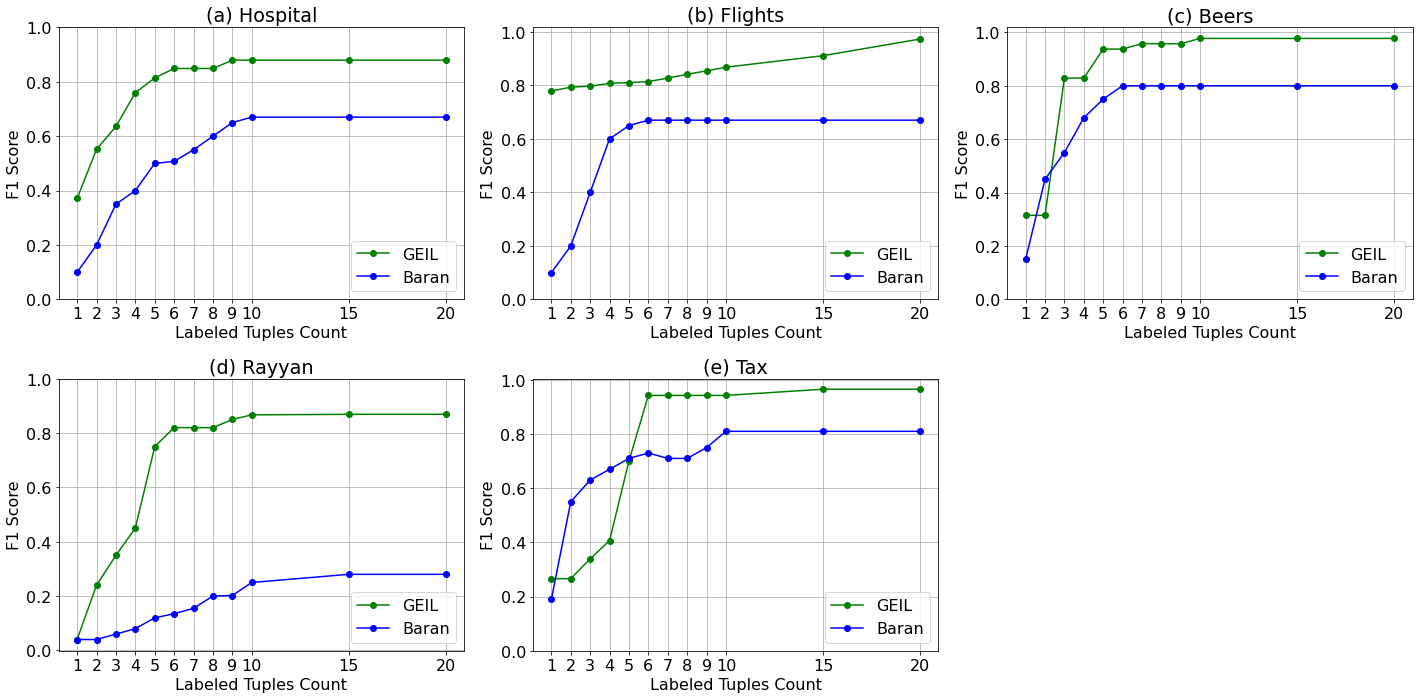

In [1782]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})
# Expanded data to include the new method, with keys being the methods and values being the scores
data = {
    'Hospital': {'GEIL': [0.37116564417177916, 0.5516304347826088, 0.6361323155216284, 0.759725400457666,0.8141025641025642, 0.8488612836438924, 0.8488612836438924, 0.8488612836438924,0.8795180722891566, 0.8795180722891566, 0.8795180722891566, 0.8795180722891566], 'Baran': [0.1, 0.2, 0.35, 0.4,0.5, 0.5077, 0.55, 0.6,0.65, 0.67, 0.67, 0.67]},
    'Flights': {'GEIL': [0.7792714212416625, 0.7933613359286957, 0.7969693867103511, 0.8077237433592153,0.8102637497444286, 0.8141791807130452, 0.8273322422258592, 0.8414484451718494,0.8543073460200533, 0.8679824112894978, 0.9109133681088268, 0.9731667349446949], 'Baran': [0.1, 0.2, 0.4, 0.6,0.65, 0.67, 0.67, 0.67,0.67, 0.67, 0.67, 0.67]},
    'Beers': {'GEIL': [0.3149, 0.3149, 0.8288, 0.8288,0.9373, 0.9373, 0.9578, 0.9574,0.9574, 0.9772151898734178, 0.9772151898734178, 0.9772151898734178], 'Baran': [0.15, 0.45, 0.55, 0.68,0.75, 0.8, 0.8, 0.8,0.8, 0.8, 0.8, 0.8]},
    'Rayyan': {'GEIL': [0.04, 0.24, 0.35, 0.45,0.75, 0.82, 0.82, 0.82,0.85, 0.867, 0.869, 0.869], 'Baran': [0.04, 0.04, 0.06, 0.08,0.12, 0.135, 0.155, 0.2,0.202, 0.25, 0.28, 0.28]},
    'Tax': {'GEIL': [0.2661396574440053, 0.2661396574440053, 0.3394321766561514, 0.4067796610169491,0.700888450148075, 0.9425472077139414, 0.9425472077139414, 0.9425472077139414,0.9425472077139414, 0.9425472077139414, 0.9653679653679654, 0.9653679653679654], 'Baran': [0.19, 0.55, 0.63, 0.67,0.71, 0.73, 0.71, 0.71,0.75, 0.81, 0.81, 0.81]},
    # Add similar structure for other datasets...
}

# Labeled tuples
labeled_tuples = [1,2,3,4,5,6,7,8,9, 10, 15, 20]

# Colors for each method
colors = {
    'GEIL': 'green',
    'Baran': 'blue',
    # Add more colors for additional methods if needed...
}

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Adjust the size as needed
axs = axs.flatten()

# Plot data
for i, (dataset, methods) in enumerate(data.items()):
    ax = axs[i]
    for method, scores in methods.items():
        ax.plot(labeled_tuples, scores, 'o-', label=method, color=colors[method])
    ax.set_title(f'({chr(97 + i)}) {dataset}')
    ax.set_xlabel('Labeled Tuples Count')
    ax.set_ylabel('F1 Score')
    ax.set_xticks(labeled_tuples)
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.grid(True)
    ax.legend()  # This adds the legend to each subplot

# Remove the last subplot (if we have only 7 datasets)
fig.delaxes(axs[-1])

# Adjust layout and save the figure as SVG
plt.tight_layout()
plt.savefig('plots_with_legend.pdf', format='pdf')

plt.show()


In [1783]:
hospital_clean.columns

Index(['index', 'ProviderNumber', 'HospitalName', 'Address1', 'Address2',
       'Address3', 'City', 'State', 'ZipCode', 'CountyName', 'PhoneNumber',
       'HospitalType', 'HospitalOwner', 'EmergencyService', 'Condition',
       'MeasureCode', 'MeasureName', 'Score', 'Sample', 'Stateavg'],
      dtype='object')

In [1795]:
## Random Insert Error for Hospital
hospital_dirty_10_error = hospital_dirty.copy()

In [1801]:
input_matrix = np.array(hospital_dirty!=hospital_clean).astype(int)

In [1814]:
import numpy as np
import random

def random_select(array, k):

  m, n = array.shape

  # 找出全为0的列索引
  zero_cols = np.argwhere(array.sum(axis=0) == 0).flatten() 

  # 从所有列中排除零列
  valid_cols = np.setdiff1d(np.arange(n), zero_cols)

  # 记录除零列外所有0位置 
  zeros = np.argwhere(array[:, valid_cols] == 0)

  if k > len(zeros):
    raise ValueError('k cannot be larger than the number of 0s')

  random.shuffle(zeros)
  positions = zeros[:k]

  # 将位置转换成数组索引形式
  positions = [(x[0], valid_cols[x[1]]) for x in positions]

  for p in positions:
    array[p[0],p[1]] = 1

  return positions

In [1830]:
input_matrix = np.array(hospital_dirty!=hospital_clean).astype(int)
error_rate_origin = input_matrix.sum()
output = random_select(input_matrix,int((1000*20) * 0.1 - error_rate_origin))
len(output)

1491

In [1832]:
import random

def random_replace(string):
  letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','y','z']
  
  new_string = list(string)
  
  # 随机选择一个字母位置
  index = random.randrange(len(string))  

  # 跳过'x'
  while string[index] == 'x':
    index = random.randrange(len(string))

  # 替换为'x'  
  new_string[index] = 'x'

  return "".join(new_string)

In [1840]:
np.array(hospital_dirty!=hospital_clean).sum()

509

In [1865]:
hospital_dirty_10_error = hospital_dirty.copy()
for d in tqdm(output_10):
    i = d[0]
    j = d[1]
    value = hospital_clean.iloc[i,j]
    replace = replace_random_char_with_x(value)
    hospital_dirty_10_error.iloc[i,j] = replace
    if(value==replace):
        print(value,replace)

100%|██████████| 1491/1491 [00:00<00:00, 17300.72it/s]


In [1866]:
np.array(hospital_dirty_10_error!=hospital_clean).sum()

2000

In [1877]:
hospital_dirty_10_error.to_csv('datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv')
# hospital_dirty_20_error.to_csv('datasets/hospital/vary_error_rate/hospital_dirty_20_error.csv')
# hospital_dirty_30_error.to_csv('datasets/hospital/vary_error_rate/hospital_dirty_30_error.csv')
# hospital_dirty_40_error.to_csv('datasets/hospital/vary_error_rate/hospital_dirty_40_error.csv')
# hospital_dirty_50_error.to_csv('datasets/hospital/vary_error_rate/hospital_dirty_50_error.csv')


In [1855]:
# np.where(np.array(input_matrix).sum(axis=0)==0)[0]
output = [d for d in np.argwhere(input_matrix==0) if d[1] not in [0,4,5]]

In [1876]:
import numpy as np
import random

def random_select_rows(arr, k):

  m, n = arr.shape

  # 生成 0 到 m-1 的索引  
  indices = list(range(m))

  # 随机打乱索引
  random.shuffle(indices)

  # 返回第一个 k 个索引对应的行
  return arr[indices[:k],:]
input_matrix = np.array(hospital_dirty!=hospital_clean).astype(int)
output_50 = random_select_rows(np.array(output),10000-input_matrix.sum())
hospital_dirty_50_error = hospital_dirty.copy()
for d in tqdm(output_50):
    i = d[0]
    j = d[1]
    value = hospital_clean.iloc[i,j]
    replace = replace_random_char_with_x(value)
    hospital_dirty_50_error.iloc[i,j] = replace
    if(value==replace):
        print(value,replace)
np.array(hospital_dirty_50_error!=hospital_clean).sum()

  0%|          | 0/9491 [00:00<?, ?it/s]

100%|██████████| 9491/9491 [00:00<00:00, 18258.77it/s]


10000

In [1853]:
# len(output)
# output_10 = np.random.choice(np.array(output),2000-input_matrix.sum(),replace=False)

ValueError: a must be 1-dimensional

In [1903]:
hospital_dirty_50_error = pd.read_csv('datasets/hospital/vary_error_rate/hospital_dirty_50_error.csv',index_col=0).astype(str)

In [1904]:
### For Different Error_Rate, Add Reference Files For Testing
input_matrix = np.array(hospital_dirty!=hospital_clean).astype(int)
# input_matrix_select = input_matrix[selected_rows]
detector_list_all = []
hospital_dirty_vary_error = hospital_dirty_50_error.copy()
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
for label_tuple in tqdm(range(len(hospital_clean))):
    for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple]
        dirty_context = hospital_dirty_vary_error.iloc[label_tuple]
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty_vary_error.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
        for c in range(20):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty_vary_error.columns[c],hospital_dirty_vary_error.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(str(dirty_cell)!=str(clean_cell)):
            detector_list_all.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_all.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])

  1%|          | 7/1000 [00:00<00:14, 67.69it/s]

100%|██████████| 1000/1000 [00:15<00:00, 63.82it/s]


In [1905]:
pd.DataFrame(detector_list_all)[2].value_counts()

0    10000
1    10000
Name: 2, dtype: int64

In [1906]:
# pd.DataFrame(detector_list_all).to_csv('datasets/hospital/vary_error_rate/hospital_50_detect.csv')

### Hospital_Training_Data on various error rate

In [ ]:
# hospital_dirty_10_error

In [1949]:
temp = hospital_dirty_10_error.copy()
temp['index'] = temp['index'].astype(int)-1
temp['index'] = temp['index'].astype(str)
hospital_dirty_dict = temp.set_index('index').to_dict('index')

In [1950]:
selected_rows = np.load('datasets/hospital/detector/index.npy')

In [1957]:
temp = hospital_clean.copy()
temp['index'] = temp['index'].astype(int)-1
temp['index'] = temp['index'].astype(str)
hospital_clean_dict = temp.set_index('index').to_dict('index')

In [1983]:
np.where(detector[:200,3]!=0)[0]

array([ 56,  57,  58,  79,  94, 106, 128, 130, 143, 153, 156, 160, 161,
       165, 175, 179, 182, 184, 192, 195])

In [1995]:
def ICL_Index_Set(detector,cluster,col):
    cluster_index = np.array(cluster) ## list转array
    cluster_select = detector[cluster] ## 
    return cluster_index[np.where(cluster_select[:,col]==0)[0]]

In [2045]:
## 加入标注数据
detector = np.load('datasets/hospital/vary_error_rate/hospital_50_detector.npy')
hospital_dirty_50_error = pd.read_csv('datasets/hospital/vary_error_rate/hospital_dirty_50_error.csv',index_col=0).astype(str)
hospital_dirty_vary_error = hospital_dirty_50_error.copy()
coreset_detect = np.where(detector.sum(axis=1)==0)[0]
# coreset_detect = np.random.choice(np.arange(0,1000,1),600)
# coreset_detect = np.arange(0,1000,1) + 1
header = list(hospital_dirty.columns)
noise_col = np.where(detector.sum(axis=0)>0)[0]
safe_value = ['empty'] ## 不注入噪声的类型
training_list = []
for h in tqdm(hospital_cluster): ## 对比学习的采样策略在同cluster内进行
    # coreset_subset = [n for n in hospital_cluster[h] if n in coreset_detect]
    coreset_subset = [n for n in hospital_cluster[h]]
    for coreset_tuple in coreset_subset: ## 取遍coreset所有的tuple，剩下的n-1 tuple是参考对象,coreset_tuple是index
        # noise_col_subset = np.random.choice(noise_col,10,replace=False) ## 取5个col作为注入噪声的对象
        noise_col_subset = [n for n in noise_col if n in np.where(detector[coreset_tuple]==0)[0]] ## 同时为noise col而且detector认为是正常的value
        # noise_col_subset = np.random.choice(noise_col_subset,2,replace=False)
        noise_col_subset = np.random.choice(noise_col_subset,2)
        # noise_col_subset = [n for n in noise_col_subset if n!=0] ## 排除index
        for noise_col_single in noise_col_subset:
            col_name = header[noise_col_single] ## 从index转成列名
            if(hospital_dirty_dict[str(coreset_tuple)][col_name] not in safe_value and len(coreset_subset)>2):
                temp_dict = hospital_dirty.iloc[coreset_tuple,1:].to_dict() ## coreset tuple字典
                clean_cell = temp_dict[col_name]
                dirty_cell = replace_random_char_with_x(clean_cell) ## 注入噪声
                temp_dict[col_name] = dirty_cell
                coreset_reference = select_two_different_elements(coreset_subset,coreset_tuple)
                template_dict = {}
                clean_dict = {}
                template_dict[col_name] = ''
                clean_dict[col_name] = clean_cell
                text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[str(coreset_reference[0])]), json.dumps(hospital_dirty_dict[str(coreset_reference[1])]))
                # cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
                # cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
                cluster_coreset = ICL_Index_Set(detector,coreset_subset,noise_col_single)
                if(len(cluster_coreset)>0):
                    coreset_reference = np.random.choice(cluster_coreset,1,replace=False) ## 取两个
                    # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                    ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[str(coreset_reference[0])]))
                else:
                    coreset_reference = np.random.choice(selected_rows,1,replace=False) ## 取两个
                    # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                    ICL_text = '%s\n\n' % (json.dumps(hospital_clean_dict[str(coreset_reference[0])]))
                
                training_list.append([text_head,ICL_text,'',json.dumps(clean_dict)])
training_list_label = []
for label_tuple in tqdm(selected_rows):
    for noise_col_single in range(len(header)):
        col_name = header[noise_col_single]
        template_dict = {}
        template_dict[col_name] = ''
        clean_dict = {}
        temp_dict = hospital_dirty.iloc[label_tuple,1:].to_dict()
        clean_cell = hospital_clean.iloc[label_tuple,noise_col_single]
        dirty_cell = hospital_dirty.iloc[label_tuple,noise_col_single]
        clean_dict[col_name] = clean_cell
        if(clean_cell!=dirty_cell):
            text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
            cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
            # cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
            cluster_coreset = ICL_Index_Set(detector,cluster,noise_col_single)
            if(len(cluster_coreset)>0):
                coreset_reference = np.random.choice(cluster_coreset,1,replace=False) ## 取两个
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[str(coreset_reference[0])]))
            else:
                coreset_reference = np.random.choice(selected_rows,1,replace=False) ## 取两个
                # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
                ICL_text = '%s\n\n' % (json.dumps(hospital_clean_dict[str(coreset_reference[0])]))
            training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])

100%|██████████| 20/20 [00:00<00:00, 326.50it/s]


In [2046]:
training_list_pd = pd.DataFrame(training_list)
training_list_label_pd = pd.DataFrame(training_list_label)
training_list_pd = pd.concat([training_list_pd,training_list_label_pd]).drop_duplicates()
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [2047]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-train-error-50.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [2048]:
## 检查所有detector要求detect的元素，组成一个list，查找并附加coreset
# for d in detector
detector_indice = np.argwhere(detector==1)
detector_list_all = []
candidate_length = {}
right_loc = {}
training_list_label_test = []
count = 0
for d in tqdm(detector_indice):
    
    label_tuple = d[0] ## 行
    i = d[1] ## 列
    col_name = hospital_clean.columns[i] ## 列名
    all_context_clean = ''
    all_context_dirty = ''
    # clean_context = hospital_clean.iloc[label_tuple]
    dirty_context = hospital_dirty_vary_error.iloc[label_tuple]
    clean_cell = hospital_clean.iloc[label_tuple,i]
    dirty_cell = hospital_dirty_vary_error.iloc[label_tuple,i]
    
    template_dict = {}
    template_dict[col_name] = ''
    temp_dict = hospital_dirty_dict[str(label_tuple)]
    
    clean_dict = {}
    clean_dict[col_name] = clean_cell
    # single_context_clean = 'COL %s VAL %s ' % (hospital_clean.columns[i],clean_cell)
    # single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
    # if(clean_cell!=dirty_cell):
    text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
    # cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
    # cluster_coreset = [c for c in cluster if c in coreset_detect] ## 找到簇内coreset元素
    # coreset_reference = np.random.choice(cluster_coreset,1,replace=False) ## 取两个
    # # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
    # ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]))
    # training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])
    cluster = [hospital_cluster[h] for h in hospital_cluster if hospital_cluster[h].__contains__(label_tuple)][0] ## 找到label tuple所在的簇
    cluster_coreset = ICL_Index_Set(detector,cluster,i)
    if(len(cluster_coreset)>0):
        coreset_reference = np.random.choice(cluster_coreset,1,replace=False) ## 取两个
        # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
        ICL_text = '%s\n\n' % (json.dumps(hospital_dirty_dict[str(coreset_reference[0])]))
    else:
        coreset_reference = np.random.choice(selected_rows,1,replace=False) ## 取两个
        # ICL_text = '%s\n\n%s\n\n' % (json.dumps(hospital_dirty_dict[coreset_reference[0]]), json.dumps(hospital_dirty_dict[coreset_reference[1]]))
        ICL_text = '%s\n\n' % (json.dumps(hospital_clean_dict[str(coreset_reference[0])]))
    if(dirty_cell!=clean_cell):
        count += 1
    training_list_label_test.append([text_head,ICL_text,'',json.dumps(clean_dict)])
count

  0%|          | 0/9823 [00:00<?, ?it/s]

100%|██████████| 9823/9823 [00:02<00:00, 4616.15it/s]


9810

In [2049]:
training_list_pd = pd.DataFrame(training_list_label_test)
# training_list_label_pd = pd.DataFrame(training_list_label)
# training_list_pd = pd.concat([training_list_pd,training_list_label_pd]).drop_duplicates()
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [2050]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/hospital/hospital-train-error-50-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [2103]:
hospital_error = pd.read_csv('datasets/hospital/vary_error_rate/hospital_50.csv').astype(str)
np.array(hospital_error!=hospital_clean).sum()

10000

In [2125]:
def Flight_Noise_Generation_sche_dep(cell):
    task = [0,1,2,3,4,5,6]
    task_select = np.random.choice(task)
    if(task_select==0):
        cell_output = cell.replace(' ','').replace('.','')
        cell_output = cell_output[:-1] + 'Dec 1'
    elif(task_select==1):
        cell_output = '11/30 ' + cell
    elif(task_select==2):
        cell_output = 'Not Available'
    elif(task_select==3):
        cell_output = cell.replace(' ','').replace('.','')
        cell_output = cell_output[:-2] + 'noon'
    elif(task_select==4):
        cell_output = cell + ' (-00:00)'
    elif(task_select==5):
        cell_output = '12/02/2011 ' + cell
    else:
        cell_output = 'Dec 02 ' + cell
    return cell_output
# def Flight_Noise_Generation_sche_arr(cell):
#     task = [0,1,2,3,4,5,6]
#     task_select = np.random.choice(task)
#     if(task==0):
#         cell_output = cell.replace(' ','').replace('.','')
#         cell_output = cell_output[:-1] + 'Dec 1'
#     elif(task==1):
#         cell_output = '12/02/2011 ' + cell
#     elif(task==2):
#         cell_output = 'Not Available'
#     elif(task==3):
#         cell_output = cell.replace(' ','').replace('.','')
#         cell_output = cell_output[:-2] + 'noon'
#     elif(task==4):
#         cell_output = cell + ' (-00:00)'
#     elif(task==5):
#         cell_output = '12/02/2011 ' + cell
#     else:
#         cell_output = 'Dec 02 ' + cell
#     return cell_output

In [2113]:
input_matrix_flight = np.array(flight_clean!=flight_dirty)

In [2231]:
## Flight_Error_Rate_50
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
input_matrix_flight = np.array(flight_clean!=flight_dirty)
clean_cell_place = np.argwhere(input_matrix_flight==0) ## Clean Cell Place
clean_cell_select = [d for d in clean_cell_place if d[1] not in [0,1,2] and d[0] not in flight_label_index and d[0] in inject_index]
clean_cell_select_add = [d for d in clean_cell_place if d[1] not in [0,1,2] and d[0] not in flight_label_index and d[0]  not in inject_index]
random_index_add = np.random.choice(len(clean_cell_select_add),3280-len(clean_cell_select),replace=False)
clean_cell_noise_place = np.array(clean_cell_select_add)[random_index_add] ## 30-50
clean_cell_noise_place = np.concatenate([np.array(clean_cell_select),clean_cell_noise_place])

In [2208]:
## Flight_Error_Rate_20
input_matrix_flight = np.array(flight_clean!=flight_dirty)
clean_cell_place = np.argwhere(input_matrix_flight==1) ## Clean Cell Place
clean_cell_select = [d for d in clean_cell_place if d[1] not in [0,1,2] and d[0] not in flight_label_index ]
random_index = np.random.choice(len(clean_cell_select),1640,replace=False)
clean_cell_noise_place = np.array(clean_cell_select)[random_index] ## 30-50

In [2215]:
len(clean_cell_noise_place)

1640

In [2232]:
flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_dirty_50_error = flight_dirty.copy()
for c in clean_cell_noise_place:
    i = c[0]
    j = c[1]
    clean_value = flight_dirty.iloc[i,j]
    replace_value = Flight_Noise_Generation_sche_dep(clean_value)
    flight_dirty_50_error.iloc[i,j] = replace_value
# flight_dirty_10_error = flight_dirty.copy()
# for c in clean_cell_noise_place:
#     i = c[0]
#     j = c[1]
#     clean_value = flight_clean.iloc[i,j]
#     replace_value = clean_value
#     flight_dirty_10_error.iloc[i,j] = replace_value

In [2227]:
np.array(flight_dirty_40_error!=flight_clean).sum()

6560

In [2142]:
flight_dirty_10_error.to_csv('datasets/flights/vary_error_rate/flight_dirty_10_error.csv',index=False)

In [2139]:
flight_dirty_20_error.to_csv('datasets/flights/vary_error_rate/flight_dirty_20_error.csv',index=False)

In [2133]:
flight_dirty.to_csv('datasets/flights/vary_error_rate/flight_dirty_30_error.csv',index=False)

In [2228]:
flight_dirty_40_error.to_csv('datasets/flights/vary_error_rate/40/flight_dirty_40_error.csv',index=False)

In [2214]:
np.array(flight_dirty!=flight_clean).sum()

4920

In [2089]:
count = 0
hospital_dirty_10_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv',index_col=0).astype(str)
hospital_correction = hospital_dirty_10_error.copy()
hospital_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/hospital-train-error-10-test.csv',index_col=0)
hospital_detector = np.load('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_10_detector.npy')
import ast
for d in np.argwhere(hospital_detector==1):
    i = d[0]
    j = d[1]
    try:
        predict = list(ast.literal_eval(hospital_result.iloc[count,-1]).values())[0]
        hospital_correction.iloc[i,j] = predict
        count += 1
    except:
        print(count)
        count += 1

625
1589
1603
1865


In [2090]:
hospital_correction.to_csv('datasets/hospital/vary_error_rate/hospital_error_10_correction.csv')

In [2091]:
# hospital_correction = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/correct_result/hospital_correction_20.csv',index_col=0).astype(str)
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# hospital_correction.iloc[:,3] = hospital_dirty.iloc[:,3]
# hospital_correction.iloc[:,14] = hospital_dirty.iloc[:,14]
# a = np.where(input_matrix_hospital[hospital_label_index[:9]].sum(axis=0)!=0)
# b = np.where(input_matrix_hospital[hospital_label_index[:20]].sum(axis=0)!=0)
# for h in [i for i in b[0] if i not in a[0]]:
#     hospital_correction.iloc[:,h] = hospital_dirty.iloc[:,h]
hospital_dirty_10_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv',index_col=0).astype(str)
for i in range(1000):
    for j in range(20):
        dirty_cell = hospital_dirty_10_error.iloc[i,j]
        clean_cell = hospital_clean.iloc[i,j]
        correct_cell = hospital_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.9102167182662538, 0.882, 0.8958862366683595)

In [2107]:
np.array(hospital_clean!=hospital_dirty_50_error).sum()

10000

In [2106]:
hospital_dirty_50_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_50_error.csv',index_col=0).astype(str)
hospital_dirty_50_error.to_csv('datasets/hospital/vary_error_rate/hospital_50.csv',index=False)

In [2108]:
hospital_dirty_40_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_40_error.csv',index_col=0).astype(str)
hospital_dirty_40_error.to_csv('datasets/hospital/vary_error_rate/hospital_40.csv',index=False)

In [2100]:
hospital_dirty_30_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_30_error.csv',index_col=0).astype(str)
hospital_dirty_30_error.to_csv('datasets/hospital/vary_error_rate/hospital_30.csv',index=False)

In [2101]:
hospital_dirty_20_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_20_error.csv',index_col=0).astype(str)
hospital_dirty_20_error.to_csv('datasets/hospital/vary_error_rate/hospital_20.csv',index=False)

In [2102]:
hospital_dirty_10_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv',index_col=0).astype(str)
hospital_dirty_10_error.to_csv('datasets/hospital/vary_error_rate/hospital_10.csv',index=False)

In [2092]:
Correct_Fixed_Error,All_Fixed_Error,All_Data_Error

(1764, 1938, 2000)

(1764, 1938, 2000) (0.9102167182662538, 0.882, 0.8958862366683595) 10
(3620, 3890, 4000) (Correct_Fixed_Error,All_Fixed_Error,All_Data_Error) (0.9305912596401028, 0.905, 0.9176172370088721) 20
(5475, 5847, 6000) (0.9363776295536173, 0.9125, 0.9242846290200051) 30
(7290, 7750, 8000) (0.9406451612903226, 0.91125, 0.9257142857142856) 40
(9207, 9782, 10000) (0.9412185647106931, 0.9207, 0.9308462238398544) 50

### Flight_Vary_Error_Rate

In [2207]:
flight_dirty_30_error = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_temp = flight_dirty_30_error.copy()
flight_temp['count'] = flight_temp.apply(Check_Clean_Time_Format,axis=1)
inject_index = flight_temp[flight_temp['count']>0].index
inject_index

Int64Index([   1,    2,    5,   31,   32,   33,   36,   37,   50,   51,
            ...
            2324, 2325, 2326, 2328, 2339, 2355, 2356, 2357, 2358, 2362],
           dtype='int64', length=1326)

In [2233]:
# flight_clean.iloc[C]
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
def Check_Clean_Time_Format(row):
    count = 0
    for x,y in row[3:].items():
        if not (is_clean_time_format(y)):
            count += 1
    return count
flight_dirty_30_error = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_temp = flight_dirty_50_error.copy()
print(np.array(flight_temp!=flight_clean).sum())
flight_temp['count'] = flight_temp.apply(Check_Clean_Time_Format,axis=1)
flight_dirty_clean = flight_temp.copy()
# cluster_select_flight = cluster_select_flight_15
cluster_select_flight = cluster_select_flight_20
for i in range(100): ## Data Cleaning Clusters
    test = flight_temp[flight_temp['flight']==flight_unique[i]]
    test_index = test.index
    if(i in cluster_select_flight): ## 同cluster内有ground truth，传播结果
        clean_cell = flight_clean[flight_clean['flight']==flight_unique[i]].iloc[0:1,-4:] ## clean time, last 4 cells
        flight_dirty_clean.iloc[test_index,-5:-1] = clean_cell
    else: ## Graph Method to Vote the most common clean files
        try:
            test_clean = test[test['count']<3]
            C = CoresetIndex(test_clean)
            clean_cell = flight_temp.iloc[C[0],-5:-1] ## clean time, last 4 cells
            flight_dirty_clean.iloc[test_index,-5:-1] = clean_cell
        except:
            print(i)

8200


In [2234]:
flight_clean = pd.read_csv('datasets/flights/clean.csv').fillna('').astype(str)
# flight_dirty = pd.read_csv('datasets/flights/dirty.csv').fillna('').astype(str)
flight_dirty = flight_dirty_50_error.copy()
All_Error = np.array(flight_dirty!=flight_clean).astype(int)
All_Data_Error = All_Error.sum()
Correct_Fixed_Error = 0
All_Fixed_Error = 0
for x in range(All_Error.shape[0]):
    for y in range(All_Error.shape[1]):
        dirty_cell = flight_dirty.iloc[x,y]
        fixed_cell = flight_dirty_clean.iloc[x,y]
        clean_cell = flight_clean.iloc[x,y]
        if(fixed_cell!=dirty_cell):
            All_Fixed_Error += 1
            if(fixed_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision = Correct_Fixed_Error / All_Fixed_Error
Recall = Correct_Fixed_Error / All_Data_Error
F1 = (2*Precision*Recall) / (Precision + Recall)
print(Precision,Recall,F1)

0.34555492638731594 0.2976829268292683 0.3198375262054507


In [2198]:
flight_dirty_50_error.to_csv('datasets/flights/vary_error_rate/50/flight_dirty_50_error_correction.csv',index=False)

In [2199]:
np.array(flight_dirty_50_error!=flight_clean).sum()

8200

In [2161]:
np.array(flight_dirty_clean.iloc[:,:-1]!=flight_clean).sum()

67

1 1 1 10
0.9884111009454102 0.988109756097561 0.9882604055496266 20
0.96 0.9628048780487805 0.96 30
0.7389435989256938 0.6291158536585366 0.6796212433100042 40
0.7243723849372385 0.3378048780487805 0.46074517631403855 50

In [ ]:
### Generator Parameter Size Effect Research: Hospital

## Vicuna-7B

In [2245]:
len(np.argwhere(hospital_detector==1)),len(hospital_result)

(496, 508)

In [2258]:
pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/hospital-test/generated_predictions.jsonl',lines=True)

,label,predict
0,"{""MeasureName"": ""surgery patients who were tak...","{""MeasureName"": ""surgery patients who were tak..."
1,"{""City"": ""birmingham""}","{""City"": ""birmingham""}"
2,"{""City"": ""birmingham""}","{""City"": ""birmingham""}"
3,"{""City"": ""sheffield""}","{""City"": ""sheffield""}"
4,"{""ProviderNumber"": ""10019""}","{""ProviderNumber"": ""10019""}"
...,...,...
503,"{""HospitalType"": ""acute care hospitals""}","{""HospitalType"": ""acute care hospitals""}"
504,"{""City"": ""oneonta""}","{""City"": ""enterprise""}"
505,"{""Address1"": ""150 gilbreath drive""}","{""Address1"": ""150 gilbreath drive""}"
506,"{""HospitalName"": ""st vincents blount""}","{""HospitalName"": ""st vincents blount""}"


In [2294]:
count = 0
# hospital_dirty = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv',index_col=0).astype(str)
hospital_correction = hospital_dirty.copy()
# hospital_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_hospital-test.csv',index_col=0) ## Vicuna-7B
hospital_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-hospital-test.csv',index_col=0) ## Vicuna-13B
# hospital_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/hospital-test/generated_predictions.jsonl',lines=True) ## BLOOM-560B
# hospital_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/hospital-test/generated_predictions.jsonl',lines=True) ## ChatGLM3
hospital_detector = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/detector_5.npy').reshape((-1,20))
import ast
for d in np.argwhere(hospital_detector==1):
    i = d[0]
    j = d[1]
    try:
        predict = list(ast.literal_eval(hospital_result.iloc[count,-1]).values())[0]
        hospital_correction.iloc[i,j] = predict
        count += 1
    except:
        print(count)
        count += 1
print(count,len(hospital_result))

508 508


In [2737]:
## T5 Baseline for Beers
count = 0
hospital_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/t5/test_50_correction.csv',index_col=0).fillna('')
hospital_detector = np.load('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_50_detector.npy')
hospital_correction = hospital_dirty.copy()
for d in np.argwhere(hospital_detector==1):
    i = d[0] 
    j = d[1]
    
    try:
        # predict = list(ast.literal_eval(beer_result.iloc[count,-1]).values())[0]
        predict = hospital_result.iloc[count,-1]
        hospital_correction.iloc[i,j] = predict
        count += 1
    except:
        print(count)
        count += 1
print(count,len(np.argwhere(hospital_detector==1)),len(hospital_result))

9823 9823 9823


In [2738]:
# hospital_correction = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/correct_result/hospital_correction_20.csv',index_col=0).astype(str)
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# hospital_correction.iloc[:,3] = hospital_dirty.iloc[:,3]
# hospital_correction.iloc[:,14] = hospital_dirty.iloc[:,14]
# a = np.where(input_matrix_hospital[hospital_label_index[:9]].sum(axis=0)!=0)
# b = np.where(input_matrix_hospital[hospital_label_index[:20]].sum(axis=0)!=0)
# for h in [i for i in b[0] if i not in a[0]]:
#     hospital_correction.iloc[:,h] = hospital_dirty.iloc[:,h]
# hospital_dirty_10_error = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_dirty_10_error.csv',index_col=0).astype(str)
for i in range(1000):
    for j in range(20):
        dirty_cell = hospital_dirty.iloc[i,j]
        clean_cell = hospital_clean.iloc[i,j]
        correct_cell = hospital_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.02627800114876508, 0.35952848722986247, 0.04897631473303895)

In [ ]:
(0.14211695040710584, 0.37721021611001965, 0.2064516129032258)
(0.07027225901398086, 0.37524557956778, 0.11837620080570188)
(0.04485935984481086, 0.36345776031434185, 0.0798618605655083)
(0.03348334833483348, 0.3654223968565815, 0.06134564643799473)
(0.02627800114876508, 0.35952848722986247, 0.04897631473303895)

Hospital_Vicuna-7B:(0.9105367793240556, 0.899803536345776, 0.9051383399209485)
Hospital_Bloom-560B:(0.7924528301886793, 0.7426326129666012, 0.7667342799188641)
Hospital_ChatGLM3-6B:(0.9027777777777778, 0.8939096267190569, 0.8983218163869695)
Hospital_Vicuna-13B:(0.9447731755424064, 0.9410609037328095, 0.9429133858267718)
Hospital_T5:(0.5409836065573771, 0.3889980353634578, 0.4525714285714286)

## Rayyan-Generator-Impact

In [126]:
## Try to test recall on Rayyan Dataset
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
# rayyan_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_rayyan-test-20.csv',index_col=0) ## Vicuna-7B
# rayyan_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/rayyan-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
# rayyan_result = pd.read_json('//home/yanmy/LLaMA-Efficient-Tuning-main/inference/rayyan-test-20/generated_predictions.jsonl',lines=True) ## ChatGLM-3
rayyan_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-rayyan-test-ablation.csv',index_col=0) ## Ablation Study for Rayyan_Generation
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
count = 0
valid_count = 0
rayyan_correction = rayyan_dirty.copy()
import ast
for d in np.argwhere(rayyan_detector==1):
    i = d[0]
    j = d[1] + 1 ## Ignore Index
    try:
        predict = list(ast.literal_eval(rayyan_result.iloc[count,-1]).values())[0]
        rayyan_correction.iloc[i,j] = predict
        valid_count += 1
    except:
        predict = rayyan_result.iloc[count,-1]
        rayyan_correction.iloc[i,j] = predict
    count += 1
print(count,len(rayyan_result),len(np.argwhere(rayyan_detector==1)))
    

1117 1117 1117


In [2582]:
## T5 Baseline for Beers
count = 0
rayyan_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/rayyan/t5/t5_correction.csv',index_col=0).fillna('')
rayyan_correction = rayyan_dirty.copy()
for d in np.argwhere(rayyan_detector==1):
    i = d[0] 
    j = d[1] + 1 ## skip id
    
    try:
        # predict = list(ast.literal_eval(beer_result.iloc[count,-1]).values())[0]
        predict = rayyan_result.iloc[count,-1]
        rayyan_correction.iloc[i,j] = predict
        count += 1
    except:
        print(count)
        count += 1
print(count,len(np.argwhere(rayyan_detector==1)),len(rayyan_result))

1117 1117 1117


In [127]:
import json
rayyan_clean = pd.read_csv('datasets/rayyan/clean.csv').fillna('')
rayyan_dirty = pd.read_csv('datasets/rayyan/dirty.csv').fillna('')
def Str2Int(row):
    for index in range(11):
        temp = row[index]
        try:
            row[index] = str(int(temp))
        except:
            continue
    return row
rayyan_clean = rayyan_clean.apply(Str2Int,axis=1)
rayyan_dirty = rayyan_dirty.apply(Str2Int,axis=1)
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
for i in range(1000):
    for j in range(11):
        dirty_cell = rayyan_dirty.iloc[i,j]
        clean_cell = rayyan_clean.iloc[i,j]
        correct_cell = rayyan_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.13339301700984782, 0.1571729957805907, 0.14430992736077483)

Rayyan_Vicuna-7B:(0.6332720588235294, 0.7267932489451476, 0.6768172888015718)
Rayyan_Bloom-560M:(0.5892672858617131, 0.6023206751054853, 0.5957224830464266)
ChatGLM-6B:(0.6975023126734505, 0.7953586497890295, 0.7432232626909808)
Rayyan_t5 (0.5532516493873704, 0.619198312236287, 0.5843703334992533)
Rayyan_Ablation_Study

### Beers-Generator Parameter Size Impact

In [62]:
detector_beer = np.load('datasets/beers/detector/multi-view/detection_cell_5.npy').reshape((-1,9))
## Only the labelled attributes is dirty
# detector_beer.sum(axis=0)
detector_beer[:,0] = 0
detector_beer[:,1] = 0
detector_beer[:,4] = 0
detector_beer[:,5] = 0
detector_beer[:,6] = 0

In [124]:
count = 0
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_beer-test-20.csv',index_col=0) ## Vicuna-7B
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0) ## Vicuna-13B
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-beer-test-ablation.csv',index_col=0) ## generation-ablation
beer_correction = beer_dirty.copy()
for d in np.argwhere(detector_beer==1):
    i = d[0] 
    j = d[1] + 2
    
    try:
        predict = list(ast.literal_eval(beer_result.iloc[count,-1]).values())[0]
        beer_correction.iloc[i,j] = predict
        count += 1
    except:
        # print(count)
        count += 1
print(count,len(np.argwhere(detector_beer==1)),len(beer_result))

3364 3364 3364


In [2579]:
## T5 Baseline for Beers
count = 0
beer_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/t5/t5_correction_all.csv',index_col=0).fillna('')
beer_correction = beer_dirty.copy()
for d in np.argwhere(np.zeros(beer_clean.shape)==0):
    i = d[0] 
    j = d[1]
    
    try:
        # predict = list(ast.literal_eval(beer_result.iloc[count,-1]).values())[0]
        predict = beer_result.iloc[count,-1]
        beer_correction.iloc[i,j] = predict
        count += 1
    except:
        print(count)
        count += 1
print(count,len(np.argwhere(detector_beer==1)),len(beer_result))

26510 3364 26510


In [125]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
for i in range(len(beer_clean)):
    for j in range(11):
        dirty_cell = beer_dirty.iloc[i,j]
        clean_cell = beer_clean.iloc[i,j]
        correct_cell = beer_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

(0.5689655172413793, 0.5701519213583557, 0.5695581014729951)

Beer_Vicuna-7B:(0.8127229488703924, 0.8144176347929699, 0.8135694093140902)
Beer_Bloom-560M:(0.92496765847348, 0.8519511468573131, 0.8869592184834859)
ChatGLM-6B: (0.9628418549346016, 0.9648495680667263, 0.9638446659723255)
Beer_t5: (0.7261744966442953, 0.966934763181412, 0.8294365657339978)

In [2357]:
import re
import random
def imdb_year_detection(cell):
    """
    Check if the given cell is dirty or not for the startYear column.

    :param cell: A string representing a cell from the startYear column.
    :return: Boolean indicating whether the cell is dirty.
    """
    # Regular expression for a clean cell: exactly four digits
    clean_pattern = r'^\d{4}$'

    # Return True (dirty) if cell does not match the clean pattern
    return not re.match(clean_pattern, cell)
def imdb_year_generation(clean_cell):
    """
    Generate a dirty cell from a clean one. The clean cell is assumed to be
    a four-digit year. The dirty cell will be the last two digits of the year.

    :param clean_cell: A string representing a clean cell (four-digit year).
    :return: A string representing a dirty cell (last two digits of the year).
    """
    # Extract the last two digits of the year
    dirty_cell = clean_cell[-2:]

    return dirty_cell
def imdb_runtime_detection(cell):
    pattern = r'^\d+$'
    return not re.match(pattern, cell)

def imdb_runtime_generation(clean_cell):
    minutes = int(clean_cell)

    # Convert minutes to hours and add a random level of decimal precision
    hours = minutes / 60
    precision = random.choice([1, 2, 3])  # Random precision level
    formatted_hours = round(hours, precision)

    # Format the dirty cell
    dirty_cell = f"{formatted_hours} h"

    return dirty_cell
def imdb_director_detection(cell):
    # Regular expression to detect if the cell contains special characters or combining diacritical marks
    pattern = re.compile(r'[�\u0300-\u036F]')
    return bool(pattern.search(cell))
def imdb_director_generation(cell):
    special_chars = ['�', '\u0301', '\u0300', '\u0302', '\u0303', '\u0304']
    
    # Randomly choose a special character
    char = random.choice(special_chars)
    
    # Randomly choose a position to insert the special character
    position = random.randint(0, len(cell))
    
    # Insert the special character at the chosen position
    dirty_cell = cell[:position] + char + cell[position:]
    
    return dirty_cell
def imdb_title_detection(cell):
    return cell.__contains__('x')
def imdb_title_generation(input_string):
    if not input_string:
        return input_string

    # 随机选择要替换的字符
    char_to_replace = random.choice(input_string)

    # 使用字符串的 replace 方法替换所有相同字符为 'x'
    result_string = input_string.replace(char_to_replace, 'x')

    return result_string
def Imdb_Row_Detect(x,cell):
    if(x=='titleType'):
        return imdb_title_detection(cell)
    elif(x=='title'):
        return imdb_title_detection(cell)
    elif(x=='startYear'):
        return imdb_year_detection(cell)
    elif(x=='runtimeMinutes'):
        return imdb_runtime_detection(cell)
    elif(x=='director'):
        return imdb_director_detection(cell)
    else:
        return False
    
def Imdb_Row_Generate(x,cell):
    if(x=='titleType'):
        return imdb_title_generation(cell)
    elif(x=='title'):
        return imdb_title_generation(cell)
    elif(x=='startYear'):
        return imdb_year_generation(cell)
    elif(x=='runtimeMinutes'):
        return imdb_runtime_generation(cell)
    elif(x=='director'):
        return imdb_director_generation(cell)
    else:
        return False

In [2371]:
imdb_error_index = np.where(input_matrix_imdb.sum(axis=1)!=0)[0]
imdb_error_index

array([    48,     52,     67, ..., 999956, 999987, 999994])

In [2372]:
np.save('datasets/imdb/imdb_error_index.npy',np.array(imdb_error_index))

In [2458]:
### For Different Error_Rate, Add Reference Files For Testing
imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)
input_matrix_imdb = np.array(imdb_dirty!=imdb_clean).astype(int)
# input_matrix_select = input_matrix[selected_rows]
detector_list_all = []
imdb_dirty_vary_error = imdb_dirty.copy()
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(imdb_label_index):
for label_tuple in tqdm(range(len(imdb_clean))):
# for label_tuple in tqdm(imdb_error_index):
    for i in range(len(imdb_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = imdb_clean.iloc[label_tuple].copy()
        dirty_context = imdb_dirty_vary_error.iloc[label_tuple].copy()
        clean_cell = imdb_clean.iloc[label_tuple,i]
        dirty_cell = imdb_dirty_vary_error.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (imdb_clean.columns[i],dirty_cell)
        for c in range(6):
            # all_context_clean += 'COL %s VAL %s ' % (imdb_clean.columns[c],imdb_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[c],imdb_dirty_vary_error.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(str(dirty_cell)!=str(clean_cell)):
            detector_list_all.append([all_context_dirty,single_context_dirty,1])
            # detector_list_all.append([all_context_clean,single_context_clean,0])
        else:
            detector_list_all.append([all_context_dirty,single_context_dirty,0])
            # detector_list.append([single_context_dirty,1])
        # if(dirty_cell!=clean_cell):
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        #     detector_list_tax.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [2460]:
imdb_detection_test = pd.DataFrame(detector_list_all)

In [2461]:
imdb_detection_test.to_csv('datasets/imdb/detector/test_all.csv')

In [2411]:
imdb_detection_test.to_csv('datasets/imdb/detector/test.csv')

In [2408]:
### Data Augmentation
imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)
input_matrix_imdb = np.array(imdb_dirty!=imdb_clean).astype(int)
# input_matrix_select = input_matrix[selected_rows]
detector_list_imdb = []
imdb_dirty_vary_error = imdb_dirty.copy()
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(selected_rows):
# for label_tuple in tqdm(range(len(imdb_clean))):
for label_tuple in tqdm(imdb_error_index):
    for i in range(len(imdb_dirty_vary_error.columns)-1): ## Exclude genres
        # if(input_matrix[label_tuple,i]==1):
        clean_cell = imdb_dirty_vary_error.iloc[label_tuple,i]
        if(not Imdb_Row_Detect(imdb_dirty_vary_error.columns[i],clean_cell)): ## Clean Value
            all_context_clean = ''
            all_context_dirty = ''
            clean_context = imdb_dirty.iloc[label_tuple].copy()
            dirty_context = imdb_dirty.iloc[label_tuple].copy()
            # clean_cell = imdb_dirty_vary_error.iloc[label_tuple,i]
            dirty_cell = Imdb_Row_Generate(imdb_dirty_vary_error.columns[i],clean_cell)
            dirty_context[imdb_dirty_vary_error.columns[i]] = dirty_cell ## Inject Noise On Dirty_Cell
            single_context_clean = 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[i],clean_cell)
            single_context_dirty = 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[i],dirty_cell)
            for c in range(6):
                all_context_clean += 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[c],clean_context[c])
                all_context_dirty += 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[c],dirty_context[c])
            # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
            # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
            # detector_list.append([single_context_clean,0])        
            # detector_list.append([all_context_clean,0])
            # if(str(dirty_cell)!=str(clean_cell)):
            #     detector_list_all.append([all_context_dirty,single_context_dirty,1])
            # else:
            #     detector_list_all.append([all_context_dirty,single_context_dirty,0])
                # detector_list.append([single_context_dirty,1])
            if(dirty_cell!=clean_cell):
                detector_list_imdb.append([all_context_dirty,single_context_dirty,1])
                detector_list_imdb.append([all_context_clean,single_context_clean,0])
            else:
                detector_list_imdb.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/56240 [00:00<?, ?it/s]

In [2409]:
imdb_detection_test_aug = pd.DataFrame(detector_list_imdb)

In [2412]:
imdb_detection_test_aug.to_csv('datasets/imdb/detector/train.csv')

Raha's performance on imdb:
Precision = 0.28
Recall = 0.37
F1 = 0.32
Baran's performance on imdb:
Precision = 0.19
Recall = 0.08
F1 = 0.12
运行时间：3818.2799582481384 秒

In [2422]:
# def ICL_Beer(row):
training_list_label = []
for index in tqdm(imdb_error_index):
    for i in range(5):
        clean_cell = imdb_dirty.iloc[index,i]
        if(not Imdb_Row_Detect(imdb_dirty.columns[i],clean_cell)): ## Clean Value
            dirty_cell = Imdb_Row_Generate(imdb_dirty_vary_error.columns[i],clean_cell)
            
            col_name = imdb_dirty.columns[i]
            template_dict = {}
            template_dict[col_name] = ''
            temp_dict = imdb_dirty.iloc[index].to_dict()
            temp_dict[col_name] = dirty_cell
            clean_dict = {}
            clean_dict[col_name] = clean_cell
            coreset_reference = np.random.choice([c for c in imdb_label_index if c!=index],3,replace=False)
            if(dirty_cell!=clean_cell):
                text_head = 'You are an expert in cleaning IMDB Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
                dict_0 = imdb_clean.iloc[coreset_reference[0]].to_dict()
                dict_1 = imdb_clean.iloc[coreset_reference[1]].to_dict()
                dict_2 = imdb_clean.iloc[coreset_reference[2]].to_dict()
                ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
                training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])


  0%|          | 0/56240 [00:00<?, ?it/s]

In [2421]:
Imdb_Row_Detect('title','WrestleMania XV')

False

In [2427]:
training_list_pd = pd.DataFrame(training_list_label).sample(n=3500)

In [2428]:
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]

In [2429]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-train.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [2435]:
### Construct Testing Inference Set
training_list_label = []
imdb_detector = np.load('datasets/imdb/detector/detector.npy')
count = 0
for d in np.argwhere(imdb_detector==1):
    index = imdb_error_index[d[0]]
    i = d[1]
    dirty_cell = imdb_dirty.iloc[index,i]
    clean_cell = imdb_clean.iloc[index,i]
    col_name = imdb_dirty.columns[i]
    template_dict = {}
    template_dict[col_name] = ''
    temp_dict = imdb_dirty.iloc[index].to_dict()
    temp_dict[col_name] = dirty_cell
    clean_dict = {}
    clean_dict[col_name] = clean_cell
    coreset_reference = np.random.choice([c for c in imdb_label_index if c!=index],3,replace=False)
    # if(dirty_cell!=clean_cell):
    text_head = 'You are an expert in cleaning IMDB Dataset. Given the dirty row Entity 1, you are required to correct the values of %s in Entity 1.\n\nReturn in json format.\n\nOutput Format Example:\n\n%s\n\nEntity 1:\n\n%s\n\nTake these rows as reference:\n\n' % (col_name, json.dumps(template_dict), json.dumps(temp_dict))
    dict_0 = imdb_clean.iloc[coreset_reference[0]].to_dict()
    dict_1 = imdb_clean.iloc[coreset_reference[1]].to_dict()
    dict_2 = imdb_clean.iloc[coreset_reference[2]].to_dict()
    ICL_text = '%s\n\n%s\n\n%s\n\n' % (json.dumps(dict_0),json.dumps(dict_1),json.dumps(dict_2))
    training_list_label.append([text_head,ICL_text,'',json.dumps(clean_dict)])
    if(dirty_cell==clean_cell):
        count += 1

In [2437]:
count

1036

In [ ]:
training_list_pd = pd.DataFrame(training_list_label)
training_list_pd['instruction'] = training_list_pd[0] + training_list_pd[1]
training_list_pd['input'] = training_list_pd[2]
training_list_pd['output'] = training_list_pd[3]
training_list_pd

In [2439]:
json.dump(training_list_pd.iloc[:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-test.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [2440]:
json.dump(training_list_pd.iloc[:15000,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-test-0.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(training_list_pd.iloc[15000:30000,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-test-1.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(training_list_pd.iloc[30000:45000,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-test-2.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(training_list_pd.iloc[45000:,-3:].to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/imdb/imdb-test-3.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [130]:
imdb_detector = np.load('datasets/imdb/detector/detector.npy')
imdb_error_index = np.load('datasets/imdb/imdb_error_index.npy')

In [126]:
result_0 = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-imdb-test-0.csv',index_col=0)
result_1 = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-imdb-test-1.csv',index_col=0)
result_2 = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-imdb-test-2.csv',index_col=0)
result_3 = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-imdb-test-3.csv',index_col=0)
imdb_result = pd.concat([result_0,result_1,result_2,result_3]).reset_index(drop=True)
imdb_result

,instruction,input,output,predict
0,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""startYear"": ""1999""}","{""startYear"": ""1999""}"
1,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""director"": ""Kevin Dunn""}","{""director"": ""Kevin Dunn""}"
2,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""title"": ""WWE TLC: Tables, Ladders & Chairs""}","{""title"": ""WWE TLC: Tables, Ladders & Chairs""}"
3,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""title"": ""WWE Royal Rumble""}","{""title"": ""WWE Royal Rumble""}"
4,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""title"": ""WrestleMania X""}","{""title"": ""WrestleMania X""}"
...,...,...,...,...
58494,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""runtimeMinutes"": ""90""}","{""runtimeMinutes"": ""90""}"
58495,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""titleType"": ""movie""}","{""titleType"": ""movie""}"
58496,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""titleType"": ""movie""}","{""titleType"": ""movie""}"
58497,You are an expert in cleaning IMDB Dataset. Gi...,NaN,"{""director"": ""Stijn Coninx""}","{""director"": ""Stijn Coninx""}"


In [137]:
count = 0
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_beer-test-20.csv',index_col=0) ## Vicuna-7B
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0) ## Vicuna-13B
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
imdb_correction = imdb_dirty.copy()
# imdb_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/imdb/t5/t5_correction.csv',index_col=0)
for d in np.argwhere(imdb_detector==1):
    i = imdb_error_index[d[0]]
    j = d[1]
    
    try:
        predict = list(ast.literal_eval(imdb_result.iloc[count,-1]).values())[0]
        # predict = imdb_result.iloc[count,-1]
        imdb_correction.iloc[i,j] = predict
        count += 1
    except:
        # print(count)
        count += 1
print(count,len(np.argwhere(imdb_detector==1)),len(imdb_result))

58499 58499 58499


In [135]:
# All_Data_Error
# All_Fixed_Error
Correct_Fixed_Error

0

In [136]:
imdb_correction

,titleType,title,startYear,runtimeMinutes,director,genres
0,tvSpecial,Survivor Series,2008,180,Kevin Dunn,Sport
1,tvSpecial,Summerslam,1998,166,Kevin Dunn,Sport
2,tvSpecial,WrestleMania,2018,314,Kevin Dunn,Sport
3,tvSpecial,Summerslam,1999,155,Kevin Dunn,Sport
4,tvSpecial,WrestleMania X-Seven,2001,225,Kevin Dunn,Sport
...,...,...,...,...,...,...
999995,movie,Making Maya,2003,85,Rolla Selbak,Drama
999996,movie,Colors,1988,120,Dennis Hopper,Drama
999997,movie,Legacy,2019,105,Dorian Boguta,Drama
999998,movie,Heaven & Earth,1993,140,Oliver Stone,Action


In [138]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(imdb_error_index):
    for j in range(6):
        dirty_cell = imdb_dirty.iloc[i,j]
        clean_cell = imdb_clean.iloc[i,j]
        correct_cell = imdb_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

100%|██████████| 56240/56240 [00:14<00:00, 3764.34it/s]


(0.7992240041386446, 0.8064134463139213, 0.8028026294137516)

In [139]:
imdb_correction.to_csv('GEIL_Data/imdb/correction/result/correction.csv')

IMDB-T5 (0.4541498644430775, 0.346841125398013, 0.39330742063413765)

In [2596]:
## T5 on tax datasets
count = 0
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_beer-test-20.csv',index_col=0) ## Vicuna-7B
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0) ## Vicuna-13B
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
tax_correction = tax_dirty.copy()
tax_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/tax/t5/t5_correction.csv',index_col=0)
for d in np.argwhere(tax_detector.reshape((-1,15))==1):
    i = tax_error[d[0]]
    j = d[1]
    
    try:
        # predict = list(ast.literal_eval(imdb_result.iloc[count,-1]).values())[0]
        predict = tax_result.iloc[count,-1]
        tax_correction.iloc[i,j] = predict
        count += 1
    except:
        # print(count)
        count += 1
print(count,len(np.argwhere(tax_detector.reshape((-1,15))==1)),len(tax_result))

2472 2472 2472


In [2597]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(tax_error):
    for j in range(15):
        dirty_cell = tax_dirty.iloc[i,j]
        clean_cell = tax_clean.iloc[i,j]
        correct_cell = tax_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

  0%|          | 0/2929 [00:00<?, ?it/s]

(0.7251751133086115, 0.5933917734322319, 0.6526979417763767)

Tax_T5: (0.7251751133086115, 0.5933917734322319, 0.6526979417763767)

## Flight_T5

In [2744]:
## T5 on tax datasets
count = 0
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna_7b_beer-test-20.csv',index_col=0) ## Vicuna-7B
# beer_result = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20.csv',index_col=0) ## Vicuna-13B
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/bloom/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
# beer_result = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/beer-test-20/generated_predictions.jsonl',lines=True) ## Bloom-560M
flight_correction = flight_dirty.copy()
flight_result = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/t5/test_50_correction.csv',index_col=0)
for d in np.argwhere(np.zeros(flight_clean.shape)==0):
    i = d[0]
    j = d[1]
    
    try:
        # predict = list(ast.literal_eval(imdb_result.iloc[count,-1]).values())[0]
        predict = flight_result.iloc[count,-1]
        flight_correction.iloc[i,j] = predict
        count += 1
    except:
        # print(count)
        count += 1
print(count,len(np.argwhere(np.zeros(flight_clean.shape)==0)),len(flight_result))
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(range(len(flight_clean))):
    for j in range(7):
        dirty_cell = flight_dirty.iloc[i,j]
        clean_cell = flight_clean.iloc[i,j]
        correct_cell = flight_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

16632 16632 16632


  0%|          | 0/2376 [00:00<?, ?it/s]

(0.3899716513111269, 0.2684146341463415, 0.3179716844842531)

In [2740]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(range(len(flight_clean))):
    for j in range(7):
        dirty_cell = flight_dirty.iloc[i,j]
        clean_cell = flight_clean.iloc[i,j]
        correct_cell = flight_correction.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

  0%|          | 0/2376 [00:00<?, ?it/s]

(0.7468832640725349, 0.7232926829268292, 0.7348987051607707)

In [ ]:
(0.7468832640725349, 0.7232926829268292, 0.7348987051607707)
(0.6534463894967177, 0.5826829268292683, 0.6160391954615783)
(0.5353489771359807, 0.43402439024390244, 0.4793911637931034)
(0.4312357846853677, 0.3468292682926829, 0.3844542075025346)
(0.3899716513111269, 0.2684146341463415, 0.3179716844842531)

In [2456]:
predict = np.array(imdb_dirty!=imdb_correction).flatten().astype(int)
gt = np.array(imdb_dirty!=imdb_clean).flatten().astype(int)
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=gt,y_pred=predict),recall_score(y_true=gt,y_pred=predict),f1_score(y_true=gt,y_pred=predict))

0.9826521814105881 0.9914916569519601 0.9870521292535271


In [2472]:
## IMDB Baseline for T5
### For Different Error_Rate, Add Reference Files For Testing
# imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
# imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)
# input_matrix_imdb = np.array(imdb_dirty!=imdb_clean).astype(int)
# input_matrix_select = input_matrix[selected_rows]
detector_list_all = []
imdb_dirty_vary_error = imdb_dirty.copy()
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(imdb_label_index):
# for label_tuple in tqdm(range(len(imdb_clean))):
# for label_tuple in tqdm(imdb_error_index):
# for d in np.argwhere(imdb_detector==1):
    # label_tuple = imdb_error_index[d[0]]
    # i = d[1]
    for i in range(len(imdb_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = imdb_clean.iloc[label_tuple].copy()
        dirty_context = imdb_dirty_vary_error.iloc[label_tuple].copy()
        clean_cell = imdb_clean.iloc[label_tuple,i]
        dirty_cell = imdb_dirty_vary_error.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (imdb_clean.columns[i],dirty_cell)
        for c in range(6):
            # all_context_clean += 'COL %s VAL %s ' % (imdb_clean.columns[c],imdb_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (imdb_dirty_vary_error.columns[c],imdb_dirty_vary_error.iloc[label_tuple,c])
        # all_context_clean = all_context_clean + 'SEP ' + single_context_clean
        # all_context_dirty = all_context_dirty + 'SEP ' + single_context_dirty
        # detector_list.append([single_context_clean,0])        
        # detector_list.append([all_context_clean,0])
        if(str(dirty_cell)!=str(clean_cell)):
        #     detector_list_all.append([all_context_dirty,single_context_dirty,1])
        #     # detector_list_all.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_all.append([all_context_dirty,single_context_dirty,0])
            detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])
            # detector_list.append([single_context_dirty,1])
        # if(dirty_cell!=clean_cell):
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,1])
        #     detector_list_tax.append([all_context_clean,single_context_clean,0])
        # else:
        #     detector_list_tax.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2474]:
pd.DataFrame(detector_list_all).to_csv('datasets/imdb/detector/generation_train.csv')

In [2481]:
## Hospital Baseline for T5
### For Different Error_Rate, Add Reference Files For Testing
# imdb_dirty = pd.read_csv('datasets/imdb/dirty.csv').fillna('')
# imdb_dirty = imdb_dirty.parallel_apply(Str2Int,axis=1)
# input_matrix_imdb = np.array(imdb_dirty!=imdb_clean).astype(int)
# input_matrix_select = input_matrix[selected_rows]
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(hospital_label_index):
# for label_tuple in tqdm(range(len(imdb_clean))):
# for label_tuple in tqdm(imdb_error_index):
# for d in np.argwhere(imdb_detector==1):
    # label_tuple = imdb_error_index[d[0]]
    # i = d[1]
    for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = hospital_clean.iloc[label_tuple].copy()
        dirty_context = hospital_dirty.iloc[label_tuple].copy()
        clean_cell = hospital_clean.iloc[label_tuple,i]
        dirty_cell = hospital_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
        for c in range(len(hospital_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2487]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index
detector_list_all = []
for d in np.argwhere(hospital_detector==1):
    label_tuple = d[0]
    i = d[1]
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = hospital_clean.iloc[label_tuple].copy()
    dirty_context = hospital_dirty.iloc[label_tuple].copy()
    clean_cell = hospital_clean.iloc[label_tuple,i]
    dirty_cell = hospital_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
    for c in range(len(hospital_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty.columns[c],hospital_dirty.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2714]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index Vary-Error-Rate
hospital_detector_vary = np.load('/home/yanmy/raha/raha-master/datasets/hospital/vary_error_rate/hospital_50_detector.npy')
hospital_dirty_vary = hospital_dirty_50_error.copy()
detector_list_all = []
for d in np.argwhere(hospital_detector_vary==1):
    label_tuple = d[0]
    i = d[1]
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = hospital_clean.iloc[label_tuple].copy()
    dirty_context = hospital_dirty_vary.iloc[label_tuple].copy()
    clean_cell = hospital_clean.iloc[label_tuple,i]
    dirty_cell = hospital_dirty_vary.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (hospital_clean.columns[i],dirty_cell)
    for c in range(len(hospital_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (hospital_clean.columns[c],hospital_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (hospital_dirty_vary.columns[c],hospital_dirty_vary.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2715]:
pd.DataFrame(detector_list_all).to_csv('datasets/hospital/t5/test_50.csv')

In [2483]:
pd.DataFrame(detector_list_all).to_csv('datasets/hospital/t5/train.csv')

In [2491]:
### Beer Baselines for T5
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(beer_label_index):
    for i in range(len(beer_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = beer_clean.iloc[label_tuple].copy()
        dirty_context = beer_dirty.iloc[label_tuple].copy()
        clean_cell = beer_clean.iloc[label_tuple,i]
        dirty_cell = beer_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
        for c in range(len(beer_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2493]:
pd.DataFrame(detector_list_all).to_csv('datasets/beers/t5/train.csv')

In [2498]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index
## Ablation for Generation
detector_list_all = []
for d in np.argwhere(detector_beer==1):
    label_tuple = d[0]
    i = d[1] + 2 ## skip index and id
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = beer_clean.iloc[label_tuple].copy()
    dirty_context = beer_dirty.iloc[label_tuple].copy()
    clean_cell = beer_clean.iloc[label_tuple,i]
    dirty_cell = beer_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
    for c in range(len(beer_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2537]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index 
## Beers_Test_All
detector_list_all = []
# for d in np.argwhere(detector_beer==1):
for label_tuple in range(len(beer_clean)):
    for i in range(len(beer_clean.columns)):
    # label_tuple = d[0]
    # i = d[1] + 2 ## skip index and id
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = beer_clean.iloc[label_tuple].copy()
        dirty_context = beer_dirty.iloc[label_tuple].copy()
        clean_cell = beer_clean.iloc[label_tuple,i]
        dirty_cell = beer_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (beer_clean.columns[i],dirty_cell)
        for c in range(len(beer_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (beer_clean.columns[c],beer_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (beer_dirty.columns[c],beer_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2539]:
pd.DataFrame(detector_list_all).to_csv('datasets/beers/t5/test_all.csv')

## Tax_Dataset


In [2501]:
### Beer Baselines for T5
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(tax_label_index):
    for i in range(len(tax_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = tax_clean.iloc[label_tuple].copy()
        dirty_context = tax_dirty.iloc[label_tuple].copy()
        clean_cell = tax_clean.iloc[label_tuple,i]
        dirty_cell = tax_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (tax_clean.columns[i],dirty_cell)
        for c in range(len(tax_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2503]:
pd.DataFrame(detector_list_all).to_csv('datasets/tax/t5/train.csv')

In [2508]:
tax_detector = np.load('/home/yanmy/raha/raha-master/datasets/tax/detector/detection_cell.npy')
tax_detector

array([0, 1, 0, ..., 0, 0, 0])

In [2532]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index
detector_list_all = []
for d in np.argwhere(tax_detector.reshape((-1,15))==1):
    label_tuple = tax_error[d[0]]
    i = d[1]
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = tax_clean.iloc[label_tuple].copy()
    dirty_context = tax_dirty.iloc[label_tuple].copy()
    clean_cell = tax_clean.iloc[label_tuple,i]
    dirty_cell = tax_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (tax_clean.columns[i],dirty_cell)
    for c in range(len(tax_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (tax_clean.columns[c],tax_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (tax_dirty.columns[c],tax_dirty.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2534]:
pd.DataFrame(detector_list_all).to_csv('datasets/tax/t5/test.csv')

## Rayyan_Dataset

In [2542]:
### Beer Baselines for T5
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(rayyan_label_index):
    for i in range(len(rayyan_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = rayyan_clean.iloc[label_tuple].copy()
        dirty_context = rayyan_dirty.iloc[label_tuple].copy()
        clean_cell = rayyan_clean.iloc[label_tuple,i]
        dirty_cell = rayyan_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
        for c in range(len(rayyan_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2544]:
pd.DataFrame(detector_list_all).to_csv('datasets/rayyan/t5/train.csv')

In [2550]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index
detector_list_all = []
for d in np.argwhere(rayyan_detector==1):
    label_tuple = d[0]
    i = d[1] + 1 ## Ignore ID
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = rayyan_clean.iloc[label_tuple].copy()
    dirty_context = rayyan_dirty.iloc[label_tuple].copy()
    clean_cell = rayyan_clean.iloc[label_tuple,i]
    dirty_cell = rayyan_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (rayyan_clean.columns[i],dirty_cell)
    for c in range(len(rayyan_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (rayyan_clean.columns[c],rayyan_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (rayyan_dirty.columns[c],rayyan_dirty.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2552]:
pd.DataFrame(detector_list_all).to_csv('datasets/rayyan/t5/test.csv')

### Flight_T5_Baseline


In [2554]:
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(flight_label_index):
    for i in range(len(flight_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = flight_clean.iloc[label_tuple].copy()
        dirty_context = flight_dirty.iloc[label_tuple].copy()
        clean_cell = flight_clean.iloc[label_tuple,i]
        dirty_cell = flight_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (flight_clean.columns[i],dirty_cell)
        for c in range(len(flight_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (flight_clean.columns[c],flight_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (flight_dirty.columns[c],flight_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2726]:
## T5 for Flight vary error rate
flight_dirty_vary = flight_dirty_50_error.copy()
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in range(len(flight_clean)):
    for i in range(len(flight_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = flight_clean.iloc[label_tuple].copy()
        dirty_context = flight_dirty_vary.iloc[label_tuple].copy()
        clean_cell = flight_clean.iloc[label_tuple,i]
        dirty_cell = flight_dirty_vary.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (flight_clean.columns[i],dirty_cell)
        for c in range(len(flight_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (flight_clean.columns[c],flight_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (flight_dirty_vary.columns[c],flight_dirty_vary.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2727]:
pd.DataFrame(detector_list_all).to_csv('/home/yanmy/raha/raha-master/datasets/flights/t5/test_50.csv')

In [2664]:
## Flights_Rotom_Baseline
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
# for label_tuple in tqdm(flight_label_index):
for label_tuple in tqdm(range(len(flight_clean))):
    for i in range(len(flight_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = flight_clean.iloc[label_tuple].copy()
        dirty_context = flight_dirty.iloc[label_tuple].copy()
        clean_cell = flight_clean.iloc[label_tuple,i]
        dirty_cell = flight_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (flight_clean.columns[i],dirty_cell)
        for c in range(len(flight_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (flight_clean.columns[c],flight_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (flight_dirty.columns[c],flight_dirty.iloc[label_tuple,c])
        if(dirty_cell!=clean_cell):
            detector_list_all.append([all_context_dirty,single_context_dirty,1])
        else:
            detector_list_all.append([all_context_dirty,single_context_dirty,0])

  0%|          | 0/2376 [00:00<?, ?it/s]

In [2665]:
pd.DataFrame(detector_list_all)

,0,1,2
0,COL tuple_id VAL 1 COL src VAL aa COL flight V...,COL tuple_id VAL 1,0
1,COL tuple_id VAL 1 COL src VAL aa COL flight V...,COL src VAL aa,0
2,COL tuple_id VAL 1 COL src VAL aa COL flight V...,COL flight VAL AA-3859-IAH-ORD,0
3,COL tuple_id VAL 1 COL src VAL aa COL flight V...,COL sched_dep_time VAL 7:10 a.m.,0
4,COL tuple_id VAL 1 COL src VAL aa COL flight V...,COL act_dep_time VAL 7:16aDec 1,1
...,...,...,...
16627,COL tuple_id VAL 2376 COL src VAL world-flight...,COL flight VAL AA-59-JFK-SFO,0
16628,COL tuple_id VAL 2376 COL src VAL world-flight...,COL sched_dep_time VAL 7:10 a.m. (-00:00),1
16629,COL tuple_id VAL 2376 COL src VAL world-flight...,COL act_dep_time VAL Not Available,1
16630,COL tuple_id VAL 2376 COL src VAL world-flight...,COL sched_arr_time VAL 10:45 a.m.,0


In [2666]:
pd.DataFrame(detector_list_all).to_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/test.csv')

In [2556]:
pd.DataFrame(detector_list_all).to_csv('datasets/flights/t5/train.csv')

In [2557]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index 
## Beers_Test_All
detector_list_all = []
# for d in np.argwhere(detector_beer==1):
for label_tuple in range(len(flight_clean)):
    for i in range(len(flight_clean.columns)):
    # label_tuple = d[0]
    # i = d[1] + 2 ## skip index and id
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = flight_clean.iloc[label_tuple].copy()
        dirty_context = flight_dirty.iloc[label_tuple].copy()
        clean_cell = flight_clean.iloc[label_tuple,i]
        dirty_cell = flight_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (flight_clean.columns[i],dirty_cell)
        for c in range(len(flight_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (flight_clean.columns[c],flight_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (flight_dirty.columns[c],flight_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2686]:
## Roberta-Baseline-Flights
detector_list_all = []
# for d in np.argwhere(detector_beer==1):
for label_tuple in flight_label_index:
# for label_tuple in range(len(flight_clean)):
    for i in range(len(flight_clean.columns)):
    # label_tuple = d[0]
    # i = d[1] + 2 ## skip index and id
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = flight_clean.iloc[label_tuple].copy()
        dirty_context = flight_dirty.iloc[label_tuple].copy()
        clean_cell = flight_clean.iloc[label_tuple,i]
        dirty_cell = flight_dirty.iloc[label_tuple,i]
        single_context_clean = 'COL %s VAL %s ' % (flight_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (flight_clean.columns[i],dirty_cell)
        for c in range(len(flight_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (flight_clean.columns[c],flight_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (flight_dirty.columns[c],flight_dirty.iloc[label_tuple,c])
        if(dirty_cell!=clean_cell):
            detector_list_all.append([all_context_dirty,single_context_clean,1])
            detector_list_all.append([all_context_clean,single_context_dirty,0])
        else:
            detector_list_all.append([all_context_dirty,single_context_dirty,0])

In [2689]:
pd.read_csv('datasets/flights/detector/multi-view/train.csv')

,Unnamed: 0,0,1,2
0,0,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL tuple_id VAL 2,0
1,1,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL src VAL aa,0
2,2,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL flight VAL AA-1733-ORD-PHX,0
3,3,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL sched_dep_time VAL 7:45 p.m.,0
4,4,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL act_dep_time VAL 7:58 p.m.,0
...,...,...,...,...
135,135,COL tuple_id VAL 144 COL src VAL helloflight C...,COL flight VAL UA-3099-PHX-PHL,0
136,136,COL tuple_id VAL 144 COL src VAL helloflight C...,COL sched_dep_time VAL,1
137,137,COL tuple_id VAL 144 COL src VAL helloflight C...,COL act_dep_time VAL 11:55 a.m.,0
138,138,COL tuple_id VAL 144 COL src VAL helloflight C...,COL sched_arr_time VAL,1


In [2688]:
pd.DataFrame(detector_list_all).to_csv('datasets/flights/detector/multi-view/train.csv')

,0,1,2
0,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL tuple_id VAL 2,0
1,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL src VAL aa,0
2,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL flight VAL AA-1733-ORD-PHX,0
3,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL sched_dep_time VAL 7:45 p.m.,0
4,COL tuple_id VAL 2 COL src VAL aa COL flight V...,COL act_dep_time VAL 7:58 p.m.,0
...,...,...,...
189,COL tuple_id VAL 144 COL src VAL helloflight C...,COL act_dep_time VAL 11:55 a.m.,0
190,COL tuple_id VAL 144 COL src VAL helloflight C...,COL sched_arr_time VAL 6:17 p.m.,1
191,COL tuple_id VAL 144 COL src VAL helloflight C...,COL sched_arr_time VAL,0
192,COL tuple_id VAL 144 COL src VAL helloflight C...,COL act_arr_time VAL 5:38 p.m.,1


In [2561]:
pd.DataFrame(detector_list_all).to_csv('datasets/flights/t5/test.csv')

### IMDB Dataset for T5 baseline


In [2562]:
### Beer Baselines for T5
detector_list_all = []
## 对每一列，如果sum不等于0，找到一列

    # if(input_matrix_select.sum(axis=0)[i]!=0):
    #     print(hospital_clean.columns[i])
for label_tuple in tqdm(imdb_label_index):
    for i in range(len(imdb_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
        all_context_clean = ''
        all_context_dirty = ''
        clean_context = imdb_clean.iloc[label_tuple].copy()
        dirty_context = imdb_dirty.iloc[label_tuple].copy()
        clean_cell = imdb_clean.iloc[label_tuple,i]
        dirty_cell = imdb_dirty.iloc[label_tuple,i]
        # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
        single_context_dirty = 'COL %s VAL %s ' % (imdb_clean.columns[i],dirty_cell)
        for c in range(len(imdb_clean.columns)):
            all_context_clean += 'COL %s VAL %s ' % (imdb_clean.columns[c],imdb_clean.iloc[label_tuple,c])
            all_context_dirty += 'COL %s VAL %s ' % (imdb_dirty.columns[c],imdb_dirty.iloc[label_tuple,c])
        detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

  0%|          | 0/20 [00:00<?, ?it/s]

In [2564]:
pd.DataFrame(detector_list_all).to_csv('datasets/imdb/t5/train.csv')

In [2569]:
# 
imdb_detector.shape,imdb_error_index.shape

((56240, 6), (56240,))

In [2573]:
np.save('datasets/imdb/detector/detector_final.npy',np.array(imdb_detector))

In [2571]:
## Hospital Baseline for T5:Testing Inference with hospital_label_index
detector_list_all = []
for d in np.argwhere(imdb_detector==1):
    label_tuple = imdb_error_index[d[0]]
    i = d[1]
    # for i in range(len(hospital_clean.columns)):
        # if(input_matrix[label_tuple,i]==1):
    all_context_clean = ''
    all_context_dirty = ''
    clean_context = imdb_clean.iloc[label_tuple].copy()
    dirty_context = imdb_dirty.iloc[label_tuple].copy()
    clean_cell = imdb_clean.iloc[label_tuple,i]
    dirty_cell = imdb_dirty.iloc[label_tuple,i]
    # single_context_clean = 'COL %s VAL %s ' % (imdb_clean.columns[i],clean_cell)
    single_context_dirty = 'COL %s VAL %s ' % (imdb_clean.columns[i],dirty_cell)
    for c in range(len(imdb_clean.columns)):
        all_context_clean += 'COL %s VAL %s ' % (imdb_clean.columns[c],imdb_clean.iloc[label_tuple,c])
        all_context_dirty += 'COL %s VAL %s ' % (imdb_dirty.columns[c],imdb_dirty.iloc[label_tuple,c])
    detector_list_all.append([all_context_dirty,single_context_dirty,clean_cell])

In [2574]:
pd.DataFrame(detector_list_all).to_csv('datasets/imdb/t5/test.csv')

In [2589]:
imdb_correction.to_csv('datasets/imdb/t5/correct.csv')

In [2590]:
hospital_correction.to_csv('datasets/hospital/t5/correct.csv')

In [2591]:
rayyan_correction.to_csv('datasets/rayyan/t5/correct.csv')

In [2593]:
beer_correction.to_csv('datasets/beers/t5/correct.csv')

In [2604]:
rotom = pd.read_csv('/home/yanmy/rotom/data/cleaning/beers/100_10000/0/train.txt',sep='\t',header=None)

In [ ]:
hospital_train_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/train.csv',index_col=0)

hospital_train_rotom

In [2610]:
hospital_train_rotom.iloc[:,1:].drop_duplicates().to_csv('/home/yanmy/rotom/data/cleaning/hospital/train.txt',header=None,index=False,sep='\t')

In [ ]:
hospital_aug = pd.read_json('/home/yanmy/rotom/data/cleaning/hospital/train.txt.augment.jsonl',lines=True)
hospital_aug

In [2625]:
hospital_aug_index = hospital_train_rotom.iloc[:,1:].drop_duplicates().index
hospital_train_aug = hospital_train_rotom.iloc[hospital_aug_index]
hospital_train_aug['index'] = hospital_train_aug.reset_index(drop=True).index
def Augmented_sample(row):
    context = row[0]
    content = row[1]
    label = row[2]
    index = row['index']
    row['sid'] = index
    row['original'] = content
    row['augment'] = [context]
    row['label'] = label
    return row[-4:]
hospital_train_aug_output = hospital_train_aug.progress_apply(Augmented_sample,axis=1)

/tmp/ipykernel_2118/1895701257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train_aug['index'] = hospital_train_aug.reset_index(drop=True).index
pandas bar: 100%|██████████| 271/271 [00:00<00:00, 576.09it/s]


In [2628]:
hospital_train_aug_output['sid'] = hospital_train_aug_output['sid'] + 1
hospital_train_aug_output.to_json('/home/yanmy/rotom/data/cleaning/hospital/train.txt.augment.jsonl', orient='records', lines=True)

In [2630]:
beer_train_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/train.csv',index_col=0)
beer_train_rotom.iloc[:,1:].drop_duplicates().to_csv('/home/yanmy/rotom/data/cleaning/beers/train.txt',header=None,index=False,sep='\t')

In [ ]:
hospital_aug_index = beer_train_rotom.iloc[:,1:].drop_duplicates().index
beer_train_aug = beer_train_rotom.iloc[hospital_aug_index]
beer_train_aug['index'] = beer_train_aug.reset_index(drop=True).index
def Augmented_sample(row):
    context = row[0]
    content = row[1]
    label = row[2]
    index = row['index']
    row['sid'] = index
    row['original'] = content
    row['augment'] = [context]
    row['label'] = label
    return row[-4:]
beer_train_aug_output = beer_train_aug.progress_apply(Augmented_sample,axis=1)
beer_train_aug_output.to_json('/home/yanmy/rotom/data/cleaning/beers/train.txt.augment.jsonl', orient='records', lines=True)

In [2639]:
hospital_valid_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/train_aug.csv',index_col=0)
# hospital_valid_rotom
unlabelled = hospital_valid_rotom.iloc[:,1:].drop_duplicates()
unlabelled.iloc[:,-1] = 0
unlabelled.to_csv('/home/yanmy/rotom/data/cleaning/beers/unlabeled.txt',header=None,index=False,sep='\t')

In [2637]:
hospital_test_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/beers/detector/multi-view/test.csv',index_col=0)
# hospital_valid_rotom
test = hospital_test_rotom
# test
# unlabelled.iloc[:,-1] = 0
test.iloc[:,1:].to_csv('/home/yanmy/rotom/data/cleaning/beers/test.txt',header=None,index=False,sep='\t')

In [2612]:
hospital_valid_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/train_20.csv',index_col=0)
# hospital_valid_rotom
unlabelled = hospital_valid_rotom.iloc[:,1:].drop_duplicates()
unlabelled.iloc[:,-1] = 0
unlabelled.to_csv('/home/yanmy/rotom/data/cleaning/hospital/unlabeled.txt',header=None,index=False,sep='\t')

In [2618]:
hospital_test_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/test.csv',index_col=0)
# hospital_valid_rotom
test = hospital_test_rotom.iloc[20000:40000,1:]

# unlabelled.iloc[:,-1] = 0
test.to_csv('/home/yanmy/rotom/data/cleaning/hospital/test.txt',header=None,index=False,sep='\t')

In [ ]:
# CUDA_VISIBLE_DEVICES=0 python train_any.py \
#   --task cleaning_hospital \
#   --size 300 \
#   --logdir results_cleaning/ \
#   --finetuning \
#   --batch_size 32 \
#   --lr 3e-5 \
#   --n_epochs 20 \
#   --max_len 128 \
#   --fp16 \
#   --lm /home/yanmy/roberta \
#   --da auto_filter_weight \
#   --balance \
#   --run_id 0
CUDA_VISIBLE_DEVICES=0 python train_any.py \
  --task cleaning_flights \
  --size 300 \
  --logdir results_cleaning_flights/ \
  --finetuning \
  --batch_size 32 \
  --lr 3e-5 \
  --n_epochs 20 \
  --max_len 128 \
  --fp16 \
  --lm roberta \
  --da auto_filter_weight \
  --balance \
  --run_id 0

=============cleaning_hospital==================
accuracy=0.997
precision=0.954
recall=0.941
f1=0.948
=============cleaning_beers==================
accuracy=0.978
precision=0.913
recall=0.950
f1=0.931
=============cleaning_rayyan==================
accuracy=0.750
precision=0.260
recall=0.884
f1=0.402
=============cleaning_tax==================
accuracy=0.973
precision=1.000
recall=0.595
f1=0.746
=============cleaning_flights==================
accuracy=0.443
precision=0.466
recall=0.893
f1=0.612
=============cleaning_imdb==================
accuracy=0.170
precision=0.170
recall=1.000
f1=0.291

In [2667]:
beer_train_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/train.csv',index_col=0)

hospital_test_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/test.csv',index_col=0)
hospital_valid_rotom = pd.read_csv('/home/yanmy/raha/raha-master/datasets/flights/detector/multi-view/test.csv',index_col=0)


unlabelled = hospital_valid_rotom.iloc[:,1:].drop_duplicates()
unlabelled.iloc[:,-1] = 0

test = hospital_test_rotom

hospital_aug_index = beer_train_rotom.iloc[:,1:].drop_duplicates().index
beer_train_aug = beer_train_rotom.iloc[hospital_aug_index]
beer_train_aug['index'] = beer_train_aug.reset_index(drop=True).index
def Augmented_sample(row):
    context = row[0]
    content = row[1]
    label = row[2]
    index = row['index']
    row['sid'] = index
    row['original'] = content
    row['augment'] = [context]
    row['label'] = label
    return row[-4:]
beer_train_aug_output = beer_train_aug.progress_apply(Augmented_sample,axis=1)


/tmp/ipykernel_2118/2065729242.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_train_aug['index'] = beer_train_aug.reset_index(drop=True).index
pandas bar:   0%|          | 0/90 [00:00<?, ?it/s]

pandas bar: 100%|██████████| 90/90 [00:00<00:00, 591.36it/s]


In [2670]:
beer_train_rotom.iloc[:,1:].drop_duplicates().to_csv('/home/yanmy/rotom/data/cleaning/flights/train.txt',header=None,index=False,sep='\t')
test.iloc[:,1:].to_csv('/home/yanmy/rotom/data/cleaning/flights/test.txt',header=None,index=False,sep='\t')
beer_train_aug_output.to_json('/home/yanmy/rotom/data/cleaning/flights/train.txt.augment.jsonl', orient='records', lines=True)
unlabelled.to_csv('/home/yanmy/rotom/data/cleaning/flights/unlabeled.txt',header=None,index=False,sep='\t')

In [2680]:
clean = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/hospital/hospital_clean.csv',dtype=str).fillna('')
dirty = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/hospital/hospital_dirty.csv',dtype=str).fillna('')
repair = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/hospital/hospital_repair.csv',dtype=str).fillna('')

In [2683]:
np.array(flight_label_index)

array([  1,   2,   5,  14,  31,  32,  33,  36,  37,  56,  86,  88,  96,
       107, 113, 122, 123, 127, 129, 143])

In [2681]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
# clean = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/beers/beers_clean.csv')
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(range(len(clean))):
    for j in range(len(clean.columns)):
        dirty_cell = dirty.iloc[i,j]
        clean_cell = clean.iloc[i,j]
        correct_cell = repair.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.3889695210449927, 0.589010989010989, 0.46853146853146854)

In [2703]:
All_Data_Error = 0
All_Fixed_Error = 0
Correct_Fixed_Error = 0
clean = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/beers/beers_clean.csv')
dirty = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/beers/beers_dirty.csv')
repair = pd.read_csv('/home/yanmy/raha/BClean-main/baseline/Garf-master-main/data/beers/beers_repair.csv')
for i in beer_label_index:
    repair.iloc[i] = clean.iloc[i]
# for i in tqdm(range(len(imdb_clean))):
for i in tqdm(range(len(clean))):
    for j in range(len(clean.columns)-1):
        dirty_cell = dirty.iloc[i,j]
        clean_cell = clean.iloc[i,j]
        correct_cell = repair.iloc[i,j]
        if(correct_cell!=dirty_cell):
            All_Fixed_Error += 1
        if(clean_cell!=dirty_cell):
            All_Data_Error += 1
            if(correct_cell==clean_cell):
                Correct_Fixed_Error += 1
Precision_hospital = Correct_Fixed_Error / All_Fixed_Error
Recall_hospital = Correct_Fixed_Error / All_Data_Error
F1_hospital = (2 * Precision_hospital * Recall_hospital) / (Precision_hospital + Recall_hospital)
Precision_hospital,Recall_hospital,F1_hospital

  0%|          | 0/2410 [00:00<?, ?it/s]

(0.40893470790378006, 0.023443656422379826, 0.04434507173467486)

In [2699]:
np.array(clean!=dirty).sum(axis=0)

array([2410, 2410,    0,    0,  127,  129, 2410])

In [5]:
# hospital_train = pd.read_csv('/home/yanmy/raha/raha-master/datasets/hospital/detector/multi-view/train_20.csv',index_col=0)
# hospital_train
hospital_label_index = np.load('/home/yanmy/raha/raha-master/datasets/hospital/detector/index.npy')
hospital_label_index

array([532, 157, 213, 228, 238, 256, 332, 386, 411, 493, 572, 698, 956,
        22,  24,  42,  56,  57,  93,  94])

In [97]:
# detector_beer.shape
beer_clean.shape

(2410, 11)

In [99]:
beer_label_index

array([ 121, 2370,  230,  386, 1137, 1059,  183,  918,  309, 1287, 2204,
       1735, 1288, 1430, 2135, 2393, 1905, 1691, 1088, 1670])

In [106]:
import json
training_list = []
# for label_tuple in beer_label_index:
for label_tuple in range(len(beer_clean)):
    clean_text = beer_clean.iloc[label_tuple].to_dict()
    dirty_text = beer_dirty.iloc[label_tuple].to_dict()
    for j in range(11):
        col_name = beer_clean.columns[j]
        clean_cell = beer_clean.iloc[label_tuple,j]
        dirty_cell = beer_dirty.iloc[label_tuple,j]
        if(dirty_cell!=clean_cell):
            text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to detect the values of %s in Entity 1 is correct or not.\n\nReturn yes or no.\n\nEntity 1:\n\n%s' % (col_name, json.dumps(dirty_text))
            result = 'no'
            # training_list.append([text_head,'',result])
            # text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to detect the values of %s in Entity 1 is correct or not.\n\nReturn yes or no.\n\nEntity 1:\n\n%s' % (col_name, json.dumps(clean_text))
            # result = 'yes'
            # training_list.append([text_head,'',result])
        else:
            text_head = 'You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to detect the values of %s in Entity 1 is correct or not.\n\nReturn yes or no.\n\nEntity 1:\n\n%s' % (col_name, json.dumps(dirty_text))
            result = 'yes'
            training_list.append([text_head,'',result])


In [109]:
print(training_list_pd.iloc[4,0])

You are an expert in Cleaning Beers Dataset. Given the dirty row Entity 1, you are required to detect the values of abv in Entity 1 is correct or not.

Return yes or no.

Entity 1:

{"index": "1", "id": "1436", "beer-name": "Pub Beer", "style": "American Pale Lager", "ounces": "12.0 oz", "abv": "0.05", "ibu": "", "brewery_id": "408", "brewery-name": "10 Barrel Brewing Company", "city": "Bend", "state": "OR"}


In [108]:
training_list_pd = pd.DataFrame(training_list)
training_list_pd.columns = ['instruction','input','output']
json.dump(training_list_pd.to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/beer/beer-test-detection.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [ ]:
## Ablation Study, to decide whether a LLM classifier is inferior with LM Classifier or not
## Hospital

text_head = 'You are an expert in Cleaning Hospital Dataset. Given the dirty row Entity 1, you are required to judge the values of %s in Entity 1 is clean or not.\n\nEntity 1:\n\n%s\n\n' % (col_name, json.dumps(template_dict))

In [86]:
## Ablation Study for Generation and Correction
rayyan_test = pd.read_json('/home/yanmy/LLaMA-Efficient-Tuning-main/data/rayyan/rayyan-train-20.json')

In [87]:
import ast
# rayyan_test.iloc[0,0].split('\n\n')[3]
# ast.literal_eval(rayyan_test.iloc[0,0].split('\n\n')[5])
def Extract_Row(row):
    template = row[0].split('\n\n')[3]
    content = row[0].split('\n\n')[5]
    template = list(ast.literal_eval(template).keys())[0]
    content = ast.literal_eval(content)
    content[template] = ''
    return '\n\n'.join(row[0].split('\n\n')[:5]) + '\n\n' + json.dumps(content)
rayyan_test_revise = rayyan_test.copy()
rayyan_test_revise['instruction'] = rayyan_test.progress_apply(Extract_Row,axis=1)

pandas bar:  38%|███▊      | 1432/3812 [00:00<00:00, 14311.76it/s]

pandas bar: 100%|██████████| 3812/3812 [00:00<00:00, 14303.74it/s]


In [90]:
json.dump(rayyan_test_revise.to_dict(orient='records'), open('/home/yanmy/LLaMA-Efficient-Tuning-main/data/rayyan/rayyan-train-ablation.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [121]:
## Evalation
hospital_ablation = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-beer-test-ablation.csv',index_col=0)


In [129]:
result_detect = pd.read_csv('/home/yanmy/LLaMA-Efficient-Tuning-main/inference/vicuna-13b-beer-test-detection.csv',index_col=0)
result_detect

,instruction,input,output,predict
0,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
1,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
2,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
3,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
4,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
...,...,...,...,...
23148,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
23149,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
23150,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes
23151,You are an expert in Cleaning Beers Dataset. G...,NaN,yes,yes


In [132]:
result_detect['output'].value_counts()

yes    23153
Name: output, dtype: int64

In [131]:
result_detect[result_detect['output']!=result_detect['predict']]['output'].value_counts()

yes    426
Name: output, dtype: int64

In [120]:
73/495,73/508,(2*(73/495)*(73/508))/(73/495+73/508)

(0.14747474747474748, 0.1437007874015748, 0.14556331006979062)

<!-- hospital_ablation -->
(0.14747474747474748, 0.1437007874015748, 0.14556331006979062)
<!-- Beers_ablation -->
(0.5689655172413793, 0.5701519213583557, 0.5695581014729951)
<!-- Rayyan_ablation -->
(0.13339301700984782, 0.1571729957805907, 0.14430992736077483)